# Абсолютные курсы валют Forex

Традиционно валютные курсы отражаются в виде парных курсов, показывающих соотношение одной валюты к другой. Это означает, что в числителе и знаменателе каждого курса находятся разные валюты. Однако, что если мы могли бы определить абсолютные курсы каждой отдельной валюты, вне зависимости от ее пары?

Проект "Абсолютные валютные курсы" ставит перед собой именно эту цель - рассчитать абсолютные курсы для 45 ведущих мировых валют на основе 85 доступных валютных пар. Используя математическую оптимизацию, мы находим абсолютную стоимость каждой валюты, позволяя инвесторам, трейдерам и аналитикам получить более глубокое понимание реальной ценности различных национальных денежных единиц.

Ежедневно рассчитываемые абсолютные курсы валют могут быть использованы для широкого спектра финансовых приложений - от портфельного управления до арбитража и хеджирования валютных рисков. Этот инновационный подход к валютным курсам дает уникальные возможности для принятия более обоснованных инвестиционных решений.

Добро пожаловать в мир "Абсолютных валютных курсов" - где традиционные представления о валютных соотношениях трансформируются в новое понимание истинной стоимости мировых денег.

![Проект \"Абсолютный валютный курс\"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)


# Меню проекта

[**Источник котировок (валюты, товары)**](https://www.kaggle.com/code/eavprog/abscur2)

    Тетрадь в которой осуществляется загрузка котировок парных валютных курсов Forex и курсов товаров из открытых источников. Является источником данных для данной тетради.

**Абсолютные курсы валют Forex**

    Данная тетрадь. Содержит диаграммы, графики и таблицы с парными и абсолютными курсами валют Forex, долларовыми и абсолютными курсами товаров, рублевыми и абсолютными курсами товаров Мосбиржи. 


[**Сайт (www.abscur.ru)**](http://www.abscur.ru)

    Основной сайт проекта с новостями и интерктивными графиками и таблицами.

[**ВКонтакте**](https://vk.com/abscur)

    Представительство в социальной сети. Новости. Обсуждения.

[**Telegram (обсуждение)**](https://t.me/AbsCur)

    Представительство в Telegram. Новости. Обсуждения.

[**GitHub (код)**](https://github.com/prog815/abscur)

    Код проекта.

# Диапазоны

In [1]:
import pandas as pd

# Получение сегодняшней даты и вычисление дат в прошлом
today = pd.Timestamp.now().normalize()

month_ago = today - pd.DateOffset(months=1)
quarter_ago = today - pd.DateOffset(months=3)
year_ago = today - pd.DateOffset(years=1)
three_years_ago = today - pd.DateOffset(years=3)
five_years_ago = today - pd.DateOffset(years=5)
ten_years_ago = today - pd.DateOffset(years=10)

# Создание списка диапазонов и их расшифровок
date_ranges = [
    [month_ago, today, "месяц","1m"],
    [quarter_ago, today, "квартал","1q"],
    [year_ago, today, "год","1y"],
    [three_years_ago, today, "три года","3y"],
    [five_years_ago, today, "пять лет","5y"],
    [ten_years_ago, today, "десять лет","10y"]
]

ago_dates = {item[2] : item[0] for item in date_ranges}
period_suffix = {item[2] : item[3] for item in date_ranges}

# Абсолютные валютные курсы

## Подготовка абсолютных курсов

In [2]:
import pandas as pd

all_abscur = pd.read_csv("/kaggle/input/abscur2/abscur.csv",index_col='Date')
all_abscur.index = pd.to_datetime(all_abscur.index)

all_pairs = pd.read_csv('/kaggle/input/abscur2/pairs_close.csv',index_col='Date')
all_pairs.index = pd.to_datetime(all_pairs.index)

# Формируем словарь для расшифровок валют
cur_descr = """AED	Дирхам ОАЭ	https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%80%D1%85%D0%B0%D0%BC_%D0%9E%D0%90%D0%AD
ARS	Аргентинское песо	https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE
AUD	Австралийский доллар	https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%81%D1%82%D1%80%D0%B0%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
BRL	Бразильский реал	https://ru.wikipedia.org/wiki/%D0%91%D1%80%D0%B0%D0%B7%D0%B8%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B5%D0%B0%D0%BB
CAD	Канадский доллар	https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D0%BD%D0%B0%D0%B4%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
CHF	Швейцарский франк	https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B9%D1%86%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%80%D0%B0%D0%BD%D0%BA
CLP	Чилийское песо	https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE
CNY	Китайский юань	https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D1%82%D0%B0%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%8E%D0%B0%D0%BD%D1%8C
COP	Колумбийское песо	https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE
CZK	Чешская крона	https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D1%88%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0
DKK	Датская крона	https://ru.wikipedia.org/wiki/%D0%94%D0%B0%D1%82%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0
EGP	Египетский фунт	https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82
EUR	Евро	https://ru.wikipedia.org/wiki/%D0%95%D0%B2%D1%80%D0%BE
GBP	Фунт стерлингов	https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D1%82_%D1%81%D1%82%D0%B5%D1%80%D0%BB%D0%B8%D0%BD%D0%B3%D0%BE%D0%B2
HKD	Гонконгский доллар	https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BD%D0%BA%D0%BE%D0%BD%D0%B3%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
HUF	Венгерский форинт	https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%B8%D0%BD%D1%82
IDR	Индонезийская рупия	https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%BE%D0%BD%D0%B5%D0%B7%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F
ILS	Новый израильский шекель	https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B8%D0%B7%D1%80%D0%B0%D0%B8%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D1%88%D0%B5%D0%BA%D0%B5%D0%BB%D1%8C
INR	Индийская рупия	https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F
ISK	Исландская крона	https://ru.wikipedia.org/wiki/%D0%98%D1%81%D0%BB%D0%B0%D0%BD%D0%B4%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0
JPY	Японская иена	https://ru.wikipedia.org/wiki/%D0%98%D0%B5%D0%BD%D0%B0
KRW	Южнокорейская вона	https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%BA%D0%BE%D1%80%D0%B5%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D0%B2%D0%BE%D0%BD%D0%B0
KWD	Кувейтский динар	https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B2%D0%B5%D0%B9%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%B8%D0%BD%D0%B0%D1%80
KZT	Казахстанский тенге	https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D0%B7%D0%B0%D1%85%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%82%D0%B5%D0%BD%D0%B3%D0%B5
MXN	Мексиканское песо	https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE
MYR	Малайзийский ринггит	https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%BB%D0%B0%D0%B9%D0%B7%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D0%BD%D0%B3%D0%B3%D0%B8%D1%82
NOK	Норвежская крона	https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%B2%D0%B5%D0%B6%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0
NZD	Новозеландский доллар	https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D0%BE%D0%B7%D0%B5%D0%BB%D0%B0%D0%BD%D0%B4%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
PEN	Перуанский новый соль	https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D1%83%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D0%BD%D0%BE%D0%B2%D1%8B%D0%B9_%D1%81%D0%BE%D0%BB%D1%8C
PHP	Филиппинское песо	https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D0%B8%D0%BF%D0%BF%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE
PKR	Пакистанская рупия	https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F
PLN	Польский злотый	https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B7%D0%BB%D0%BE%D1%82%D1%8B%D0%B9
QAR	Катарский риал	https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%82%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D0%B0%D0%BB
RON	Румынский лей	https://ru.wikipedia.org/wiki/%D0%A0%D1%83%D0%BC%D1%8B%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D0%BB%D0%B5%D0%B9
RUB	Российский рубль	https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C
SAR	Саудовский риял	https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D1%83%D0%B4%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D1%8F%D0%BB
SEK	Шведская крона	https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0
SGD	Сингапурский доллар	https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
THB	Тайский бат	https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B1%D0%B0%D1%82
TRY	Турецкая лира	https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0
TWD	Новый тайваньский доллар	https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D1%8B%D0%B9_%D1%82%D0%B0%D0%B9%D0%B2%D0%B0%D0%BD%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
UAH	Украинская гривна	https://ru.wikipedia.org/wiki/%D0%A3%D0%BA%D1%80%D0%B0%D0%B8%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D0%B3%D1%80%D0%B8%D0%B2%D0%BD%D0%B0
USD	Доллар США	https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D0%BB%D0%BB%D0%B0%D1%80_%D0%A1%D0%A8%D0%90
VND	Вьетнамский донг	https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D0%BD%D0%B3
ZAR	Южноафриканский рэнд	https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%B0%D1%84%D1%80%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%8D%D0%BD%D0%B4"""
cur_descr = [item.split('\t') for item in cur_descr.split('\n')]

cur_name = {item[0]: item[1] for item in cur_descr}
cur_wiki = {item[0]: item[2] for item in cur_descr}

cur_descr = {item[0]: item[1:] for item in cur_descr}

## Последние парные валютные курсы

В данном разделе представлены последние парные валютные курсы с рынка Forex. Таблица отображает тикеры валютных пар и их актуальные курсы на основе последних доступных данных. Каждый тикер является гиперссылкой, которая ведет на страницу с графиком соответствующей валютной пары, что позволяет пользователям легко получить дополнительную информацию о динамике курсов.

Этот раздел предоставляет исследователям и аналитикам возможность быстро ознакомиться с текущими значениями валютных пар, что может быть полезно для анализа финансовых рынков и разработки торговых стратегий.

См. на сайте [https://www.abscur.ru/p/blog-page_52.html](https://www.abscur.ru/p/blog-page_52.html)

In [3]:
import json
from datetime import datetime
from github_lib_abscur2 import pass_file

# Получение последней даты из индекса таблицы all_pairs
last_date = all_pairs.index[-1].date()

# Создание заголовка для второго столбца с датой
date_header = last_date.strftime("%d.%m.%Y")

# Генерация JavaScript-кода для отображения последних парных валютных курсов
js_code = f"""
// Список последних парных валютных курсов
const currencyRates = {json.dumps({ticker: f"{all_pairs[ticker].iloc[-1]:,.4f}".replace(',', ' ') for ticker in all_pairs.columns})};

// Создание HTML-кода для таблицы
let tableHTML = '<table style="border-collapse: collapse; border: 1px solid black;">';
tableHTML += '<tr><th style="border: 1px solid black; text-align: center;">Тикер пары</th>';
tableHTML += '<th style="border: 1px solid black; text-align: right;">Курс на {date_header}</th></tr>';

for (const [ticker, rate] of Object.entries(currencyRates)) {{
    tableHTML += `<tr>
        <td style="border: 1px solid black; text-align: center;">
            <a href="https://www.abscur.ru/p/blog-page_54.html?pair=${{ticker}}">${{ticker}}</a>
        </td>
        <td style="border: 1px solid black; text-align: right;">${{rate}}</td>
    </tr>`;
}}

tableHTML += '</table>';

// Вставка таблицы в div с id "currency-rates-table"
document.getElementById('currency-rates-table').innerHTML = tableHTML;
"""

# Сохранение JavaScript-кода в файл с упоминанием последних парных курсов
output_js_file_path = 'display_latest_currency_rates.js'
with open(output_js_file_path, 'w') as js_file:
    js_file.write(js_code)

print(f"JavaScript файл сохранен в {output_js_file_path}")

# Публикуем файл
pass_file(output_js_file_path, is_image=False)


JavaScript файл сохранен в display_latest_currency_rates.js
Файл "display_latest_currency_rates.js" успешно обновлён!


## Парные валютные курсы

В данном разделе представлены графики, иллюстрирующие динамику парных валютных курсов, а также абсолютные валютные курсы, составляющие эти пары. Графики отображают как парный валютный курс, так и два абсолютных курса для каждой из валют, входящих в пару.

Парный валютный курс представляет собой отношение абсолютных курсов двух валют. Например, курс валютной пары USDRUB определяется как отношение абсолютного курса доллара США (USD) к абсолютному курсу российского рубля (RUB): USDRUB = USD / RUB.

Абсолютные курсы валют получаются путем математической оптимизации на основе парных валютных курсов и отражают абсолютную ценность каждой валюты по отношению ко всем другим валютам одновременно, а не только к одной конкретной валюте. Это позволяет более точно оценить стоимость каждой валюты в глобальном контексте.

Графики представлены для различных временных диапазонов, начиная от одного месяца и заканчивая десятью годами. Это позволяет исследователям анализировать изменения в курсах как на краткосрочных, так и на долгосрочных интервалах времени.

Данные графики могут быть полезны для глубокого анализа валютных рынков и динамики обменных курсов в рамках финансовых исследований и экономического моделирования.

См. на сайте [https://www.abscur.ru/p/blog-page_54.html](https://www.abscur.ru/p/blog-page_54.html)

Файл "AUDHKD_exchange_rates_all_periods.png" успешно обновлён!
Файл "AUDJPY_exchange_rates_all_periods.png" успешно обновлён!
Файл "AUDSEK_exchange_rates_all_periods.png" успешно обновлён!
Файл "AUDUSD_exchange_rates_all_periods.png" успешно обновлён!
Файл "CADJPY_exchange_rates_all_periods.png" успешно обновлён!
Файл "CADSEK_exchange_rates_all_periods.png" успешно обновлён!
Файл "CHFAUD_exchange_rates_all_periods.png" успешно обновлён!
Файл "CHFHKD_exchange_rates_all_periods.png" успешно обновлён!
Файл "CHFJPY_exchange_rates_all_periods.png" успешно обновлён!
Файл "EURAUD_exchange_rates_all_periods.png" успешно обновлён!
Файл "EURCAD_exchange_rates_all_periods.png" успешно обновлён!
Файл "EURCHF_exchange_rates_all_periods.png" успешно обновлён!
Файл "EURCNY_exchange_rates_all_periods.png" успешно обновлён!
Файл "EURCZK_exchange_rates_all_periods.png" успешно обновлён!
Файл "EURGBP_exchange_rates_all_periods.png" успешно обновлён!
Файл "EURHKD_exchange_rates_all_periods.png" успешно об

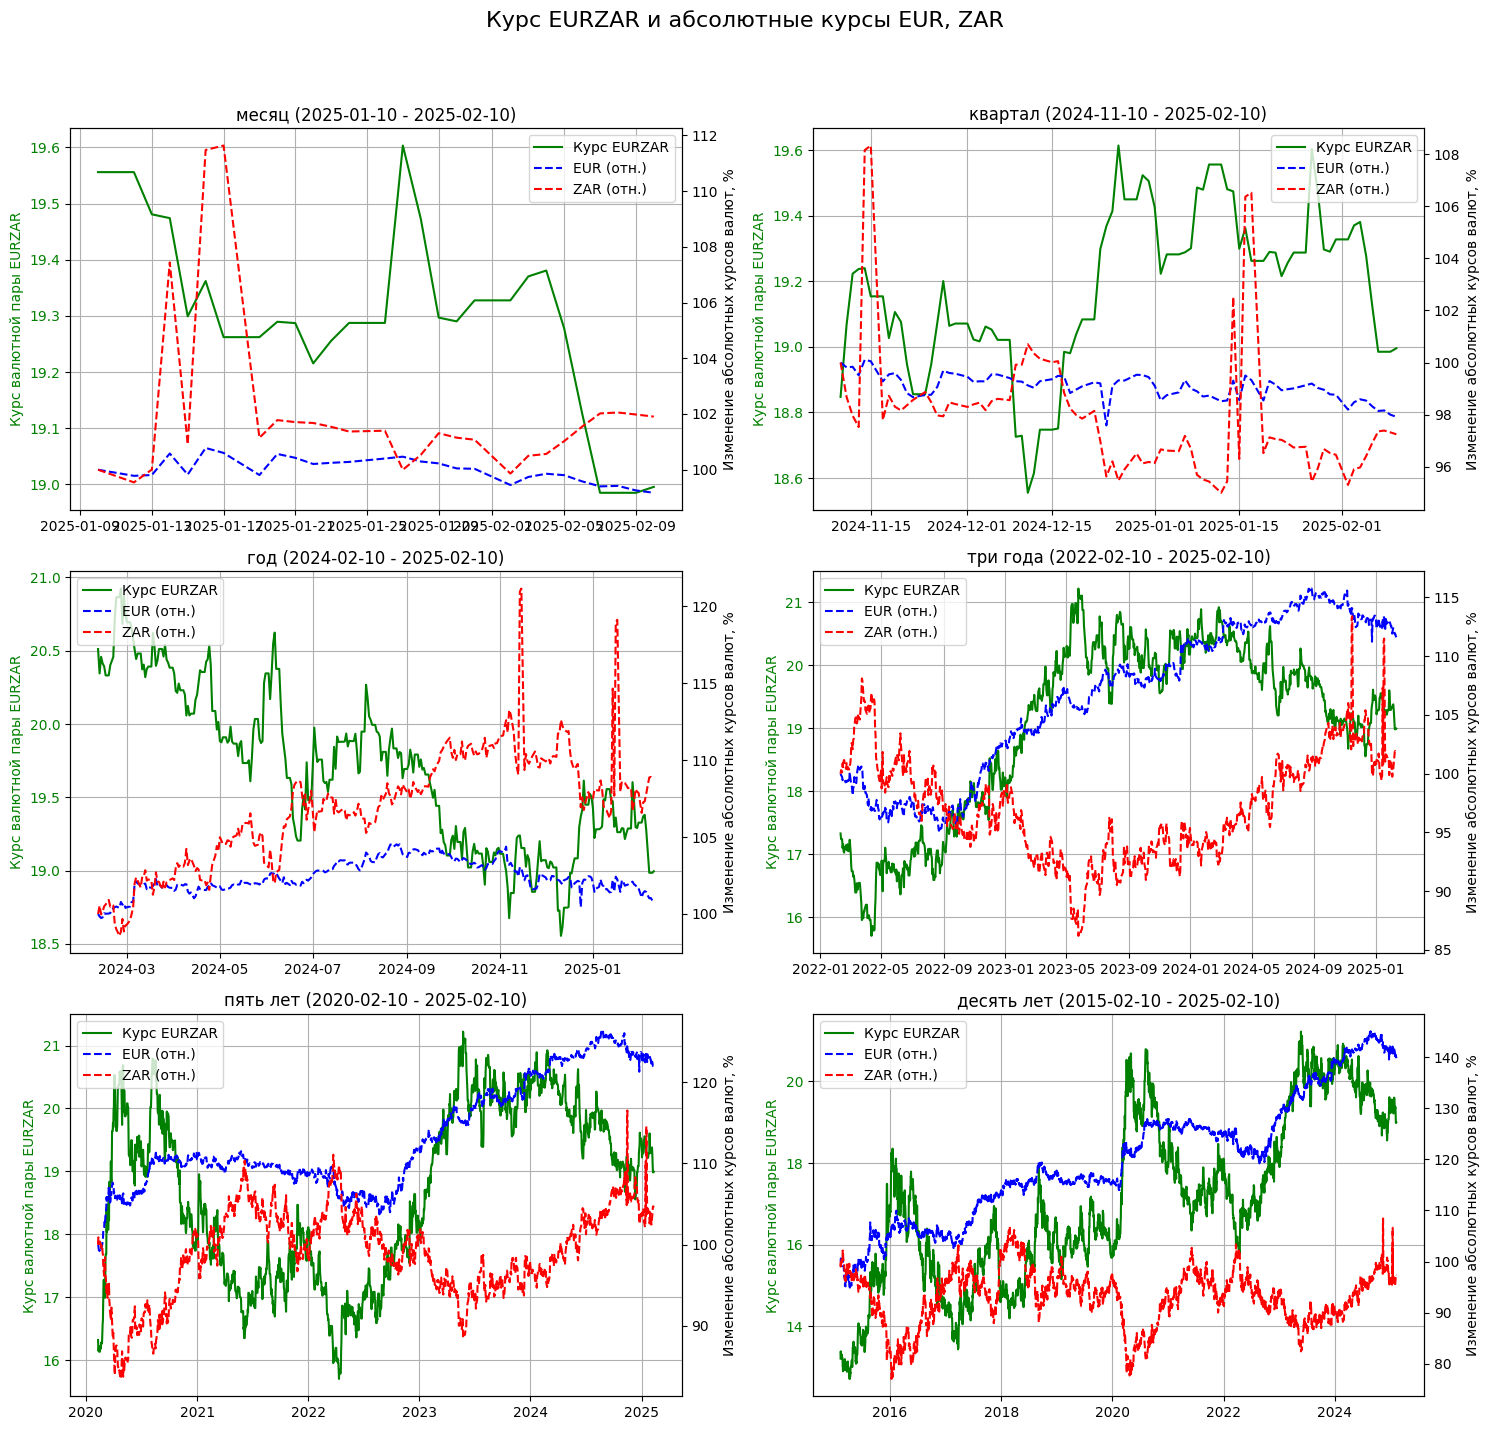

Файл "GBPAUD_exchange_rates_all_periods.png" успешно обновлён!
Файл "GBPCAD_exchange_rates_all_periods.png" успешно обновлён!
Файл "GBPCHF_exchange_rates_all_periods.png" успешно обновлён!
Файл "GBPHKD_exchange_rates_all_periods.png" успешно обновлён!
Файл "GBPJPY_exchange_rates_all_periods.png" успешно обновлён!
Файл "GBPNOK_exchange_rates_all_periods.png" успешно обновлён!
Файл "GBPRUB_exchange_rates_all_periods.png" успешно обновлён!
Файл "GBPSEK_exchange_rates_all_periods.png" успешно обновлён!
Файл "GBPSGD_exchange_rates_all_periods.png" успешно обновлён!
Файл "GBPUSD_exchange_rates_all_periods.png" успешно обновлён!
Файл "HKDSEK_exchange_rates_all_periods.png" успешно обновлён!
Файл "HKDSGD_exchange_rates_all_periods.png" успешно обновлён!
Файл "JPYHKD_exchange_rates_all_periods.png" успешно обновлён!
Файл "JPYSEK_exchange_rates_all_periods.png" успешно обновлён!
Файл "NZDSEK_exchange_rates_all_periods.png" успешно обновлён!
Файл "NZDUSD_exchange_rates_all_periods.png" успешно об

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from github_lib_abscur2 import pass_file

# Список для хранения имен файлов
saved_files = []

# Флаг для первого графика (для вывода на экран)
first_plot = True

# Выбор случайной валютной пары для отображения на экране
random_currency_pair = random.choice(all_pairs.columns)

# Перебор всех валютных пар в таблице all_pairs
for currency_pair in all_pairs.columns:
    # Извлечение данных для выбранной валютной пары
    pair_data = all_pairs[currency_pair]

    # Извлечение имен валют из тикера
    currency1 = currency_pair[:3]  # Первые три символа
    currency2 = currency_pair[3:]  # Последние три символа

    # Получение абсолютных курсов для каждой валюты
    absolute_currency1 = all_abscur[currency1]
    absolute_currency2 = all_abscur[currency2]

    # Создание фигуры с сеткой подграфиков 3x2 (3 строки, 2 столбца)
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle(f'Курс {currency_pair} и абсолютные курсы {currency1}, {currency2}', fontsize=16)

    # Перебор всех временных диапазонов
    for i, (period_name, start_date) in enumerate(ago_dates.items()):
        # Вычисление индекса для подграфика (приведение 2D к 1D)
        ax = axes.flatten()[i]

        # Преобразование start_date в строку без времени
        start_date_str = pd.to_datetime(start_date).strftime('%Y-%m-%d')

        # Вычисление last_date (последняя дата в all_pairs) и преобразование в строку
        last_date = all_pairs.index[-1]
        last_date_str = pd.to_datetime(last_date).strftime('%Y-%m-%d')

        # Фильтрация данных по дате
        filtered_pair_data = pair_data[pair_data.index >= start_date].dropna()
        filtered_absolute_currency1 = absolute_currency1[absolute_currency1.index >= start_date].dropna()
        filtered_absolute_currency2 = absolute_currency2[absolute_currency2.index >= start_date].dropna()

        # Проверка наличия данных для данного периода
        if not filtered_pair_data.empty and not filtered_absolute_currency1.empty and not filtered_absolute_currency2.empty:
            # Нормализация абсолютных курсов (деление на начальное значение и умножение на 100)
            initial_currency1 = filtered_absolute_currency1.iloc[0]
            initial_currency2 = filtered_absolute_currency2.iloc[0]
            normalized_currency1 = (filtered_absolute_currency1 / initial_currency1) * 100
            normalized_currency2 = (filtered_absolute_currency2 / initial_currency2) * 100

            # График парного валютного курса (левая ось)
            ax.plot(filtered_pair_data.index, filtered_pair_data.values, linestyle='-', color='g', label=f'Курс {currency_pair}')
            ax.set_ylabel('Курс валютной пары ' + currency_pair, color='g')
            ax.tick_params(axis='y', labelcolor='g')

            # Создание второй оси Y для нормализованных абсолютных курсов (правая ось)
            ax2 = ax.twinx()
            ax2.plot(normalized_currency1.index, normalized_currency1.values, linestyle='--', color='b', label=f'{currency1} (отн.)')
            ax2.plot(normalized_currency2.index, normalized_currency2.values, linestyle='--', color='r', label=f'{currency2} (отн.)')
            ax2.set_ylabel('Изменение абсолютных курсов валют, %', color='k')  # Общая подпись для правой оси
            ax2.tick_params(axis='y', labelcolor='k')

            # Настройка легенды (объединение легенд с обеих осей)
            lines, labels = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax2.legend(lines + lines2, labels + labels2, loc='best')

            # Заголовок подграфика с датами начала и окончания периода
            ax.set_title(f'{period_name} ({start_date_str} - {last_date_str})')
            ax.grid(True)

        else:
            ax.text(0.5, 0.5, 'Нет данных', horizontalalignment='center', verticalalignment='center', fontsize=12)
            ax.axis('off')

    # Автоматическая настройка размещения подграфиков
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Формирование имени файла
    filename = f"{currency_pair.replace('/', '_')}_exchange_rates_all_periods.png"

    # Сохранение графика
    plt.savefig(filename, dpi=75)
    saved_files.append(filename)

    # Публикация графика
    pass_file(filename)

    # Вывод на экран только для случайной валютной пары и первого графика
    if currency_pair == random_currency_pair and first_plot:
        plt.show(fig)
        first_plot = False
    else:
        plt.close(fig)

print(f"Сохранено {len(saved_files)} файлов.")


In [5]:
import json
from github_lib_abscur2 import pass_file

# Генерация JavaScript-кода для вывода ссылок на валютные пары и графиков
js_code = f"""
// Список возможных валютных пар
const currencyPairs = {json.dumps({pair: pair for pair in all_pairs.columns.tolist()})};

// Функция для получения параметра из URL
function getURLParameter(param) {{
    const params = new URLSearchParams(window.location.search);
    return params.get(param);
}}

// Получение текущей валютной пары из параметров
let selectedPair = getURLParameter('pair');

// Проверка наличия валютной пары в списке возможных пар
if (!(selectedPair in currencyPairs)) {{
    // Если пара не найдена, выбираем случайную пару
    const pairs = Object.keys(currencyPairs);
    selectedPair = pairs[Math.floor(Math.random() * pairs.length)];
}}

// Функция для отображения ссылок на валютные пары
function displayCurrencyPairLinks() {{
    const linksContainer = document.getElementById('currency-pair-links');
    let linksHTML = '';
    
    for (const [pair, name] of Object.entries(currencyPairs)) {{
        if (pair === selectedPair) {{
            linksHTML += `<strong style="background-color: yellow;">${{pair}}</strong> `;  // Текущая пара без ссылки
        }} else {{
            linksHTML += `<a href="?pair=${{pair}}">${{pair}}</a> `;  // Ссылка на пару
        }}
    }}

    linksContainer.innerHTML = linksHTML;
}}

// Функция для отображения графика валютной пары
function displayCurrencyPairGraph() {{
    const graphsContainer = document.getElementById('graphs-container');
    const imgElement = document.createElement('img');
    imgElement.src = `https://prog815.github.io/abscur2/contents/${{selectedPair.replace('/', '_')}}_exchange_rates_all_periods.png`;
    imgElement.alt = `График для ${{selectedPair}}`;
    imgElement.style.width = '100%';  // Устанавливаем ширину изображения
    graphsContainer.appendChild(imgElement);

    // Получение тикеров валют из выбранной пары
    const currency1 = selectedPair.substring(0, 3);
    const currency2 = selectedPair.substring(3, 6);

    // Создание ссылок на графики абсолютных курсов
    const link1 = document.createElement('a');
    link1.href = `https://www.abscur.ru/p/2.html?abs=${{currency1}}`;
    link1.textContent = `График абсолютного курса ${{currency1}}`;
    link1.style.display = 'inline-block';
    link1.style.marginRight = '10px';
    graphsContainer.appendChild(link1);

    const link2 = document.createElement('a');
    link2.href = `https://www.abscur.ru/p/2.html?abs=${{currency2}}`;
    link2.textContent = `График абсолютного курса ${{currency2}}`;
    link2.style.display = 'inline-block';
    link2.style.marginRight = '10px';
    graphsContainer.appendChild(link2);

    // Создание ссылок на распределения для этой пары
    const link3 = document.createElement('a');
    link3.href = `https://www.abscur.ru/p/blog-page_71.html?pair=${{selectedPair}}`;
    link3.textContent = `Распределение для парного валютного курса ${{selectedPair}}`;
    link3.style.display = 'inline-block';
    link3.style.marginRight = '10px';
    graphsContainer.appendChild(link3);
}}

// Вызов функций для отображения ссылок и графика
displayCurrencyPairLinks();
displayCurrencyPairGraph();
"""

# Сохранение JavaScript-кода в файл с упоминанием графиков валютных пар
output_js_file_path = 'display_currency_pair_graphs_links.js'
with open(output_js_file_path, 'w') as js_file:
    js_file.write(js_code)

print(f"JavaScript файл сохранен в {output_js_file_path}")

# Публикуем файл
pass_file(output_js_file_path, is_image=False)


JavaScript файл сохранен в display_currency_pair_graphs_links.js
Файл "display_currency_pair_graphs_links.js" успешно обновлён!


## Последние абсолютные валютные курсы Forex 

В данном разделе представлены последние абсолютные валютные курсы различных валют. Таблица отображает тикеры валют, их названия и актуальные курсы на основе последних доступных данных. Каждый тикер и название валюты являются гиперссылками, которые ведут на страницу с графиком соответствующей валюты, что позволяет пользователям легко получить дополнительную информацию о динамике курсов.

Заголовок столбца с курсами включает дату последнего обновления, что обеспечивает актуальность представленных данных. Этот раздел предоставляет исследователям и аналитикам возможность быстро ознакомиться с текущими значениями абсолютных валютных курсов, что может быть полезно для анализа финансовых рынков и разработки торговых стратегий.

См. на сайте [https://www.abscur.ru/p/blog-page_59.html](https://www.abscur.ru/p/blog-page_59.html)

In [6]:
import json
from datetime import datetime
from github_lib_abscur2 import pass_file

# Получение последней даты из индекса таблицы all_abscur
last_date = all_abscur.index[-1].date()

# Генерация JavaScript-кода для отображения таблицы с последними абсолютными валютными курсами
js_code = f"""
// Список последних абсолютных валютных курсов
const absoluteCurrencyRates = {json.dumps({ticker: {'name': cur_name[ticker], 'rate': all_abscur[ticker].iloc[-1]} for ticker in all_abscur.columns})};

// Создание HTML-кода для таблицы
let tableHTML = '<table style="border-collapse: collapse; border: 1px solid black;">';
tableHTML += '<tr><th style="border: 1px solid black; text-align: center;">Тикер</th>';
tableHTML += '<th style="border: 1px solid black; text-align: center;">Валюта</th>';
tableHTML += '<th style="border: 1px solid black; text-align: right;">Абсолютный курс на {last_date}</th></tr>';

for (const [ticker, data] of Object.entries(absoluteCurrencyRates)) {{
    tableHTML += `<tr>
        <td style="border: 1px solid black; text-align: center;">
            <a href="https://www.abscur.ru/p/2.html?abs=${{ticker}}">${{ticker}}</a>
        </td>
        <td style="border: 1px solid black; text-align: center;">
            <a href="https://www.abscur.ru/p/2.html?abs=${{ticker}}">${{data.name}}</a>
        </td>
        <td style="border: 1px solid black; text-align: right;">${{data.rate.toFixed(4).replace('.', ',')}}</td>
    </tr>`;
}}

tableHTML += '</table>';

// Вставка таблицы в div с id "currency-rates-table"
document.getElementById('currency-rates-table').innerHTML = tableHTML;
"""

# Сохранение JavaScript-кода в файл с упоминанием последних абсолютных курсов
output_js_file_path = 'display_latest_absolute_currency_rates.js'
with open(output_js_file_path, 'w') as js_file:
    js_file.write(js_code)

print(f"JavaScript файл сохранен в {output_js_file_path}")

# Публикуем файл
pass_file(output_js_file_path, is_image=False)


JavaScript файл сохранен в display_latest_absolute_currency_rates.js
Файл "display_latest_absolute_currency_rates.js" успешно обновлён!


## Графики абсолютных валютных курсов

В данном разделе представлены графики абсолютных валютных курсов, которые отображают динамику ценности каждой валюты по отношению ко всем другим валютам одновременно. Абсолютные курсы получаются путем математической оптимизации на основе парных валютных курсов и позволяют более точно оценить стоимость каждой валюты в глобальном контексте.

Графики представлены для различных временных диапазонов, начиная от одного месяца и заканчивая десятью годами. Это позволяет исследовать изменения в курсах как на краткосрочных, так и на долгосрочных интервалах времени.

Для переключения между валютами можно использовать гиперссылки с тикерами валют. Текущая валюта в списке подсвечена желтым, что облегчает идентификацию выбранной валюты. Данные графики могут быть полезны для глубокого анализа валютных рынков и динамики обменных курсов в рамках финансовых исследований и экономического моделирования.

См. на сайте [https://www.abscur.ru/p/2.html](https://www.abscur.ru/p/2.html)

Файл "AED_absolute_rate_all_periods.png" успешно обновлён!
Файл "ARS_absolute_rate_all_periods.png" успешно обновлён!
Файл "AUD_absolute_rate_all_periods.png" успешно обновлён!
Файл "BRL_absolute_rate_all_periods.png" успешно обновлён!
Файл "CAD_absolute_rate_all_periods.png" успешно обновлён!
Файл "CHF_absolute_rate_all_periods.png" успешно обновлён!
Файл "CLP_absolute_rate_all_periods.png" успешно обновлён!
Файл "CNY_absolute_rate_all_periods.png" успешно обновлён!
Файл "COP_absolute_rate_all_periods.png" успешно обновлён!
Файл "CZK_absolute_rate_all_periods.png" успешно обновлён!
Файл "DKK_absolute_rate_all_periods.png" успешно обновлён!
Файл "EGP_absolute_rate_all_periods.png" успешно обновлён!
Файл "EUR_absolute_rate_all_periods.png" успешно обновлён!
Файл "GBP_absolute_rate_all_periods.png" успешно обновлён!
Файл "HKD_absolute_rate_all_periods.png" успешно обновлён!
Файл "HUF_absolute_rate_all_periods.png" успешно обновлён!
Файл "IDR_absolute_rate_all_periods.png" успешно обновлё

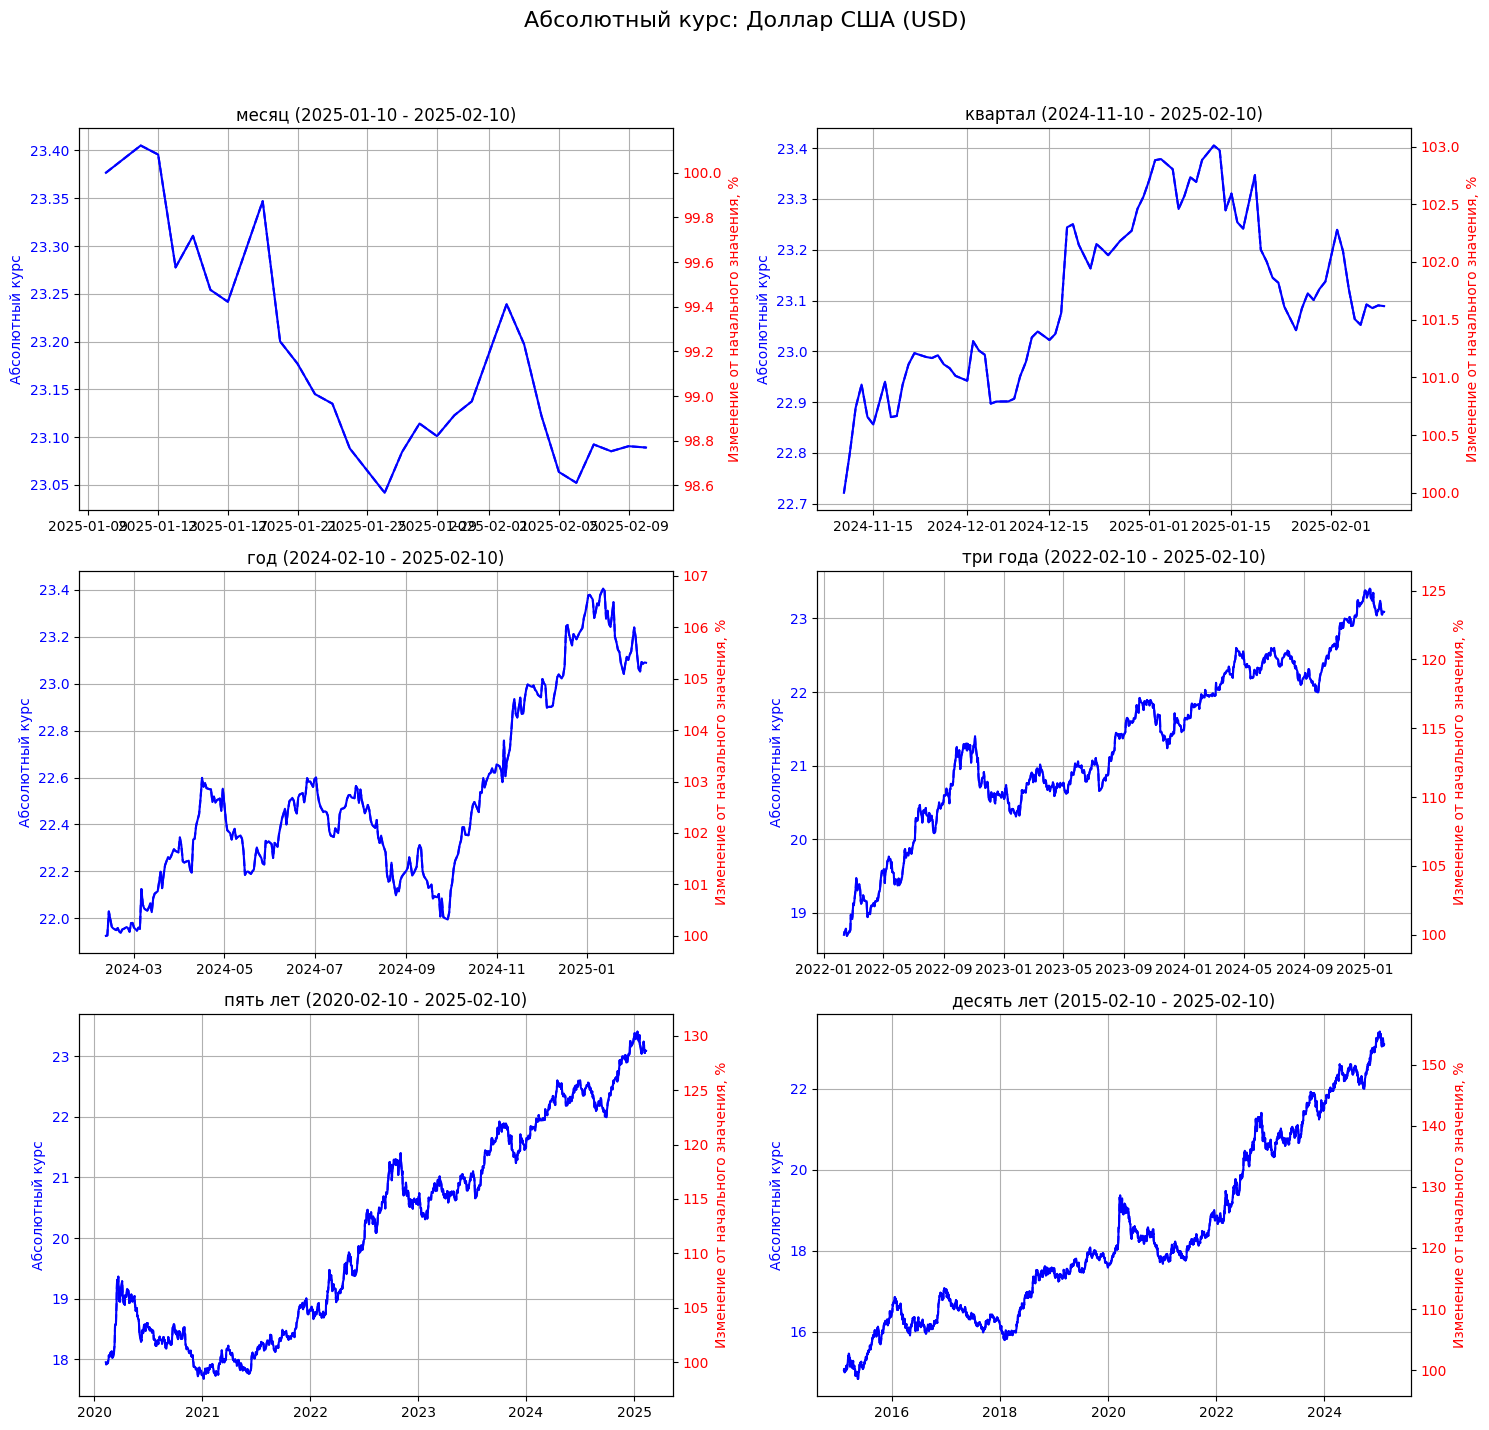

Файл "VND_absolute_rate_all_periods.png" успешно обновлён!
Файл "ZAR_absolute_rate_all_periods.png" успешно обновлён!
Сохранено 45 файлов.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from github_lib_abscur2 import pass_file

# Список для сохранения имен файлов
saved_files = []

# Выбор случайной валюты для отображения на экране
random_currency = random.choice(all_abscur.columns)

# Флаг для первого графика (для вывода на экран)
first_plot = True

# Перебор всех валют в таблице all_abscur
for currency in all_abscur.columns:
    # Извлечение данных для выбранной валюты
    currency_data = all_abscur[currency]

    # Получение имени валюты из словаря cur_name
    currency_name = cur_name[currency]

    # Создание фигуры с сеткой подграфиков 3x2 (3 строки, 2 столбца)
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle(f'Абсолютный курс: {currency_name} ({currency})', fontsize=16)

    # Перебор всех временных диапазонов
    for i, (period_name, start_date) in enumerate(ago_dates.items()):
        # Вычисление индекса для подграфика (приведение 2D к 1D)
        ax = axes.flatten()[i]

        # Преобразование start_date в строку без времени
        start_date_str = pd.to_datetime(start_date).strftime('%Y-%m-%d')

        # Вычисление last_date (последняя дата в all_pairs) и преобразование в строку
        last_date = all_abscur.index[-1]
        last_date_str = pd.to_datetime(last_date).strftime('%Y-%m-%d')

        # Фильтрация данных по дате
        filtered_data = currency_data[currency_data.index >= start_date].dropna()

        # Проверка наличия данных для данного периода
        if not filtered_data.empty:
            # Нормализация данных (деление на начальное значение и умножение на 100)
            initial_value = filtered_data.iloc[0]
            normalized_data = (filtered_data / initial_value) * 100

            # График абсолютного курса (левая ось)
            ax.plot(filtered_data.index, filtered_data.values, linestyle='-', color='b', label=f'Курс {currency_name} ({currency})')
            ax.set_ylabel('Абсолютный курс', color='b')
            ax.tick_params(axis='y', labelcolor='b')

            # Создание второй оси Y для нормализованных данных (правая ось)
            ax2 = ax.twinx()
            ax2.plot(normalized_data.index, normalized_data.values, linestyle='--', color='b', label='Изменение, %')
            ax2.set_ylabel('Изменение от начального значения, %', color='r')
            ax2.tick_params(axis='y', labelcolor='r')

            # Настройка легенды (объединение легенд с обеих осей)
            # lines, labels = ax.get_legend_handles_labels()
            # lines2, labels2 = ax2.get_legend_handles_labels()
            # ax2.legend(lines + lines2, labels + labels2, loc='best')

            # Заголовок подграфика с именем валюты и временным диапазоном
            ax.set_title(f'{period_name} ({start_date_str} - {last_date_str})')
            ax.grid(True)

        else:
            ax.text(0.5, 0.5, 'Нет данных', horizontalalignment='center', verticalalignment='center', fontsize=12)
            ax.axis('off')

    # Автоматическая настройка размещения подграфиков
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Формирование имени файла
    filename = f"{currency}_absolute_rate_all_periods.png"

    # Сохранение графика на диск
    plt.savefig(filename, dpi=75)
    saved_files.append(filename)

    # Публикация графика
    pass_file(filename)

    # Вывод на экран только для случайной валюты и первого графика
    if currency == random_currency and first_plot:
        plt.show(fig)
        first_plot = False
    else:
        plt.close(fig)

print(f"Сохранено {len(saved_files)} файлов.")


In [8]:
import json
from github_lib_abscur2 import pass_file

# Генерация JavaScript-кода для вывода ссылок на абсолютные курсы валют и графиков
js_code = f"""
// Список возможных тикеров абсолютных курсов валют и их названий
const absoluteCurrencyTickers = {json.dumps({ticker: cur_name[ticker] for ticker in all_abscur.columns.tolist()})};

// Список валютных пар
const currencyPairs = {json.dumps(all_pairs.columns.tolist())};

// Словарь с именами валют
const currencyNames = {json.dumps(cur_name)};

// Словарь со ссылками на Wikipedia
const currencyWikiLinks = {json.dumps(cur_wiki)};

// Функция для получения параметра из URL
function getURLParameter(param) {{
    const params = new URLSearchParams(window.location.search);
    return params.get(param);
}}

// Получение текущего тикера валюты из параметров
let selectedTicker = getURLParameter('abs');

// Проверка наличия тикера в списке возможных валют
if (!(selectedTicker in absoluteCurrencyTickers)) {{
    // Если тикер не найден, выбираем случайный тикер
    const tickers = Object.keys(absoluteCurrencyTickers);
    selectedTicker = tickers[Math.floor(Math.random() * tickers.length)];
}}

// Функция для отображения ссылок на абсолютные курсы валют
function displayAbsoluteCurrencyLinks() {{
    const linksContainer = document.getElementById('absolute-currency-links');
    let linksHTML = '';
    
    for (const [ticker, name] of Object.entries(absoluteCurrencyTickers)) {{
        if (ticker === selectedTicker) {{
            linksHTML += `<strong style="background-color: yellow;">${{name}} (${{ticker}})</strong> `;  // Текущий курс без ссылки
        }} else {{
            linksHTML += `<a href="?abs=${{ticker}}">${{ticker}}</a> `;  // Ссылка на курс
        }}
    }}

    linksContainer.innerHTML = linksHTML;
}}

// Функция для отображения графика абсолютного курса валюты, имени, ссылки на Wikipedia и списка валютных пар
function displayAbsoluteCurrencyGraph() {{
    const graphsContainer = document.getElementById('graphs-container');

    // Вывод имени валюты
    const currencyNameHeader = document.createElement('h2');
    currencyNameHeader.textContent = currencyNames[selectedTicker];
    graphsContainer.appendChild(currencyNameHeader);

    // Вывод ссылки на Wikipedia
    const wikiLink = document.createElement('a');
    wikiLink.href = currencyWikiLinks[selectedTicker];
    wikiLink.textContent = `Wikipedia: ${{currencyNames[selectedTicker]}}`;
    wikiLink.target = '_blank'; // Открывать в новой вкладке
    graphsContainer.appendChild(wikiLink);

    // Вывод графика
    const imgElement = document.createElement('img');
    imgElement.src = `https://prog815.github.io/abscur2/contents/${{selectedTicker}}_absolute_rate_all_periods.png`;
    imgElement.alt = `График абсолютного курса для ${{currencyNames[selectedTicker]}}`;
    imgElement.style.width = '100%';  // Устанавливаем ширину изображения
    graphsContainer.appendChild(imgElement);
    
    // Фильтрация валютных пар, содержащих текущий тикер
    const relevantPairs = currencyPairs.filter(pair => pair.includes(selectedTicker));
    
    // Вывод ссылок на валютные пары
    if (relevantPairs.length > 0) {{
        const pairsHeader = document.createElement('h3');
        pairsHeader.textContent = 'Валютные пары:';
        graphsContainer.appendChild(pairsHeader);

        const pairsList = document.createElement('ul');
        relevantPairs.forEach(pair => {{
            const listItem = document.createElement('li');
            const pairLink = document.createElement('a');
            pairLink.href = `https://www.abscur.ru/p/blog-page_54.html?pair=${{pair}}`;
            pairLink.textContent = pair;
            listItem.appendChild(pairLink);
            pairsList.appendChild(listItem);
        }});
        graphsContainer.appendChild(pairsList);
    }}
}}

// Вызов функций для отображения ссылок и графика
displayAbsoluteCurrencyLinks();
displayAbsoluteCurrencyGraph();
"""

# Сохранение JavaScript-кода в файл с упоминанием графиков абсолютных курсов валют
output_js_file_path = 'display_absolute_currency_graphs_links.js'
with open(output_js_file_path, 'w') as js_file:
    js_file.write(js_code)

print(f"JavaScript файл сохранен в {output_js_file_path}")

# Публикуем файл
pass_file(output_js_file_path, is_image=False)


JavaScript файл сохранен в display_absolute_currency_graphs_links.js
Файл "display_absolute_currency_graphs_links.js" успешно обновлён!


## Рейтинг стабильности валют

В данном разделе представлены диаграммы, отображающие рейтинги стабильности различных валют на основе коэффициента вариации. Коэффициент вариации позволяет оценить стабильность валют: чем ниже его значение, тем стабильнее валюта.

На диаграммах вы увидите, что лучшие валюты по стабильности расположены в правой части графика. Каждая валюта представлена тикером и названием, а также указано значение коэффициента вариации в процентах. Гиперссылки на соответствующие страницы с графиками валют позволяют легко получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят быстро ознакомиться с текущими значениями стабильности валют и использовать эту информацию для анализа финансовых рынков и разработки торговых стратегий.

См. на сайте [https://www.abscur.ru/p/blog-page.html](https://www.abscur.ru/p/blog-page.html)

Файл "currency_stability_1m.png" успешно обновлён!
Файл "currency_stability_1q.png" успешно обновлён!
Файл "currency_stability_1y.png" успешно обновлён!
Файл "currency_stability_3y.png" успешно обновлён!
Файл "currency_stability_5y.png" успешно обновлён!
Выводим график для периода: пять лет


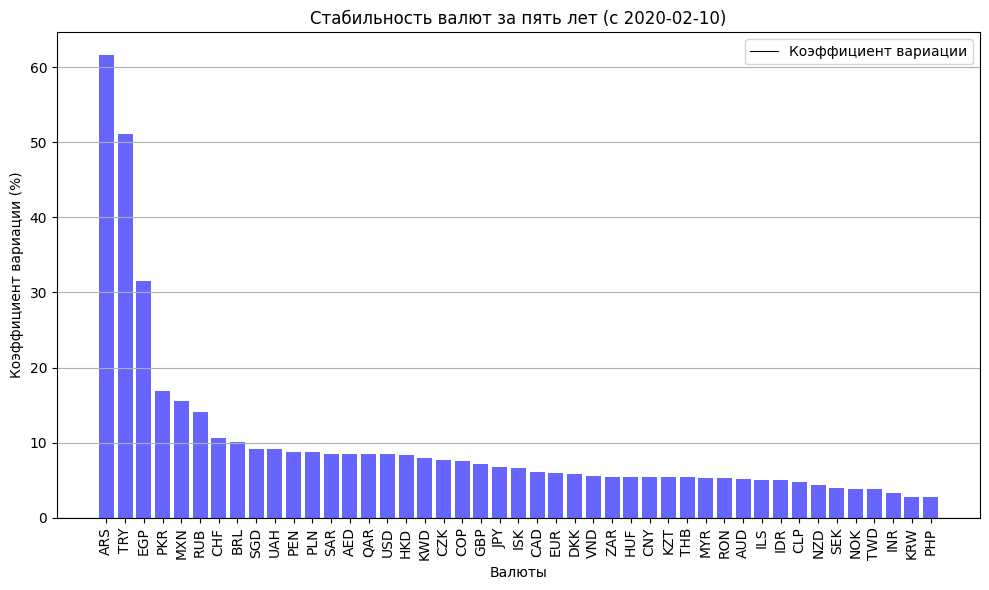

Файл "currency_stability_10y.png" успешно обновлён!
{'месяц': [{'Ticker': 'SGD', 'Currency Name': 'Сингапурский доллар', 'Coefficient of Variation (%)': 0.16273240531744426}, {'Ticker': 'NOK', 'Currency Name': 'Норвежская крона', 'Coefficient of Variation (%)': 0.2571494375102209}, {'Ticker': 'NZD', 'Currency Name': 'Новозеландский доллар', 'Coefficient of Variation (%)': 0.315234368824853}, {'Ticker': 'CHF', 'Currency Name': 'Швейцарский франк', 'Coefficient of Variation (%)': 0.3178844675394354}, {'Ticker': 'EGP', 'Currency Name': 'Египетский фунт', 'Coefficient of Variation (%)': 0.3302231932386725}], 'квартал': [{'Ticker': 'SGD', 'Currency Name': 'Сингапурский доллар', 'Coefficient of Variation (%)': 0.14476250141841437}, {'Ticker': 'UAH', 'Currency Name': 'Украинская гривна', 'Coefficient of Variation (%)': 0.38758045571004424}, {'Ticker': 'TWD', 'Currency Name': 'Новый тайваньский доллар', 'Coefficient of Variation (%)': 0.38842794308382744}, {'Ticker': 'SEK', 'Currency Name': 'Ш

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from github_lib_abscur2 import pass_file

# Создание словаря для хранения данных о стабильности валют по временным диапазонам
currency_stability_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]

    # Создание списка для хранения коэффициентов вариации
    cv_values = []

    # Пробегаемся по всем тикерам валют
    for ticker in filtered_data.columns:
        mean = filtered_data[ticker].mean()
        std_dev = filtered_data[ticker].std()

        if mean != 0:  # Избегаем деления на ноль
            cv = std_dev / mean * 100  # Умножаем на 100 для отображения в процентах
            cv_values.append({
                'Ticker': ticker,
                'Currency Name': cur_name[ticker],  # Получаем имя валюты из существующего словаря
                'Coefficient of Variation (%)': cv  # Добавляем знак процента в название колонки
            })

    # Создание DataFrame из списка коэффициентов вариации
    cv_df = pd.DataFrame(cv_values)

    # Первая сортировка по возрастанию коэффициента вариации (чем ниже, тем стабильнее)
    cv_df_sorted = cv_df.sort_values(by='Coefficient of Variation (%)')

    # Сохраняем данные о топ-5 стабильных валютах в словарь по текущему периоду имени (только те, что показали наименьший CV)
    currency_stability_by_period[period_name] = cv_df_sorted.head(5)[['Ticker', 'Currency Name', 'Coefficient of Variation (%)']].to_dict(orient='records')

    # Вторая сортировка перед выводом на диаграмму по убыванию коэффициента вариации
    cv_df_sorted = cv_df_sorted.sort_values(by='Coefficient of Variation (%)', ascending=False)

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для коэффициента вариации с синим цветом
    plt.bar(cv_df_sorted['Ticker'], cv_df_sorted['Coefficient of Variation (%)'], color='blue', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Стабильность валют за {period_name} (с {formatted_start_date})')
    plt.xlabel('Валюты')
    plt.ylabel('Коэффициент вариации (%)')
    
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для столбцов (тикеры валют)
    plt.xticks(rotation=90)  # Разворот подписей на 90 градусов

    plt.legend(['Коэффициент вариации'])
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск с суффиксом периода
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f'currency_stability_{suffix}.png'
    
    # Сохранение графика на диск с разрешением 75 dpi
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь currency_stability_by_period содержит данные о стабильности валют для использования при генерации JS-файла.
print(currency_stability_by_period)


In [10]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"currency_stability_{suffix}.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм стабильности валют
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг стабильности валют за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка валют с наименьшим коэффициентом вариации из словаря currency_stability_by_period
    stability_data = currency_stability_by_period.get(period_name, [])

    # Добавление списка валют с наименьшим коэффициентом вариации
    js_code += '    var currencyList = document.createElement("p");\n'
    js_code += '    currencyList.innerHTML = "Топ стабильные валюты: "; \n'
    
    for index, currency in enumerate(stability_data):
        stability_percentage = f"{currency['Coefficient of Variation (%)']:.2f}"  # Форматирование процента до двух знаков после запятой
        
        if index < len(stability_data) - 1:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {stability_percentage}%, `;\n'
        else:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {stability_percentage}%  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    currencyList.innerHTML = currencyList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(currencyList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("currency_stability.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл currency_stability.js успешно создан.")

# Публикуем график
pass_file("currency_stability.js", is_image=False)


JavaScript файл currency_stability.js успешно создан.
Файл "currency_stability.js" успешно обновлён!


## Рейтинг роста валют

В данном разделе представлены диаграммы, отображающие рейтинги роста абсолютных курсов различных валют на основе процентного изменения. Каждая диаграмма иллюстрирует, как изменились курсы валют за определенные временные периоды.

На графиках вы можете увидеть, какие валюты продемонстрировали наибольший рост, а также их тикеры и названия. Гиперссылки на страницы с графиками соответствующих валют позволяют быстро получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят проанализировать изменения в курсах валют и использовать эту информацию для разработки торговых стратегий и оценки финансовых рынков. Диаграммы предоставляют визуальный обзор роста валют, что делает анализ более доступным и информативным.

См. на сайте [https://www.abscur.ru/p/blog-page_20.html](https://www.abscur.ru/p/blog-page_20.html)

Файл "currency_growth_1m.png" успешно обновлён!
Файл "currency_growth_1q.png" успешно обновлён!
Файл "currency_growth_1y.png" успешно обновлён!
Файл "currency_growth_3y.png" успешно обновлён!
Выводим график для периода: три года


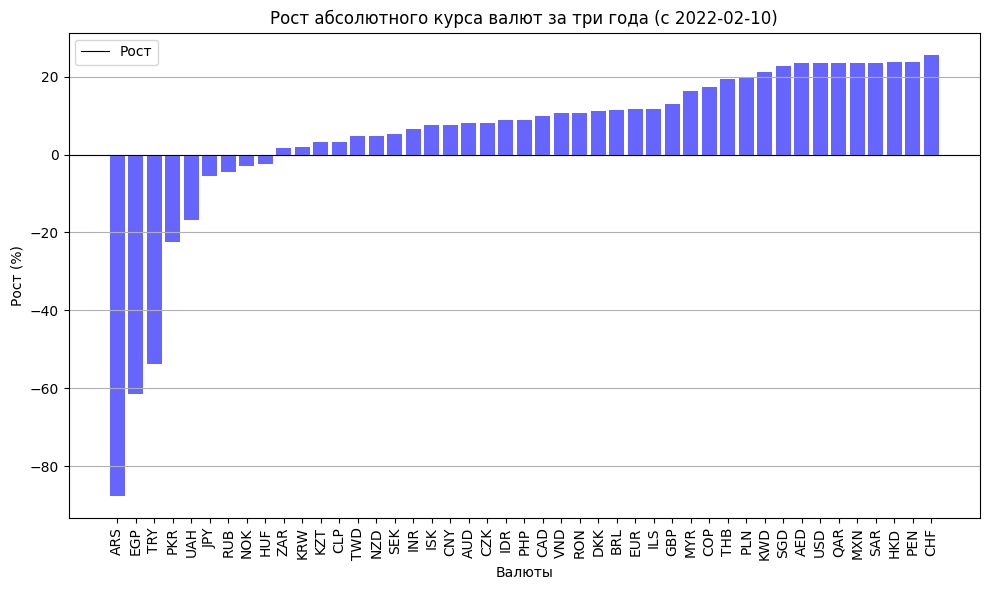

Файл "currency_growth_5y.png" успешно обновлён!
Файл "currency_growth_10y.png" успешно обновлён!
{'месяц': [{'Ticker': 'RUB', 'Currency Name': 'Российский рубль', 'Growth (%)': 3.9482467983711405}, {'Ticker': 'BRL', 'Currency Name': 'Бразильский реал', 'Growth (%)': 3.9089233401925867}, {'Ticker': 'COP', 'Currency Name': 'Колумбийское песо', 'Growth (%)': 3.863662668506883}, {'Ticker': 'CLP', 'Currency Name': 'Чилийское песо', 'Growth (%)': 3.7633073943818243}, {'Ticker': 'JPY', 'Currency Name': 'Японская иена', 'Growth (%)': 2.8271902476769077}], 'квартал': [{'Ticker': 'ILS', 'Currency Name': 'Новый израильский шекель', 'Growth (%)': 6.929082616225703}, {'Ticker': 'COP', 'Currency Name': 'Колумбийское песо', 'Growth (%)': 6.444725867731757}, {'Ticker': 'PEN', 'Currency Name': 'Перуанский новый соль', 'Growth (%)': 3.136569209493693}, {'Ticker': 'CLP', 'Currency Name': 'Чилийское песо', 'Growth (%)': 2.502159060533097}, {'Ticker': 'JPY', 'Currency Name': 'Японская иена', 'Growth (%)': 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from github_lib_abscur2 import pass_file

# Создание словаря для хранения данных о росте валют по временным диапазонам
currency_growth_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]

    # Создание списка для хранения изменений
    growth_values = []

    # Пробегаемся по всем тикерам валют
    for ticker in filtered_data.columns:
        first_price = filtered_data[ticker].iloc[0]
        last_price = filtered_data[ticker].iloc[-1]

        if first_price != 0:  # Избегаем деления на ноль
            growth_percent = ((last_price - first_price) / first_price) * 100  # Вычисление роста в процентах
            growth_values.append({
                'Ticker': ticker,
                'Currency Name': cur_name[ticker],  # Получаем имя валюты из существующего словаря
                'Growth (%)': growth_percent  # Добавляем знак процента в название колонки
            })

    # Создание DataFrame из списка изменений
    growth_df = pd.DataFrame(growth_values)

    # Первая сортировка по убыванию роста (чем выше, тем лучше)
    growth_df_sorted = growth_df.sort_values(by='Growth (%)', ascending=False)

    # Сохраняем данные о топ-5 валютах по росту в словарь по текущему периоду имени (только те, что показали наибольший рост)
    currency_growth_by_period[period_name] = growth_df_sorted.head(5)[['Ticker', 'Currency Name', 'Growth (%)']].to_dict(orient='records')

    # Вторая сортировка перед выводом на диаграмму по возрастанию роста
    growth_df_sorted = growth_df_sorted.sort_values(by='Growth (%)', ascending=True)

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для роста с синим цветом
    plt.bar(growth_df_sorted['Ticker'], growth_df_sorted['Growth (%)'], color='blue', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Рост абсолютного курса валют за {period_name} (с {formatted_start_date})')
    plt.xlabel('Валюты')
    plt.ylabel('Рост (%)')
    
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для столбцов (тикеры валют)
    plt.xticks(rotation=90)  # Разворот подписей на 90 градусов

    plt.legend(['Рост'])
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск с суффиксом периода
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f'currency_growth_{suffix}.png'
    
    # Сохранение графика на диск с разрешением 75 dpi
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь currency_growth_by_period содержит данные о росте валют для использования при генерации JS-файла.
print(currency_growth_by_period)


In [12]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"currency_growth_{suffix}.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм роста валют
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг роста валют за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка валют с наибольшим ростом из словаря currency_growth_by_period
    growth_data = currency_growth_by_period.get(period_name, [])

    # Добавление списка валют с наибольшим ростом
    js_code += '    var currencyList = document.createElement("p");\n'
    js_code += '    currencyList.innerHTML = "Топ валют по росту: "; \n'
    
    for index, currency in enumerate(growth_data):
        growth_percentage = f"{currency['Growth (%)']:.2f}"  # Форматирование процента до двух знаков после запятой
        
        if index < len(growth_data) - 1:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {growth_percentage}%, `;\n'
        else:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {growth_percentage}%  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    currencyList.innerHTML = currencyList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(currencyList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("currency_growth.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл currency_growth.js успешно создан.")

# Публикуем график
pass_file("currency_growth.js", is_image=False)


JavaScript файл currency_growth.js успешно создан.
Файл "currency_growth.js" успешно обновлён!


## Рейтинг доходности валют

В данном разделе представлены диаграммы, отображающие рейтинги абсолютной доходности различных валют на основе их дневной средней доходности. Доходность рассчитывается как среднее значение относительных изменений абсолютных курсов валют за определенные временные периоды.

На графиках вы можете увидеть, какие валюты продемонстрировали наибольшую абсолютную доходность, а также их тикеры и названия. Гиперссылки на страницы с графиками соответствующих валют позволяют быстро получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят проанализировать изменения в курсах валют и использовать эту информацию для разработки торговых стратегий и оценки финансовых рынков. Диаграммы предоставляют визуальный обзор абсолютной доходности валют, что делает анализ более доступным и информативным.

См. на сайте [https://www.abscur.ru/p/blog-page_3.html](https://www.abscur.ru/p/blog-page_3.html)

Файл "currency_return_1m.png" успешно обновлён!
Файл "currency_return_1q.png" успешно обновлён!
Файл "currency_return_1y.png" успешно обновлён!
Файл "currency_return_3y.png" успешно обновлён!
Файл "currency_return_5y.png" успешно обновлён!
Файл "currency_return_10y.png" успешно обновлён!
Выводим график для периода: десять лет


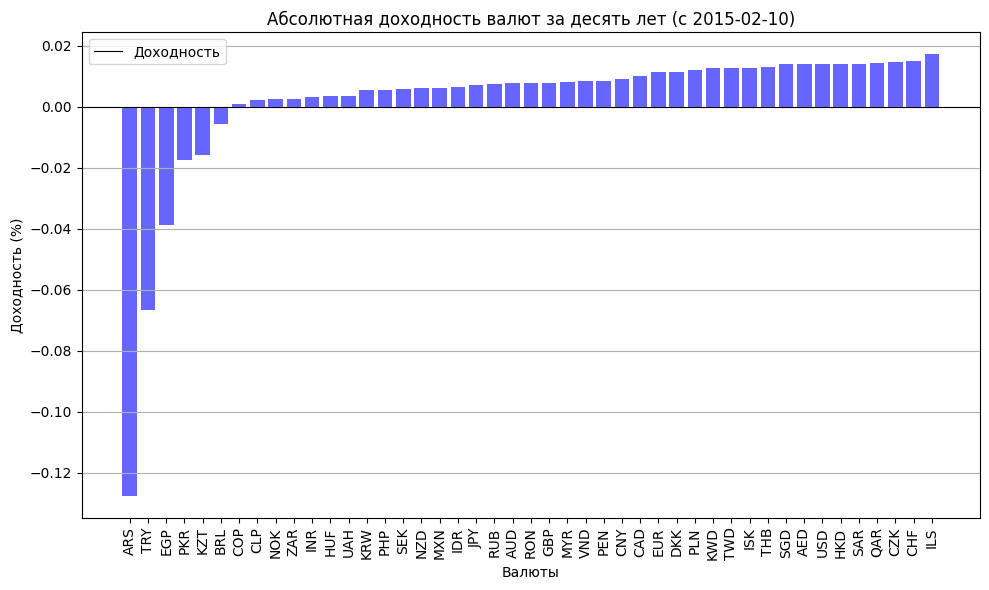

{'месяц': [{'Ticker': 'RUB', 'Currency Name': 'Российский рубль', 'Average Return (%)': 0.1471525582321064}, {'Ticker': 'BRL', 'Currency Name': 'Бразильский реал', 'Average Return (%)': 0.1433074406364762}, {'Ticker': 'COP', 'Currency Name': 'Колумбийское песо', 'Average Return (%)': 0.1418507832316558}, {'Ticker': 'CLP', 'Currency Name': 'Чилийское песо', 'Average Return (%)': 0.13817877729819608}, {'Ticker': 'ZAR', 'Currency Name': 'Южноафриканский рэнд', 'Average Return (%)': 0.12437436034191508}], 'квартал': [{'Ticker': 'ILS', 'Currency Name': 'Новый израильский шекель', 'Average Return (%)': 0.08505119899238481}, {'Ticker': 'COP', 'Currency Name': 'Колумбийское песо', 'Average Return (%)': 0.07953464438303956}, {'Ticker': 'PEN', 'Currency Name': 'Перуанский новый соль', 'Average Return (%)': 0.039025977316480276}, {'Ticker': 'RUB', 'Currency Name': 'Российский рубль', 'Average Return (%)': 0.03593332546818356}, {'Ticker': 'CLP', 'Currency Name': 'Чилийское песо', 'Average Return (

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from github_lib_abscur2 import pass_file

# Создание словаря для хранения данных о доходности валют по временным диапазонам
currency_return_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]

    # Создание списка для хранения доходности
    return_values = []

    # Пробегаемся по всем тикерам валют
    for ticker in filtered_data.columns:
        # Вычисление относительных изменений
        relative_changes = (filtered_data[ticker].pct_change() * 100).dropna()  # Процентные изменения

        # Вычисление средней доходности
        average_return = relative_changes.mean()

        return_values.append({
            'Ticker': ticker,
            'Currency Name': cur_name[ticker],  # Получаем имя валюты из существующего словаря
            'Average Return (%)': average_return  # Добавляем знак процента в название колонки
        })

    # Создание DataFrame из списка доходности
    return_df = pd.DataFrame(return_values)

    # Первая сортировка по убыванию доходности (чем выше, тем лучше)
    return_df_sorted = return_df.sort_values(by='Average Return (%)', ascending=False)

    # Сохраняем данные о топ-5 валютах по доходности в словарь по текущему периоду имени (только те, что показали наибольшую доходность)
    currency_return_by_period[period_name] = return_df_sorted.head(5)[['Ticker', 'Currency Name', 'Average Return (%)']].to_dict(orient='records')

    # Вторая сортировка перед выводом на диаграмму по возрастанию доходности
    return_df_sorted = return_df_sorted.sort_values(by='Average Return (%)', ascending=True)

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для доходности с синим цветом
    plt.bar(return_df_sorted['Ticker'], return_df_sorted['Average Return (%)'], color='blue', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Абсолютная доходность валют за {period_name} (с {formatted_start_date})')
    plt.xlabel('Валюты')
    plt.ylabel('Доходность (%)')
    
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для столбцов (тикеры валют)
    plt.xticks(rotation=90)  # Разворот подписей на 90 градусов

    plt.legend(['Доходность'])
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск с суффиксом периода
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f'currency_return_{suffix}.png'
    
    # Сохранение графика на диск с разрешением 75 dpi
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь currency_return_by_period содержит данные о доходности валют для использования при генерации JS-файла.
print(currency_return_by_period)


In [14]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"currency_return_{suffix}.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм абсолютной доходности валют
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг абсолютной доходности валют за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка валют с наибольшей абсолютной доходностью из словаря currency_return_by_period
    return_data = currency_return_by_period.get(period_name, [])

    # Добавление списка валют с наибольшей абсолютной доходностью
    js_code += '    var currencyList = document.createElement("p");\n'
    js_code += '    currencyList.innerHTML = "Топ валют по абсолютной доходности: "; \n'
    
    for index, currency in enumerate(return_data):
        return_percentage = f"{currency['Average Return (%)']:.2f}"  # Форматирование процента до двух знаков после запятой
        
        if index < len(return_data) - 1:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {return_percentage}%, `;\n'
        else:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {return_percentage}%  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    currencyList.innerHTML = currencyList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(currencyList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("currency_return.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл currency_return.js успешно создан.")

# Публикуем график
pass_file("currency_return.js", is_image=False)


JavaScript файл currency_return.js успешно создан.
Файл "currency_return.js" успешно обновлён!


## Рейтинг волатильности валют

В данном разделе представлены диаграммы, отображающие рейтинги абсолютной волатильности различных валют на основе дневных абсолютных валютных курсов. Волатильность рассчитывается как стандартное отклонение доходности валют за определенные временные периоды.

На графиках вы можете увидеть, какие валюты продемонстрировали наибольшую волатильность, а также их тикеры и названия. Гиперссылки на страницы с графиками соответствующих валют позволяют быстро получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят проанализировать изменения в курсах валют и использовать эту информацию для разработки торговых стратегий и оценки финансовых рынков. Диаграммы предоставляют визуальный обзор абсолютной волатильности валют, что делает анализ более доступным и информативным.

См. на сайте [https://www.abscur.ru/p/blog-page_26.html](https://www.abscur.ru/p/blog-page_26.html)

Файл "currency_volatility_1m.png" успешно обновлён!
Файл "currency_volatility_1q.png" успешно обновлён!
Файл "currency_volatility_1y.png" успешно обновлён!
Выводим график для периода: год


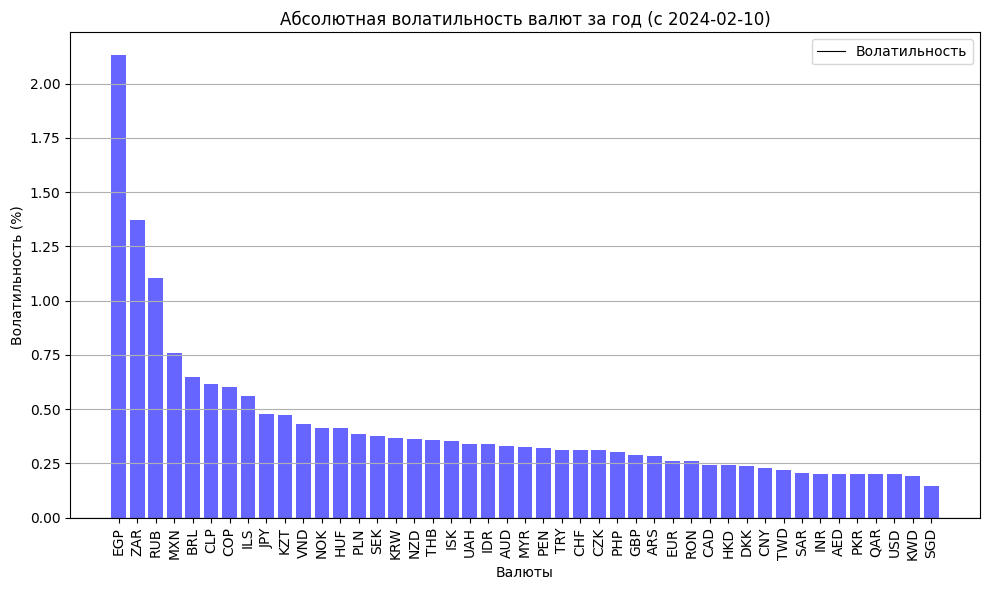

Файл "currency_volatility_3y.png" успешно обновлён!
Файл "currency_volatility_5y.png" успешно обновлён!
Файл "currency_volatility_10y.png" успешно обновлён!
{'месяц': [{'Ticker': 'SGD', 'Currency Name': 'Сингапурский доллар', 'Volatility (%)': 0.17005648326475636}, {'Ticker': 'TWD', 'Currency Name': 'Новый тайваньский доллар', 'Volatility (%)': 0.20262698270235485}, {'Ticker': 'HKD', 'Currency Name': 'Гонконгский доллар', 'Volatility (%)': 0.21900172327691544}, {'Ticker': 'EGP', 'Currency Name': 'Египетский фунт', 'Volatility (%)': 0.23347389686007777}, {'Ticker': 'KWD', 'Currency Name': 'Кувейтский динар', 'Volatility (%)': 0.23745830737507065}], 'квартал': [{'Ticker': 'SGD', 'Currency Name': 'Сингапурский доллар', 'Volatility (%)': 0.1512504858949104}, {'Ticker': 'KWD', 'Currency Name': 'Кувейтский динар', 'Volatility (%)': 0.20508053784992736}, {'Ticker': 'SAR', 'Currency Name': 'Саудовский риял', 'Volatility (%)': 0.21310335199920014}, {'Ticker': 'TWD', 'Currency Name': 'Новый тайв

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from github_lib_abscur2 import pass_file

# Создание словаря для хранения данных о волатильности валют по временным диапазонам
currency_volatility_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]

    # Создание списка для хранения волатильности
    volatility_values = []

    # Пробегаемся по всем тикерам валют
    for ticker in filtered_data.columns:
        # Вычисление относительных изменений
        relative_changes = (filtered_data[ticker].pct_change() * 100).dropna()  # Процентные изменения

        # Вычисление стандартного отклонения (волатильности)
        volatility = relative_changes.std()

        volatility_values.append({
            'Ticker': ticker,
            'Currency Name': cur_name[ticker],  # Получаем имя валюты из существующего словаря
            'Volatility (%)': volatility  # Добавляем знак процента в название колонки
        })

    # Создание DataFrame из списка волатильности
    volatility_df = pd.DataFrame(volatility_values)

    # Первая сортировка по возрастанию волатильности (чем ниже, тем лучше)
    volatility_df_sorted = volatility_df.sort_values(by='Volatility (%)', ascending=True)

    # Сохраняем данные о топ-5 валютах по волатильности в словарь по текущему периоду имени (только те, что показали наименьшую волатильность)
    currency_volatility_by_period[period_name] = volatility_df_sorted.head(5)[['Ticker', 'Currency Name', 'Volatility (%)']].to_dict(orient='records')

    # Вторая сортировка перед выводом на диаграмму по убыванию волатильности
    volatility_df_sorted = volatility_df_sorted.sort_values(by='Volatility (%)', ascending=False)

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для волатильности с синим цветом
    plt.bar(volatility_df_sorted['Ticker'], volatility_df_sorted['Volatility (%)'], color='blue', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Абсолютная волатильность валют за {period_name} (с {formatted_start_date})')
    plt.xlabel('Валюты')
    plt.ylabel('Волатильность (%)')
    
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для столбцов (тикеры валют)
    plt.xticks(rotation=90)  # Разворот подписей на 90 градусов

    plt.legend(['Волатильность'])
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск с суффиксом периода
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f'currency_volatility_{suffix}.png'
    
    # Сохранение графика на диск с разрешением 75 dpi
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь currency_volatility_by_period содержит данные о волатильности валют для использования при генерации JS-файла.
print(currency_volatility_by_period)


In [16]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"currency_volatility_{suffix}.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм абсолютной волатильности валют
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг абсолютной волатильности валют за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка валют с наибольшей абсолютной волатильностью из словаря currency_volatility_by_period
    volatility_data = currency_volatility_by_period.get(period_name, [])

    # Добавление списка валют с наибольшей абсолютной волатильностью
    js_code += '    var currencyList = document.createElement("p");\n'
    js_code += '    currencyList.innerHTML = "Топ валют по абсолютной волатильности: "; \n'
    
    for index, currency in enumerate(volatility_data):
        volatility_percentage = f"{currency['Volatility (%)']:.2f}"  # Форматирование процента до двух знаков после запятой
        
        if index < len(volatility_data) - 1:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {volatility_percentage}%, `;\n'
        else:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {volatility_percentage}%  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    currencyList.innerHTML = currencyList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(currencyList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("currency_volatility.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл currency_volatility.js успешно создан.")

# Публикуем график
pass_file("currency_volatility.js", is_image=False)


JavaScript файл currency_volatility.js успешно создан.
Файл "currency_volatility.js" успешно обновлён!


## Рейтинг валют по коэффициенту Шарпа
В данном разделе представлены диаграммы, отображающие рейтинги валют по коэффициенту Шарпа, рассчитанному на основе дневных абсолютных валютных курсов. Коэффициент Шарпа является безразмерной величиной, которая измеряет доходность инвестиций относительно их риска. Он рассчитывается как отношение средней доходности к стандартному отклонению доходности.

На графиках вы можете увидеть, какие валюты продемонстрировали наибольший коэффициент Шарпа, а также их тикеры и названия. Лучшие валюты расположены в правой части диаграмм. Гиперссылки на страницы с графиками соответствующих валют позволяют быстро получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят проанализировать эффективность различных валют с учетом их риска и доходности. Диаграммы предоставляют визуальный обзор коэффициента Шарпа валют, что делает анализ более доступным и информативным.

См. на сайте [https://www.abscur.ru/p/blog-page_6.html](https://www.abscur.ru/p/blog-page_6.html)х решений.

Файл "currency_sharpe_1m.png" успешно обновлён!
Файл "currency_sharpe_1q.png" успешно обновлён!
Файл "currency_sharpe_1y.png" успешно обновлён!
Файл "currency_sharpe_3y.png" успешно обновлён!
Файл "currency_sharpe_5y.png" успешно обновлён!
Файл "currency_sharpe_10y.png" успешно обновлён!
Выводим график для периода: десять лет


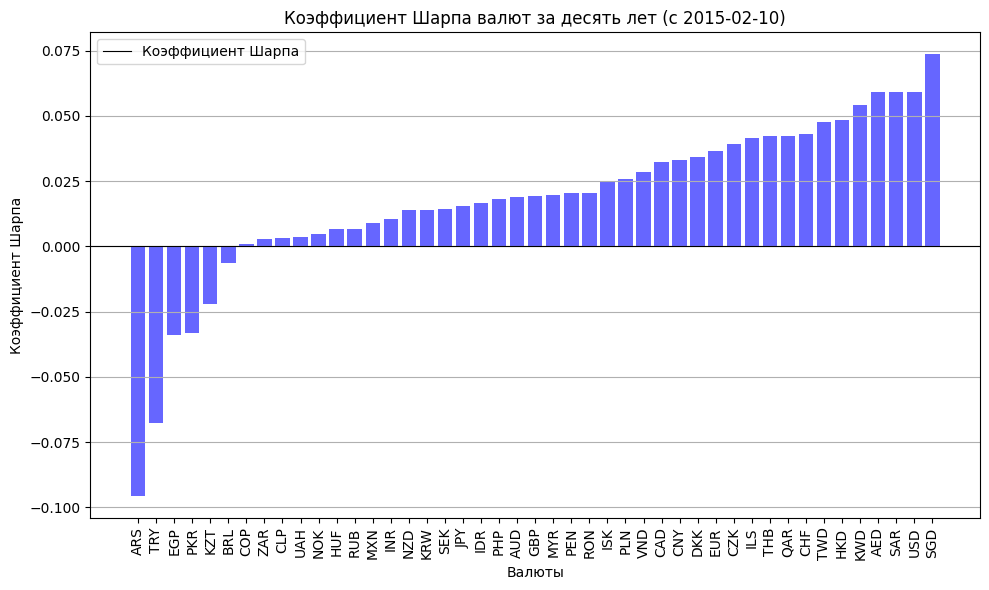

{'месяц': [{'Ticker': 'BRL', 'Currency Name': 'Бразильский реал', 'Sharpe Ratio': 0.2883020780708425}, {'Ticker': 'CLP', 'Currency Name': 'Чилийское песо', 'Sharpe Ratio': 0.26976933327660535}, {'Ticker': 'COP', 'Currency Name': 'Колумбийское песо', 'Sharpe Ratio': 0.2678968963965462}, {'Ticker': 'JPY', 'Currency Name': 'Японская иена', 'Sharpe Ratio': 0.22888324693302803}, {'Ticker': 'RUB', 'Currency Name': 'Российский рубль', 'Sharpe Ratio': 0.16899031940104253}], 'квартал': [{'Ticker': 'ILS', 'Currency Name': 'Новый израильский шекель', 'Sharpe Ratio': 0.1674906511008211}, {'Ticker': 'COP', 'Currency Name': 'Колумбийское песо', 'Sharpe Ratio': 0.14747093543541154}, {'Ticker': 'PEN', 'Currency Name': 'Перуанский новый соль', 'Sharpe Ratio': 0.13474543407413947}, {'Ticker': 'SAR', 'Currency Name': 'Саудовский риял', 'Sharpe Ratio': 0.10301294211891686}, {'Ticker': 'USD', 'Currency Name': 'Доллар США', 'Sharpe Ratio': 0.09412851424029052}], 'год': [{'Ticker': 'MYR', 'Currency Name': 'М

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from github_lib_abscur2 import pass_file

# Создание словаря для хранения данных о коэффициенте Шарпа валют по временным диапазонам
currency_sharpe_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]

    # Создание списка для хранения коэффициента Шарпа
    sharpe_values = []

    # Пробегаемся по всем тикерам валют
    for ticker in filtered_data.columns:
        # Вычисление относительных изменений
        relative_changes = (filtered_data[ticker].pct_change() * 100).dropna()  # Процентные изменения

        # Вычисление средней доходности и стандартного отклонения
        average_return = relative_changes.mean()
        volatility = relative_changes.std()

        # Рассчитываем коэффициент Шарпа (предполагаем, что безрисковая ставка равна 0)
        sharpe_ratio = average_return / volatility if volatility != 0 else 0

        sharpe_values.append({
            'Ticker': ticker,
            'Currency Name': cur_name[ticker],  # Получаем имя валюты из существующего словаря
            'Sharpe Ratio': sharpe_ratio  # Добавляем коэффициент Шарпа в название колонки
        })

    # Создание DataFrame из списка коэффициентов Шарпа
    sharpe_df = pd.DataFrame(sharpe_values)

    # Первая сортировка по убыванию коэффициента Шарпа (чем выше, тем лучше)
    sharpe_df_sorted = sharpe_df.sort_values(by='Sharpe Ratio', ascending=False)

    # Сохраняем данные о топ-5 валютах по коэффициенту Шарпа в словарь по текущему периоду имени (только те, что показали наибольший коэффициент)
    currency_sharpe_by_period[period_name] = sharpe_df_sorted.head(5)[['Ticker', 'Currency Name', 'Sharpe Ratio']].to_dict(orient='records')

    # Вторая сортировка перед выводом на диаграмму по возрастанию коэффициента Шарпа
    sharpe_df_sorted = sharpe_df_sorted.sort_values(by='Sharpe Ratio', ascending=True)

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для коэффициента Шарпа с синим цветом
    plt.bar(sharpe_df_sorted['Ticker'], sharpe_df_sorted['Sharpe Ratio'], color='blue', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Коэффициент Шарпа валют за {period_name} (с {formatted_start_date})')
    plt.xlabel('Валюты')
    plt.ylabel('Коэффициент Шарпа')
    
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для столбцов (тикеры валют)
    plt.xticks(rotation=90)  # Разворот подписей на 90 градусов

    plt.legend(['Коэффициент Шарпа'])
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск с суффиксом периода
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f'currency_sharpe_{suffix}.png'
    
    # Сохранение графика на диск с разрешением 75 dpi
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь currency_sharpe_by_period содержит данные о коэффициенте Шарпа валют для использования при генерации JS-файла.
print(currency_sharpe_by_period)


In [18]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"currency_sharpe_{suffix}.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм коэффициента Шарпа валют
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг коэффициента Шарпа валют за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка валют с наибольшим коэффициентом Шарпа из словаря currency_sharpe_by_period
    sharpe_data = currency_sharpe_by_period.get(period_name, [])

    # Добавление списка валют с наибольшим коэффициентом Шарпа
    js_code += '    var currencyList = document.createElement("p");\n'
    js_code += '    currencyList.innerHTML = "Топ валют по коэффициенту Шарпа: "; \n'
    
    for index, currency in enumerate(sharpe_data):
        sharpe_ratio = f"{currency['Sharpe Ratio']:.3f}"  # Форматирование коэффициента до трех знаков после запятой
        
        if index < len(sharpe_data) - 1:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {sharpe_ratio}, `;\n'
        else:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {sharpe_ratio}  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    currencyList.innerHTML = currencyList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(currencyList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("currency_sharpe.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл currency_sharpe.js успешно создан.")

# Публикуем график
pass_file("currency_sharpe.js", is_image=False)


JavaScript файл currency_sharpe.js успешно создан.
Файл "currency_sharpe.js" успешно обновлён!


## Рейтинг валют по коэффициенту Сортино

В данном разделе представлены диаграммы, отображающие рейтинги валют по коэффициенту Сортино, рассчитанному на основе дневных абсолютных валютных курсов. Коэффициент Сортино является безразмерной величиной, которая измеряет доходность инвестиций относительно их риска, учитывая только отрицательные отклонения от средней доходности. Это позволяет более точно оценить риск убытков.

На графиках вы можете увидеть, какие валюты продемонстрировали наибольший коэффициент Сортино, а также их тикеры и названия. Лучшие валюты расположены в правой части диаграмм. Гиперссылки на страницы с графиками соответствующих валют позволяют быстро получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят проанализировать эффективность различных валют с учетом их риска и доходности. Диаграммы предоставляют визуальный обзор коэффициента Сортино валют, что делает анализ более доступным и информативным.

См. на сайте [https://www.abscur.ru/p/blog-page_12.html](https://www.abscur.ru/p/blog-page_12.html)

Файл "currency_sortino_1m.png" успешно обновлён!
Файл "currency_sortino_1q.png" успешно обновлён!
Файл "currency_sortino_1y.png" успешно обновлён!
Файл "currency_sortino_3y.png" успешно обновлён!
Файл "currency_sortino_5y.png" успешно обновлён!
Выводим график для периода: пять лет


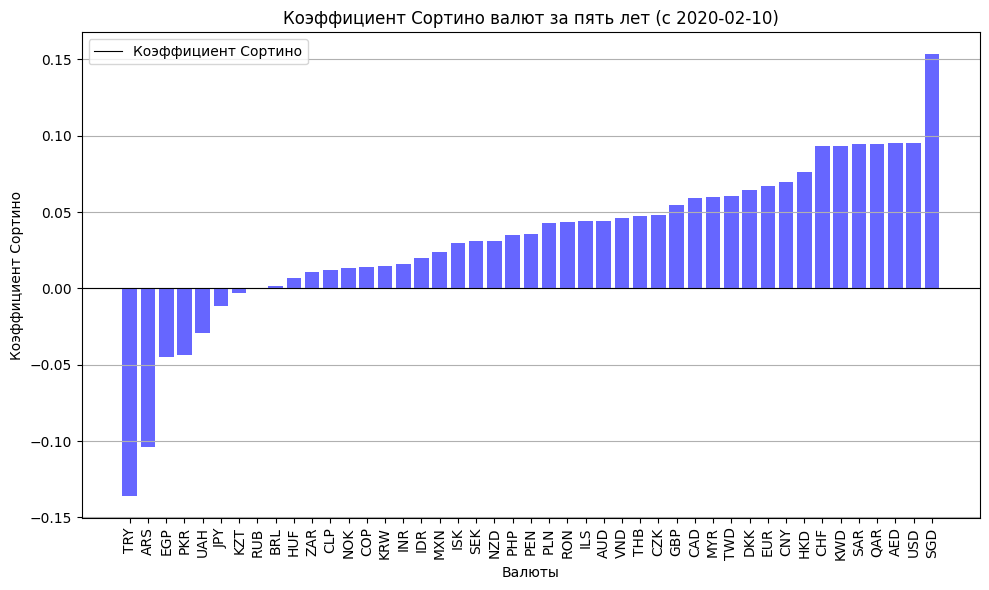

Файл "currency_sortino_10y.png" успешно обновлён!
{'месяц': [{'Ticker': 'BRL', 'Currency Name': 'Бразильский реал', 'Sortino Ratio': 0.39597956765583187}, {'Ticker': 'CLP', 'Currency Name': 'Чилийское песо', 'Sortino Ratio': 0.3828012572238167}, {'Ticker': 'COP', 'Currency Name': 'Колумбийское песо', 'Sortino Ratio': 0.3821120214314266}, {'Ticker': 'JPY', 'Currency Name': 'Японская иена', 'Sortino Ratio': 0.37068793383647164}, {'Ticker': 'RUB', 'Currency Name': 'Российский рубль', 'Sortino Ratio': 0.2733710016284377}], 'квартал': [{'Ticker': 'ILS', 'Currency Name': 'Новый израильский шекель', 'Sortino Ratio': 0.2455917028798365}, {'Ticker': 'COP', 'Currency Name': 'Колумбийское песо', 'Sortino Ratio': 0.21333131570852923}, {'Ticker': 'PEN', 'Currency Name': 'Перуанский новый соль', 'Sortino Ratio': 0.20227031547236168}, {'Ticker': 'SAR', 'Currency Name': 'Саудовский риял', 'Sortino Ratio': 0.1473851997439317}, {'Ticker': 'PHP', 'Currency Name': 'Филиппинское песо', 'Sortino Ratio': 0.1

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from github_lib_abscur2 import pass_file

# Создание словаря для хранения данных о коэффициенте Сортино валют по временным диапазонам
currency_sortino_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]

    # Создание списка для хранения коэффициента Сортино
    sortino_values = []

    # Пробегаемся по всем тикерам валют
    for ticker in filtered_data.columns:
        # Вычисление относительных изменений
        relative_changes = (filtered_data[ticker].pct_change() * 100).dropna()  # Процентные изменения

        # Вычисление средней доходности и стандартного отклонения отрицательных отклонений
        average_return = relative_changes.mean()
        downside_deviation = np.sqrt(np.mean(np.minimum(relative_changes - average_return, 0) ** 2))

        # Рассчитываем коэффициент Сортино (предполагаем, что безрисковая ставка равна 0)
        sortino_ratio = average_return / downside_deviation if downside_deviation != 0 else 0

        sortino_values.append({
            'Ticker': ticker,
            'Currency Name': cur_name[ticker],  # Получаем имя валюты из существующего словаря
            'Sortino Ratio': sortino_ratio  # Добавляем коэффициент Сортино в название колонки
        })

    # Создание DataFrame из списка коэффициентов Сортино
    sortino_df = pd.DataFrame(sortino_values)

    # Первая сортировка по убыванию коэффициента Сортино (чем выше, тем лучше)
    sortino_df_sorted = sortino_df.sort_values(by='Sortino Ratio', ascending=False)

    # Сохраняем данные о топ-5 валютах по коэффициенту Сортино в словарь по текущему периоду имени (только те, что показали наибольший коэффициент)
    currency_sortino_by_period[period_name] = sortino_df_sorted.head(5)[['Ticker', 'Currency Name', 'Sortino Ratio']].to_dict(orient='records')

    # Вторая сортировка перед выводом на диаграмму по возрастанию коэффициента Сортино
    sortino_df_sorted = sortino_df_sorted.sort_values(by='Sortino Ratio', ascending=True)

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для коэффициента Сортино с синим цветом
    plt.bar(sortino_df_sorted['Ticker'], sortino_df_sorted['Sortino Ratio'], color='blue', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Коэффициент Сортино валют за {period_name} (с {formatted_start_date})')
    plt.xlabel('Валюты')
    plt.ylabel('Коэффициент Сортино')
    
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для столбцов (тикеры валют)
    plt.xticks(rotation=90)  # Разворот подписей на 90 градусов

    plt.legend(['Коэффициент Сортино'])
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск с суффиксом периода
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f'currency_sortino_{suffix}.png'
    
    # Сохранение графика на диск с разрешением 75 dpi
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь currency_sortino_by_period содержит данные о коэффициенте Сортино валют для использования при генерации JS-файла.
print(currency_sortino_by_period)


In [20]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"currency_sortino_{suffix}.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм коэффициента Сортино валют
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг коэффициента Сортино валют за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка валют с наибольшим коэффициентом Сортино из словаря currency_sortino_by_period
    sortino_data = currency_sortino_by_period.get(period_name, [])

    # Добавление списка валют с наибольшим коэффициентом Сортино
    js_code += '    var currencyList = document.createElement("p");\n'
    js_code += '    currencyList.innerHTML = "Топ валют по коэффициенту Сортино: "; \n'
    
    for index, currency in enumerate(sortino_data):
        sortino_ratio = f"{currency['Sortino Ratio']:.3f}"  # Форматирование коэффициента до трех знаков после запятой
        
        if index < len(sortino_data) - 1:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {sortino_ratio}, `;\n'
        else:
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={currency["Ticker"]}">{currency["Currency Name"]} ({currency["Ticker"]})</a> - {sortino_ratio}  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    currencyList.innerHTML = currencyList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(currencyList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("currency_sortino.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл currency_sortino.js успешно создан.")

# Публикуем график
pass_file("currency_sortino.js", is_image=False)


JavaScript файл currency_sortino.js успешно создан.
Файл "currency_sortino.js" успешно обновлён!


## Связанность валют по абсолютному курсу

В данном разделе рассматривается анализ связанности валют на основе их абсолютных курсов, осуществленный с использованием методов визуализации графов. Для этого были построены графы, отражающие корреляционные связи между валютами в нескольких временных диапазонах. Такой подход позволяет выявить как положительные, так и отрицательные взаимосвязи между валютами, что является важным аспектом для понимания динамики финансовых рынков.

Графы построены на основе матрицы корреляции, вычисленной по абсолютным значениям курсов валют. Для фильтрации значений использован порог отсечения, который определяется как 90% процентиль абсолютных значений корреляций. Это означает, что в графах отображаются только те связи, которые превышают установленный порог, что позволяет сосредоточиться на наиболее значимых взаимосвязях. Порог отсечения вынесен на граф, что обеспечивает дополнительную информативность и позволяет пользователю быстро оценить уровень значимости представленных данных.

Визуально положительные корреляционные связи обозначены синим цветом, в то время как отрицательные связи представлены красным цветом. Такой цветовой код облегчает интерпретацию графов и позволяет быстро идентифицировать характер взаимосвязей между валютами. Синие ребра указывают на то, что валюты имеют тенденцию двигаться в одном направлении, тогда как красные ребра свидетельствуют о противоположной динамике. Таким образом, графы не только иллюстрируют степень связанности валют, но и дают возможность провести качественный анализ их взаимодействия в рамках выбранных временных диапазонов.

Подобный анализ связанности валют по абсолютному курсу является важным инструментом для трейдеров и аналитиков, позволяя им принимать более обоснованные решения на основе выявленных корреляционных зависимостей. В дальнейшем результаты данного анализа могут быть использованы для разработки стратегий хеджирования и управления рисками на финансовых рынках.

См. на сайте [https://www.abscur.ru/p/blog-page_22.html](https://www.abscur.ru/p/blog-page_22.html)

Файл "cur_graph_corr_1m.png" успешно обновлён!
Файл "cur_graph_corr_1q.png" успешно обновлён!
Файл "cur_graph_corr_1y.png" успешно обновлён!
Файл "cur_graph_corr_3y.png" успешно обновлён!


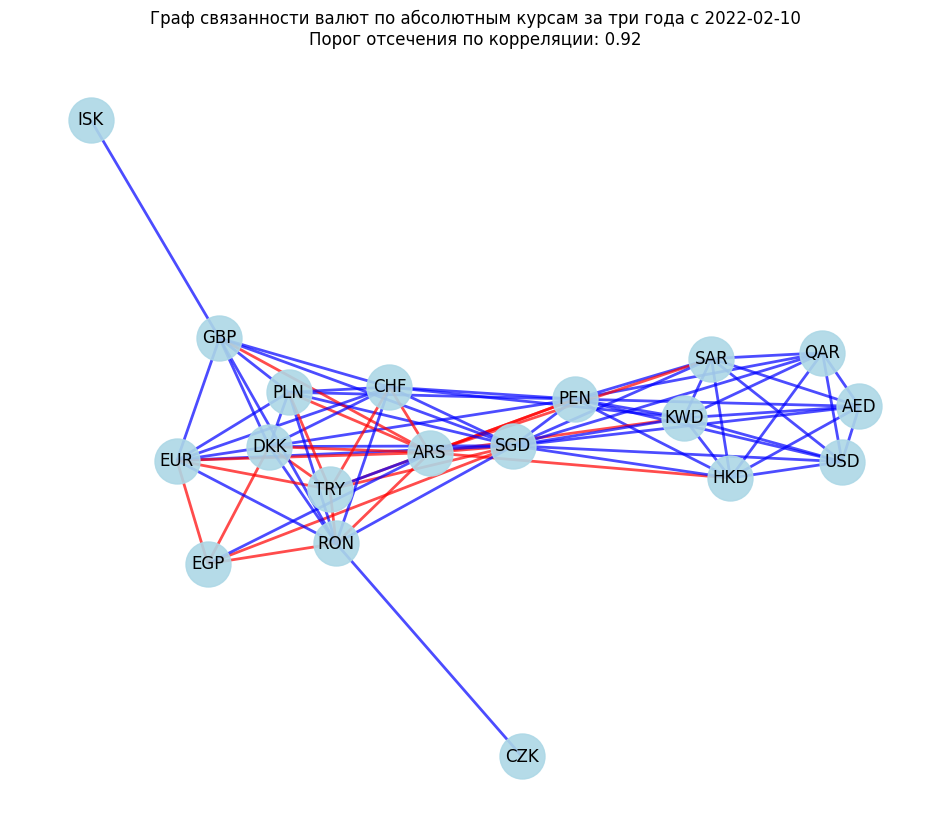

Файл "cur_graph_corr_5y.png" успешно обновлён!
Файл "cur_graph_corr_10y.png" успешно обновлён!


In [21]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from github_lib_abscur2 import pass_file
import random

# Выбор случайного периода
random_period = random.choice(list(ago_dates.keys()))

# Создание графов для каждого диапазона
for range_name, start_date in ago_dates.items():
    # Фильтрация данных по диапазону
    filtered_data = all_abscur.loc[start_date:]

    # Проверка, есть ли данные в выбранном диапазоне
    if filtered_data.empty:
        print(f'Нет данных для диапазона: {range_name}')
        continue

    # Расчет матрицы корреляции на основе абсолютных курсов
    correlation_matrix = filtered_data.corr()

    # Вычисление 90% квантиля абсолютных значений по коэффициентам корреляции
    mean_absolute_correlation = correlation_matrix.abs().values.flatten()
    threshold = np.percentile(mean_absolute_correlation, 90)  # 90-й процентиль

    # Создание графа
    G = nx.Graph()

    # Добавление ребер в граф на основе коэффициентов корреляции
    for currency1 in correlation_matrix.columns:
        for currency2 in correlation_matrix.columns:
            if currency1 != currency2:
                correlation_value = correlation_matrix.loc[currency1, currency2]
                if abs(correlation_value) > threshold:  # Используем абсолютное значение
                    if correlation_value != 0:  # Проверка на нулевую корреляцию
                        # Добавляем ребро с цветом, но фиксированной толщиной
                        G.add_edge(currency1, currency2, color='blue' if correlation_value > 0 else 'red')

    # Визуализация графа для текущего диапазона
    plt.figure(figsize=(12, 10))  # Увеличиваем размер фигуры для лучшей видимости
    
    # Увеличиваем значение k для большего отталкивания между несвязанными узлами и уменьшаем его для связанных узлов
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Получаем цвета ребер
    edge_colors = [G[u][v]['color'] for u, v in G.edges()]

    # Рисуем узлы и ребра с фиксированной толщиной
    edges = nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color=edge_colors)  # Фиксированная толщина 2
    
    # Увеличиваем размер узлов на 50% и делаем их светлее (например, светло-синий)
    nx.draw_networkx_nodes(G, pos, node_size=1050, node_color='lightblue', alpha=0.9)
    
    nx.draw_networkx_labels(G, pos, font_size=12)

    # Настройка отображения графа
    plt.title(f'Граф связанности валют по абсолютным курсам за {range_name} с {ago_dates[range_name].strftime("%Y-%m-%d")}\nПорог отсечения по корреляции: {threshold:.2f}')
    plt.axis('off')  # Отключаем оси

    # Сохранение графа на диск
    file_name = f'cur_graph_corr_{period_suffix[range_name]}.png'
    plt.savefig(file_name, format='png', bbox_inches='tight')  # Сохранение в формате PNG

    # Публикуем картинку
    pass_file(file_name)
    
    if range_name == random_period:
        # Показать диаграмму
        plt.show()
    else:
        # Закрытие графика
        plt.close()


## Связанность валют по изменениям абсолютных курсов валют

В данном разделе анализируется связанность валют на основе корреляции относительных изменений их абсолютных курсов. Относительные изменения представляют собой процентное изменение абсолютного курса валюты между двумя соседними днями, что позволяет оценить динамику цен и выявить тренды. Графы, построенные для нескольких временных диапазонов, обеспечивают возможность исследования изменений в корреляции между валютами в зависимости от времени и рыночных условий.

Для создания графов использовалась матрица корреляции, вычисленная на основе относительных изменений абсолютных курсов валют. В качестве критерия фильтрации значений применялся порог отсечения, определяемый как 90% процентиль абсолютных значений корреляций. Это позволяет сосредоточиться на наиболее значимых взаимосвязях, что способствует более точному восприятию информации.

Визуально положительные корреляционные связи обозначены синим цветом, тогда как отрицательные связи представлены красным. Такой цветовой код упрощает интерпретацию графов и позволяет быстро идентифицировать характер взаимосвязей между валютами. Синие ребра указывают на то, что валюты имеют тенденцию двигаться в одном направлении, тогда как красные ребра свидетельствуют о противоположной динамике. Порог отсечения также вынесен на графы, что добавляет дополнительную информативность и позволяет оценить уровень значимости представленных данных.

Анализ связанности валют по корреляции относительных изменений является важным инструментом для трейдеров и аналитиков. Он способствует выявлению текущих тенденций на рынке и прогнозированию возможных изменений в будущем. Результаты данного анализа могут быть использованы для разработки торговых стратегий и управления рисками, что делает его ценным ресурсом для исследовательской деятельности в области финансовых рынков.

См. на сайте [https://www.abscur.ru/p/blog-page_72.html](https://www.abscur.ru/p/blog-page_72.html)

Файл "rel_cur_graph_corr_1m.png" успешно обновлён!


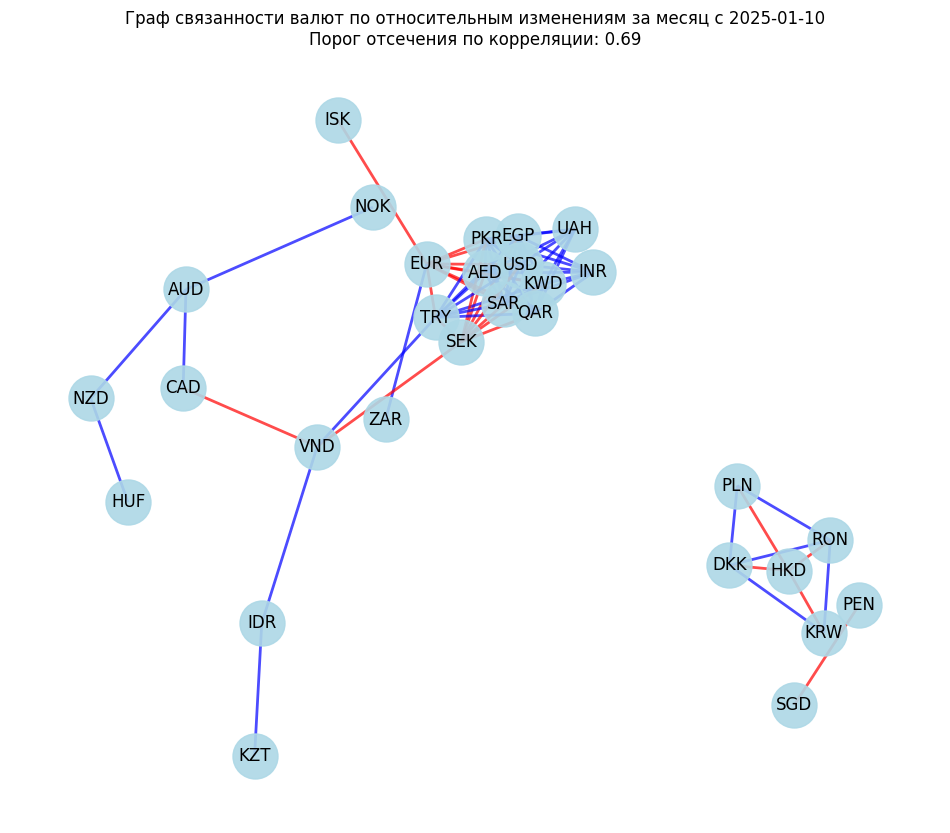

Файл "rel_cur_graph_corr_1q.png" успешно обновлён!
Файл "rel_cur_graph_corr_1y.png" успешно обновлён!
Файл "rel_cur_graph_corr_3y.png" успешно обновлён!
Файл "rel_cur_graph_corr_5y.png" успешно обновлён!
Файл "rel_cur_graph_corr_10y.png" успешно обновлён!


In [22]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from github_lib_abscur2 import pass_file
import random

# Выбор случайного периода
random_period = random.choice(list(ago_dates.keys()))

# Создание графов для каждого диапазона
for range_name, start_date in ago_dates.items():
    # Фильтрация данных по диапазону
    filtered_data = all_abscur.loc[start_date:]

    # Проверка, есть ли данные в выбранном диапазоне
    if filtered_data.empty:
        print(f'Нет данных для диапазона: {range_name}')
        continue

    # Вычисление относительных изменений (процентные изменения)
    relative_changes = filtered_data.pct_change().dropna()

    # Расчет матрицы корреляции на основе относительных изменений
    correlation_matrix = relative_changes.corr()

    # Вычисление 90% квантиля абсолютных значений по коэффициентам корреляции
    mean_absolute_correlation = correlation_matrix.abs().values.flatten()
    threshold = np.percentile(mean_absolute_correlation, 90)  # 90-й процентиль

    # Создание графа
    G = nx.Graph()

    # Добавление ребер в граф на основе коэффициентов корреляции
    for currency1 in correlation_matrix.columns:
        for currency2 in correlation_matrix.columns:
            if currency1 != currency2:
                correlation_value = correlation_matrix.loc[currency1, currency2]
                if abs(correlation_value) > threshold:  # Используем абсолютное значение
                    if correlation_value != 0:  # Проверка на нулевую корреляцию
                        # Добавляем ребро с цветом, но фиксированной толщиной
                        G.add_edge(currency1, currency2, color='blue' if correlation_value > 0 else 'red')

    # Визуализация графа для текущего диапазона
    plt.figure(figsize=(12, 10))  # Увеличиваем размер фигуры для лучшей видимости
    
    # Увеличиваем значение k для большего отталкивания между несвязанными узлами и уменьшаем его для связанных узлов
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Получаем цвета ребер
    edge_colors = [G[u][v]['color'] for u, v in G.edges()]

    # Рисуем узлы и ребра с фиксированной толщиной
    edges = nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color=edge_colors)  # Фиксированная толщина 2
    
    # Увеличиваем размер узлов на 50% и делаем их светлее (например, светло-синий)
    nx.draw_networkx_nodes(G, pos, node_size=1050, node_color='lightblue', alpha=0.9)
    
    nx.draw_networkx_labels(G, pos, font_size=12)

    # Настройка отображения графа
    plt.title(f'Граф связанности валют по относительным изменениям за {range_name} с {ago_dates[range_name].strftime("%Y-%m-%d")}\nПорог отсечения по корреляции: {threshold:.2f}')
    plt.axis('off')  # Отключаем оси

    # Сохранение графа на диск
    file_name = f'rel_cur_graph_corr_{period_suffix[range_name]}.png'
    plt.savefig(file_name, format='png', bbox_inches='tight')  # Сохранение в формате PNG

    # Публикуем картинку
    pass_file(file_name)
    
    if range_name == random_period:
        # Показать диаграмму
        plt.show()
    else:
        # Закрытие графика
        plt.close()


## Лучшие валютные портфели по Шарпу

В данном разделе моделируется поведение портфелей, основанное на стратегии "взял и держи". Эта стратегия предполагает, что в начале временного периода осуществляется покупка валют на рынке Forex в заранее определенных долях, после чего не производится никаких ребалансировок в течение всего временного диапазона. Это позволяет наблюдать за изменениями стоимости портфеля без вмешательства, что отражает реальную практику долгосрочных инвестиций.

Для анализа выбраны абсолютные валютные курсы, что позволяет соединить валюты в одном валютном портфеле и одинаково оценивать все валюты.

**Диаграмма риск-доходность**

На диаграмме риск-доходность представлены результаты анализа различных портфелей, сгенерированных с использованием случайных весов активов. Ось X отображает риск портфеля, измеряемый через стандартное отклонение доходности, в то время как ось Y представляет собой среднюю доходность. Каждый портфель визуализируется в виде точек, цвет которых соответствует значению коэффициента Шарпа. Выделение лучших портфелей осуществляется с помощью красной звезды, указывающей на портфель с максимальным коэффициентом Шарпа. Эта визуализация позволяет наглядно оценить соотношение между риском и доходностью для различных инвестиционных стратегий.

**График стоимости лучшего портфеля**

График стоимости лучшего портфеля демонстрирует динамику его стоимости в процентах относительно начальной стоимости на протяжении выбранного временного диапазона. На графике отображаются изменения стоимости активов, что позволяет проанализировать их поведение в условиях рыночной волатильности. Линия, представляющая начальную стоимость, служит ориентиром для оценки успешности стратегии управления активами. В заголовке графика указаны ключевые показатели: средняя доходность, риск и коэффициент Шарпа, что способствует более глубокому пониманию эффективности данного портфеля.

**Столбчатая диаграмма долей портфеля**

Столбчатая диаграмма иллюстрирует распределение долей активов в лучшем портфеле. Каждая колонка на графике представляет собой процентное соотношение конкретного актива в общем объеме инвестиций. Данная визуализация позволяет оценить диверсификацию портфеля и выявить наиболее значимые активы, влияющие на его общую производительность.
Анализ проводился для различных временных диапазонов, варьирующихся от одного месяца до десяти лет. Это разнообразие временных интервалов дает возможность исследовать устойчивость и адаптивность выбранных стратегий к изменяющимся рыночным условиям и помогает в принятии обоснованных инвестиционных решений.

**Все графики на сайте**

Здесь приводятся графики только для одного временного диапазона. Полный набор графиков и аналитики можно найти на сайте по [ссылке](https://www.abscur.ru/p/blog-page_8.html).

Файл "currency_sharp_risk_return_1m.png" успешно обновлён!
Файл "currency_sharp_value_1m.png" успешно обновлён!
Файл "currency_sharp_parts_1m.png" успешно обновлён!
Файл "currency_sharp_risk_return_1q.png" успешно обновлён!


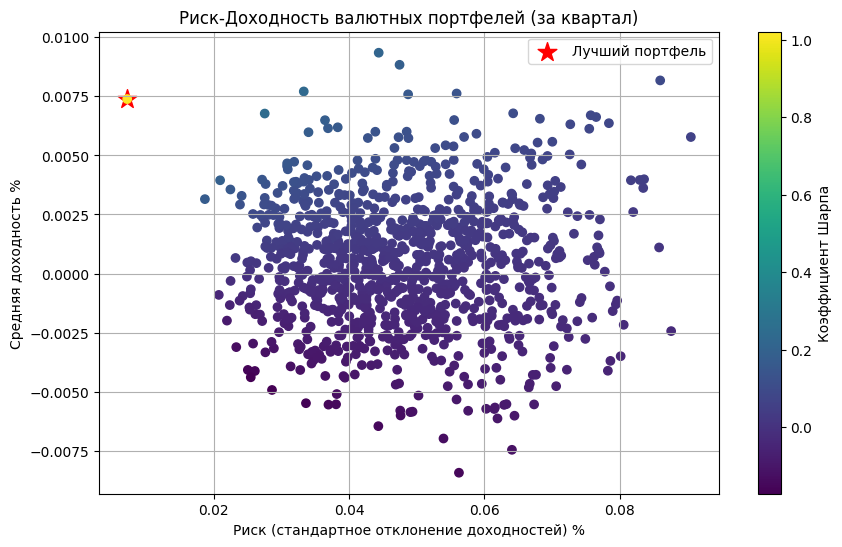

Файл "currency_sharp_value_1q.png" успешно обновлён!


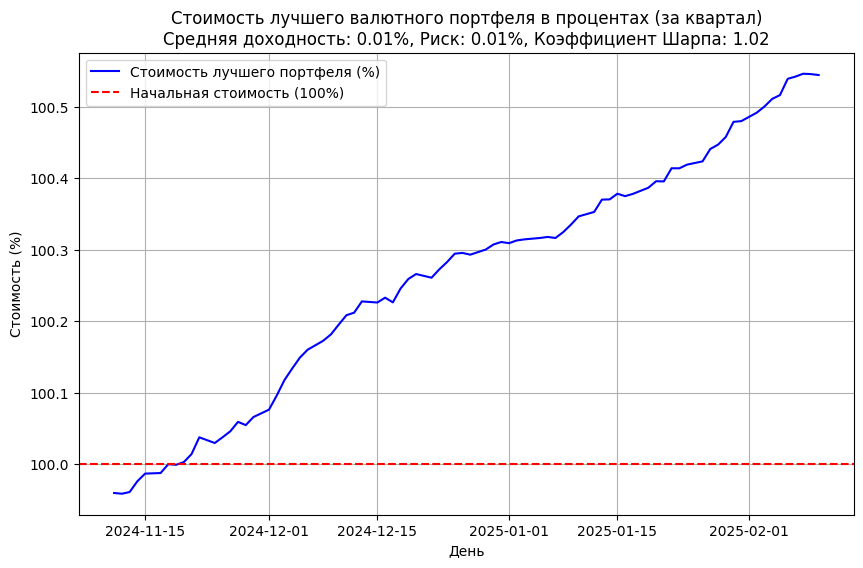

Файл "currency_sharp_parts_1q.png" успешно обновлён!


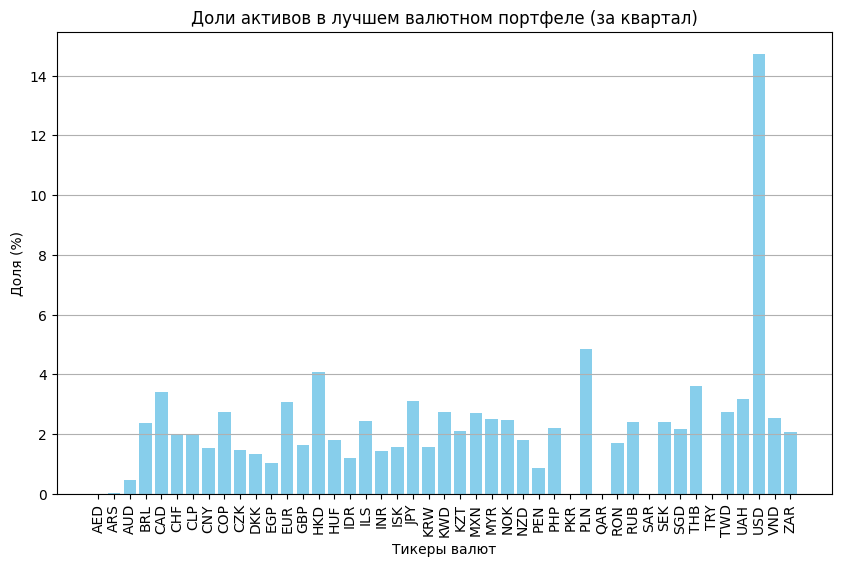

Файл "currency_sharp_risk_return_1y.png" успешно обновлён!
Файл "currency_sharp_value_1y.png" успешно обновлён!
Файл "currency_sharp_parts_1y.png" успешно обновлён!
Файл "currency_sharp_risk_return_3y.png" успешно обновлён!
Файл "currency_sharp_value_3y.png" успешно обновлён!
Файл "currency_sharp_parts_3y.png" успешно обновлён!
Файл "currency_sharp_risk_return_5y.png" успешно обновлён!
Файл "currency_sharp_value_5y.png" успешно обновлён!
Файл "currency_sharp_parts_5y.png" успешно обновлён!
Файл "currency_sharp_risk_return_10y.png" успешно обновлён!
Файл "currency_sharp_value_10y.png" успешно обновлён!
Файл "currency_sharp_parts_10y.png" успешно обновлён!


{'месяц': [('EGP', 'Египетский фунт', 12.053267111102482),
  ('SAR', 'Саудовский риял', 8.869295451757141),
  ('SEK', 'Шведская крона', 7.896480803596026),
  ('GBP', 'Фунт стерлингов', 4.464801312146916),
  ('RON', 'Румынский лей', 4.342335336879218),
  ('HUF', 'Венгерский форинт', 4.328964733464104),
  ('COP', 'Колумбийское песо', 3.988905014697572),
  ('AUD', 'Австралийский доллар', 3.4812714486057614),
  ('UAH', 'Украинская гривна', 3.3124421654712),
  ('THB', 'Тайский бат', 3.2002125415056355),
  ('PLN', 'Польский злотый', 2.9870774866045773),
  ('ILS', 'Новый израильский шекель', 2.6718578987919477),
  ('KZT', 'Казахстанский тенге', 2.561989873542618),
  ('ISK', 'Исландская крона', 2.3334835662677893),
  ('ZAR', 'Южноафриканский рэнд', 2.2963938567744155),
  ('VND', 'Вьетнамский донг', 2.159392766147329),
  ('PEN', 'Перуанский новый соль', 2.140534711755854),
  ('ARS', 'Аргентинское песо', 2.1071021370853047),
  ('CAD', 'Канадский доллар', 2.1004339954084514),
  ('QAR', 'Катарский

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize
from github_lib_abscur2 import pass_file

# Выбор случайного периода
random_period = random.choice(list(ago_dates.keys()))

# Функция для расчета средней доходности и риска портфеля
def portfolio_performance(weights, cumulative_returns):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    # Дневная средняя доходность и стандартное отклонение по доходности
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    portfolio_std_dev = np.std(daily_returns)  # стандартное отклонение (риск)
    
    return portfolio_mean_return, portfolio_std_dev  # возвращаем среднюю доходность и риск

# Функция для расчета коэффициента Шарпа
def sharpe_ratio(weights, cumulative_returns, risk_free_rate=0):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    portfolio_volatility = np.std(daily_returns)  # стандартное отклонение доходности
    
    if portfolio_volatility == 0:
        return -np.inf  # Если волатильность равна 0, возвращаем отрицательную бесконечность (максимальный коэффициент)
    
    return (portfolio_mean_return - risk_free_rate) / portfolio_volatility  # Коэффициент Шарпа

# Функция для минимизации коэффициента Шарпа (отрицательное значение)
def neg_sharpe_ratio(weights, cumulative_returns):
    return -sharpe_ratio(weights, cumulative_returns)  # Возвращаем отрицательное значение коэффициента Шарпа

# Словарь для хранения валют и их долей по диапазонам
portfolio_weights_by_period = {}

# Основной цикл по диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по текущему диапазону для валют
    filtered_data = all_abscur[all_abscur.index >= start_date]
    
    if filtered_data.empty:
        print(f"Нет данных для диапазона {period_name} начиная с {start_date}.")
        continue
    
    returns = np.diff(filtered_data.to_numpy(), axis=0) / filtered_data.to_numpy()[:-1]  # относительные изменения
    
    # Вычисляем кумулятивные доходности один раз
    cumulative_returns = np.cumprod(1 + returns, axis=0)  # кумулятивные доходности
    
    num_portfolios = 1000
    num_assets = filtered_data.shape[1]
    results = np.zeros((3, num_portfolios + 1))
    
    best_random_weights = None
    
    # Генерация портфелей и расчет их характеристик
    for i in range(num_portfolios):
        random_weights = np.random.rand(num_assets)  # генерируем случайный ряд
        random_weights /= np.sum(random_weights)  # Нормализуем веса так, чтобы они в сумме давали единицу
        
        portfolio_mean_return, portfolio_volatility = portfolio_performance(random_weights, cumulative_returns)
        results[0, i] = portfolio_mean_return
        results[1, i] = portfolio_volatility
        results[2, i] = sharpe_ratio(random_weights, cumulative_returns)
    
        if best_random_weights is None or results[2, i] >= results[2].max():
            best_random_weights = random_weights
    
    # Оптимизация портфеля с использованием scipy.optimize.minimize с ограничениями
    initial_weights = best_random_weights.copy()  # Начальные веса как лучшие случайные веса
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},   # Сумма весов должна быть равна 1
        {'type': 'ineq', 'fun': lambda x: x}              # Все веса должны быть неотрицательными
    )
    
    optimal_solution = minimize(neg_sharpe_ratio, initial_weights,
                                args=(cumulative_returns,),
                                constraints=constraints)
    
    best_weights = optimal_solution.x  # Оптимальные веса портфеля
    
    best_portfolio_value = cumulative_returns @ best_weights
    
    best_portfolio_return, best_portfolio_volatility = portfolio_performance(best_weights, cumulative_returns)
    
    results[0, -1] = best_portfolio_return
    results[1, -1] = best_portfolio_volatility
    results[2, -1] = sharpe_ratio(best_weights, cumulative_returns)
    
    # Преобразование стоимости в проценты относительно начальной стоимости 
    best_portfolio_value_percent = best_portfolio_value * 100 
    
    dates = all_abscur.index[-len(best_portfolio_value):]
    
    plt.figure(figsize=(10,6))
    plt.scatter(best_portfolio_volatility * 100,best_portfolio_return * 100,color='red', marker='*', s=200,label='Лучший портфель')
    plt.scatter(results[1, :] * 100, results[0, :] * 100, c=results[2, :], cmap='viridis', marker='o')
    plt.title(f'Риск-Доходность валютных портфелей (за {period_name})')
    plt.xlabel('Риск (стандартное отклонение доходностей) %')
    plt.ylabel('Средняя доходность %')
    plt.colorbar(label='Коэффициент Шарпа')
    plt.legend()
    plt.grid()
    
    file_name_risk_return=f'currency_sharp_risk_return_{period_suffix[period_name]}.png'
    plt.savefig(file_name_risk_return,dpi=75)
    
    pass_file(file_name_risk_return)
    
    if period_name == random_period:
        plt.show()
    else:
        plt.close()
    
    sharpe_ratio_value=sharpe_ratio(best_weights,cumulative_returns)
    
    plt.figure(figsize=(10,6))
    plt.plot(dates,best_portfolio_value_percent,label='Стоимость лучшего портфеля (%)',color='blue')
    plt.title(f'Стоимость лучшего валютного портфеля в процентах (за {period_name})\n'
             f'Средняя доходность: {best_portfolio_return * 100:.2f}%, '
             f'Риск: {best_portfolio_volatility * 100:.2f}%, '
             f'Коэффициент Шарпа: {sharpe_ratio_value:.2f}')
    plt.xlabel('День')
    plt.ylabel('Стоимость (%)')
    plt.axhline(y=100,color='r',linestyle='--',label='Начальная стоимость (100%)') 
    plt.legend()
    plt.grid()
    
    file_name_value=f'currency_sharp_value_{period_suffix[period_name]}.png'
    plt.savefig(file_name_value,dpi=75)
    
    pass_file(file_name_value)
    
    if period_name == random_period:
        plt.show()
    else:
        plt.close()
    
    best_weights_percent=best_weights * 100 
    
    # Сохранение валют и их долей в словаре для дальнейшего использования
    currency_weight_dict=dict(zip([cur_name[ticker] for ticker in all_abscur.columns.tolist()], best_weights_percent))
    
    # Отбор валют с наибольшими долями до достижения суммы в 90%
    sorted_currencies=sorted(currency_weight_dict.items(), key=lambda x: x[1], reverse=True)
    
    cumulative_percentage=0
    selected_currencies_list=[]
    
    for currency_name, weight in sorted_currencies:
        if cumulative_percentage < 90:
            selected_currencies_list.append((currency_name, weight))
            cumulative_percentage += weight
    
    # Визуализация долей активов в лучшем валютном портфеле
    plt.figure(figsize=(10,6))
    plt.bar([cur_ticker for cur_ticker in all_abscur.columns.tolist()], best_weights_percent,color='skyblue')
    plt.title(f'Доли активов в лучшем валютном портфеле (за {period_name})')
    plt.xlabel('Тикеры валют')
    plt.ylabel('Доля (%)')
    plt.xticks(rotation=90)  # Поворот на 90 градусов для тикеров валют
    plt.grid(axis='y')
    
    file_name_parts=f'currency_sharp_parts_{period_suffix[period_name]}.png'
    plt.savefig(file_name_parts,dpi=75)
    
    pass_file(file_name_parts)
    
    if period_name == random_period:
        plt.show()
    else:
        plt.close()
    
    # Сохранение информации о выбранных валютах и их долях для дальнейшего использования в JS-файле,
    # включая тикеры для гиперссылок.
    portfolio_weights_by_period[period_name] = [(ticker,name,weight) for name,weight in selected_currencies_list 
                                        for ticker in cur_name.keys() 
                                        if cur_name[ticker]==name]

portfolio_weights_by_period


In [24]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = []

# Генерация имен файлов для валютных портфелей по Шарпу
for period_name, start_date in ago_dates.items():
    suffix = period_suffix[period_name]
    # Форматируем дату с помощью pandas
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты без времени
    image_filenames.append((period_name, formatted_start_date, f'currency_sharp_risk_return_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'currency_sharp_value_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'currency_sharp_parts_{suffix}.png'))

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм валютных портфелей по коэффициенту Шарпа
document.addEventListener("DOMContentLoaded", function() {
    const container = document.getElementById("charts-container");
"""

# Добавление изображений и подзаголовков
current_period_name = None

for period_name, start_date, filename in image_filenames:
    # Добавление подзаголовка только в начале новой серии
    if current_period_name != period_name:
        current_period_name = period_name
        js_code += f'    var header = document.createElement("p");\n'
        js_code += f'    header.innerHTML = "<strong>За {period_name} (начало: {start_date})</strong>";\n'
        js_code += '    container.appendChild(header);\n'
    
    # Добавление изображения
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Если это диаграмма с долями активов, добавляем список валют
    if "parts" in filename:
        currencies_info = portfolio_weights_by_period[period_name]
        
        # Добавление списка валют с долями
        js_code += '    var currencyList = document.createElement("p");\n'
        js_code += '    currencyList.innerHTML = "<strong>Топ валют по долям в портфеле:</strong> "; \n'
        
        for ticker, name, weight in currencies_info:
            weight_formatted = f"{weight:.2f}"  # Форматирование доли до двух знаков после запятой
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={ticker}">{ticker} ({name})</a> - {weight_formatted}%, `;\n'

        # Удаление последней запятой (если она есть)
        js_code += '    currencyList.innerHTML = currencyList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
        
        js_code += '    container.appendChild(currencyList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("currency_sharp_portfolio_ratios.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл currency_sharp_portfolio_ratios.js успешно создан.")

# Публикуем файл
pass_file("currency_sharp_portfolio_ratios.js", is_image=False)


JavaScript файл currency_sharp_portfolio_ratios.js успешно создан.
Файл "currency_sharp_portfolio_ratios.js" успешно обновлён!


## Лучшие валютные портфели по Сортино

Файл "currency_portfolio_sortino_risk_doh_1m.png" успешно обновлён!
Файл "currency_portfolio_sortino_value_1m.png" успешно обновлён!
Файл "currency_portfolio_sortino_parts_1m.png" успешно обновлён!
Файл "currency_portfolio_sortino_risk_doh_1q.png" успешно обновлён!
Файл "currency_portfolio_sortino_value_1q.png" успешно обновлён!
Файл "currency_portfolio_sortino_parts_1q.png" успешно обновлён!
Файл "currency_portfolio_sortino_risk_doh_1y.png" успешно обновлён!
Файл "currency_portfolio_sortino_value_1y.png" успешно обновлён!
Файл "currency_portfolio_sortino_parts_1y.png" успешно обновлён!
Файл "currency_portfolio_sortino_risk_doh_3y.png" успешно обновлён!


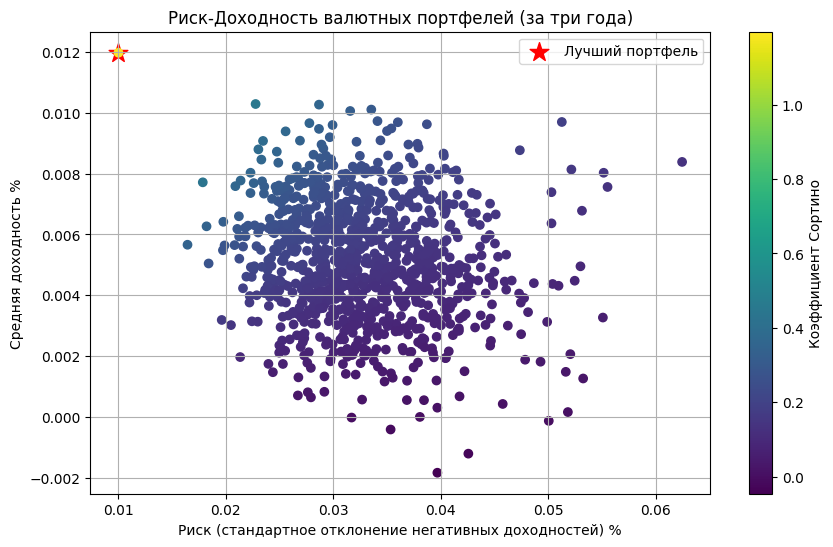

Файл "currency_portfolio_sortino_value_3y.png" успешно обновлён!


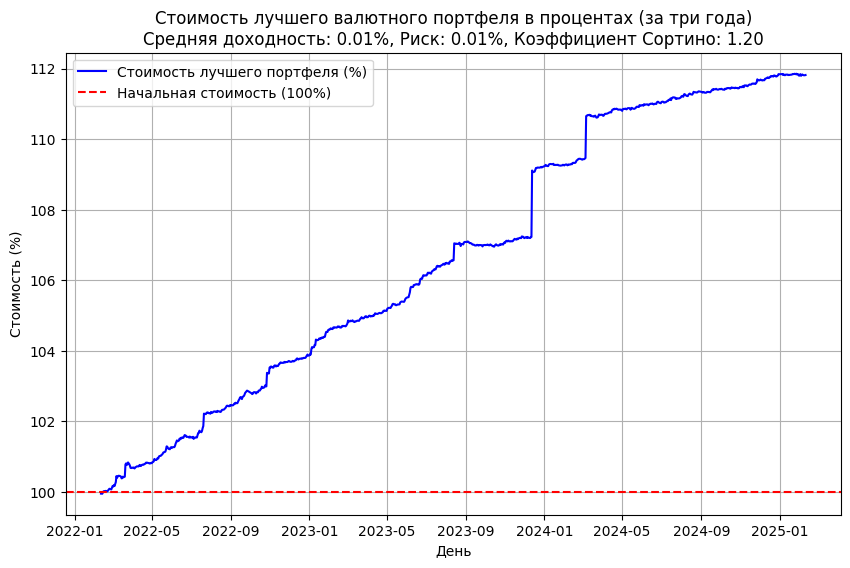

Файл "currency_portfolio_sortino_parts_3y.png" успешно обновлён!


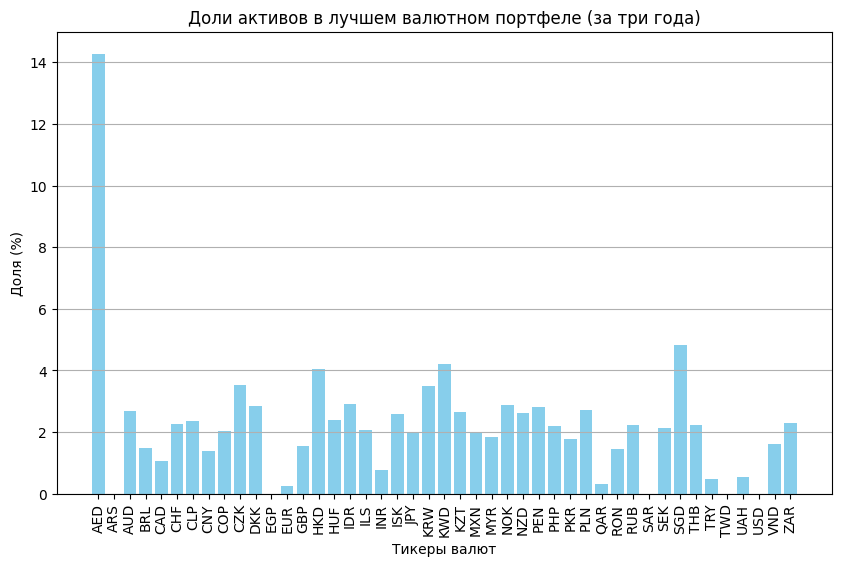

Файл "currency_portfolio_sortino_risk_doh_5y.png" успешно обновлён!
Файл "currency_portfolio_sortino_value_5y.png" успешно обновлён!
Файл "currency_portfolio_sortino_parts_5y.png" успешно обновлён!
Файл "currency_portfolio_sortino_risk_doh_10y.png" успешно обновлён!
Файл "currency_portfolio_sortino_value_10y.png" успешно обновлён!
Файл "currency_portfolio_sortino_parts_10y.png" успешно обновлён!


{'месяц': [('BRL', 'Бразильский реал', 14.81074211545309),
  ('RUB', 'Российский рубль', 11.006839293040532),
  ('JPY', 'Японская иена', 7.823866658151419),
  ('COP', 'Колумбийское песо', 6.385065569278124),
  ('KZT', 'Казахстанский тенге', 6.252258355585673),
  ('HUF', 'Венгерский форинт', 4.33326859677061),
  ('MXN', 'Мексиканское песо', 3.724040962975636),
  ('ZAR', 'Южноафриканский рэнд', 3.6416433303439764),
  ('SEK', 'Шведская крона', 2.900575265511917),
  ('CLP', 'Чилийское песо', 2.8562809115187915),
  ('THB', 'Тайский бат', 2.5852102215186674),
  ('UAH', 'Украинская гривна', 2.5098201312056205),
  ('PLN', 'Польский злотый', 2.2431064720939755),
  ('MYR', 'Малайзийский ринггит', 1.9865543084424537),
  ('IDR', 'Индонезийская рупия', 1.829122149144423),
  ('NOK', 'Норвежская крона', 1.7700698620128272),
  ('ILS', 'Новый израильский шекель', 1.6803002487124785),
  ('ARS', 'Аргентинское песо', 1.666210077470013),
  ('SAR', 'Саудовский риял', 1.619734822891107),
  ('VND', 'Вьетнамск

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize
from github_lib_abscur2 import pass_file

# Выбор случайного периода
random_period = random.choice(list(ago_dates.keys()))

# Функция для расчета средней доходности и риска портфеля с методом "взял и держи"
def portfolio_performance(weights, cumulative_returns):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    # Дневная средняя доходность
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    
    # Расчет негативных отклонений для коэффициента Сортино
    downside_returns = daily_returns[daily_returns < 0]  # отрицательные отклонения
    
    downside_deviation = np.std(downside_returns) if len(downside_returns) > 0 else 0  # стандартное отклонение негативных доходностей
    
    return portfolio_mean_return, downside_deviation  # возвращаем среднюю доходность и риск

# Функция для расчета коэффициента Сортино
def sortino_ratio(weights, cumulative_returns, target_return=0):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    downside_returns = daily_returns[daily_returns < target_return]  # отрицательные отклонения
    
    downside_deviation = np.std(downside_returns) if len(downside_returns) > 0 else 0  # стандартное отклонение негативных доходностей
    
    if downside_deviation == 0:
        return np.inf  # Если нет негативных отклонений, возвращаем бесконечность (максимальный коэффициент)
    
    return (portfolio_mean_return - target_return) / downside_deviation  # Коэффициент Сортино

# Функция для минимизации коэффициента Сортино (отрицательное значение)
def neg_sortino_ratio(weights, cumulative_returns):
    return -sortino_ratio(weights, cumulative_returns)  # Возвращаем отрицательное значение коэффициента Сортино

# Словарь для хранения валют и их долей по диапазонам
portfolio_weights_by_period = {}

# Основной цикл по диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по текущему диапазону для валют
    filtered_data = all_abscur[all_abscur.index >= start_date]
    
    if filtered_data.empty:
        print(f"Нет данных для диапазона {period_name} начиная с {start_date}.")
        continue
    
    returns = np.diff(filtered_data.to_numpy(), axis=0) / filtered_data.to_numpy()[:-1]  # относительные изменения
    
    # Вычисляем кумулятивные доходности один раз
    cumulative_returns = np.cumprod(1 + returns, axis=0)  # кумулятивные доходности
    
    num_portfolios = 1000
    num_assets = filtered_data.shape[1]
    results = np.zeros((3, num_portfolios + 1))
    
    best_random_weights = None
    
    # Генерация портфелей и расчет их характеристик
    for i in range(num_portfolios):
        random_weights = np.random.rand(num_assets)  # генерируем случайный ряд
        random_weights /= np.sum(random_weights)  # Нормализуем веса так, чтобы они в сумме давали единицу
        
        portfolio_mean_return, downside_deviation = portfolio_performance(random_weights, cumulative_returns)
        results[0, i] = portfolio_mean_return
        results[1, i] = downside_deviation
        results[2, i] = sortino_ratio(random_weights, cumulative_returns)

        if best_random_weights is None or results[2, i] >= results[2].max():
            best_random_weights = random_weights
    
    # Оптимизация портфеля с использованием scipy.optimize.minimize с ограничениями
    initial_weights = best_random_weights.copy()  # Начальные веса как лучшие случайные веса
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},   # Сумма весов должна быть равна 1
        {'type': 'ineq', 'fun': lambda x: x}              # Все веса должны быть неотрицательными
    )
    
    optimal_solution = minimize(neg_sortino_ratio, initial_weights,
                                args=(cumulative_returns,),
                                constraints=constraints)
    
    best_weights = optimal_solution.x  # Оптимальные веса портфеля
    
    best_portfolio_value = cumulative_returns @ best_weights
    
    best_portfolio_return, best_downside_deviation = portfolio_performance(best_weights, cumulative_returns)
    
    results[0, -1] = best_portfolio_return
    results[1, -1] = best_downside_deviation
    results[2, -1] = sortino_ratio(best_weights, cumulative_returns)
    
    # Преобразование стоимости в проценты относительно начальной стоимости 
    best_portfolio_value_percent = best_portfolio_value * 100 
    
    dates = all_abscur.index[-len(best_portfolio_value):]
    
    plt.figure(figsize=(10,6))
    plt.scatter(best_downside_deviation * 100,best_portfolio_return * 100,color='red', marker='*', s=200,label='Лучший портфель')
    plt.scatter(results[1, :] * 100, results[0, :] * 100, c=results[2, :], cmap='viridis', marker='o')
    plt.title(f'Риск-Доходность валютных портфелей (за {period_name})')
    plt.xlabel('Риск (стандартное отклонение негативных доходностей) %')
    plt.ylabel('Средняя доходность %')
    plt.colorbar(label='Коэффициент Сортино')
    plt.legend()
    plt.grid()
    
    file_name_risk_return=f'currency_portfolio_sortino_risk_doh_{period_suffix[period_name]}.png'
    plt.savefig(file_name_risk_return,dpi=75)
    
    pass_file(file_name_risk_return)
    
    if period_name == random_period:
        plt.show()
    else:
        plt.close()
    
    sortino_ratio_value=sortino_ratio(best_weights,cumulative_returns)
    
    plt.figure(figsize=(10,6))
    plt.plot(dates,best_portfolio_value_percent,label='Стоимость лучшего портфеля (%)',color='blue')
    plt.title(f'Стоимость лучшего валютного портфеля в процентах (за {period_name})\n'
             f'Средняя доходность: {best_portfolio_return * 100:.2f}%, '
             f'Риск: {best_downside_deviation * 100:.2f}%, '
             f'Коэффициент Сортино: {sortino_ratio_value:.2f}')
    plt.xlabel('День')
    plt.ylabel('Стоимость (%)')
    plt.axhline(y=100,color='r',linestyle='--',label='Начальная стоимость (100%)') 
    plt.legend()
    plt.grid()
    
    file_name_value=f'currency_portfolio_sortino_value_{period_suffix[period_name]}.png'
    plt.savefig(file_name_value,dpi=75)
    
    pass_file(file_name_value)
    
    if period_name == random_period:
        plt.show()
    else:
        plt.close()
    
    best_weights_percent=best_weights * 100 
    
    # Сохранение валют и их долей в словаре для дальнейшего использования
    currency_weight_dict=dict(zip([cur_name[ticker] for ticker in all_abscur.columns.tolist()], best_weights_percent))
    
    # Отбор валют с наибольшими долями до достижения суммы в 90%
    sorted_currencies=sorted(currency_weight_dict.items(), key=lambda x: x[1], reverse=True)
    
    cumulative_percentage=0
    selected_currencies_list=[]
    
    for currency_name, weight in sorted_currencies:
        if cumulative_percentage < 90:
            selected_currencies_list.append((currency_name, weight))
            cumulative_percentage += weight
    
    # Визуализация долей активов в лучшем валютном портфеле
    plt.figure(figsize=(10,6))
    plt.bar([ticker for ticker in all_abscur.columns.tolist()], best_weights_percent,color='skyblue')
    plt.title(f'Доли активов в лучшем валютном портфеле (за {period_name})')
    plt.xlabel('Тикеры валют')
    plt.ylabel('Доля (%)')
    plt.xticks(rotation=90)  # Поворот на 90 градусов для тикеров валют
    plt.grid(axis='y')
    
    file_name_parts=f'currency_portfolio_sortino_parts_{period_suffix[period_name]}.png'
    plt.savefig(file_name_parts,dpi=75)
    
    pass_file(file_name_parts)
    
    if period_name == random_period:
        plt.show()
    else:
        plt.close()
    
    # Сохранение информации о выбранных валютах и их долях для дальнейшего использования в JS-файле,
    # включая тикеры для гиперссылок.
    portfolio_weights_by_period[period_name] = [(ticker,name,weight) for name,weight in selected_currencies_list 
                                        for ticker in all_abscur.columns.tolist() 
                                        if cur_name[ticker]==name]

portfolio_weights_by_period


In [26]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = []

# Генерация имен файлов для валютных портфелей по Сортино
for period_name, start_date in ago_dates.items():
    suffix = period_suffix[period_name]
    # Форматируем дату с помощью pandas
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты без времени
    image_filenames.append((period_name, formatted_start_date, f'currency_portfolio_sortino_risk_doh_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'currency_portfolio_sortino_value_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'currency_portfolio_sortino_parts_{suffix}.png'))

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм валютных портфелей по коэффициенту Сортино
document.addEventListener("DOMContentLoaded", function() {
    const container = document.getElementById("charts-container");
"""

# Добавление изображений и подзаголовков
current_period_name = None

for period_name, start_date, filename in image_filenames:
    # Добавление подзаголовка только в начале новой серии
    if current_period_name != period_name:
        current_period_name = period_name
        js_code += f'    var header = document.createElement("p");\n'
        js_code += f'    header.innerHTML = "<strong>За {period_name} (начало: {start_date})</strong>";\n'
        js_code += '    container.appendChild(header);\n'
    
    # Добавление изображения
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Если это диаграмма с долями активов, добавляем список валют
    if "parts" in filename:
        currencies_info = portfolio_weights_by_period[period_name]
        
        # Добавление списка валют с долями
        js_code += '    var currencyList = document.createElement("p");\n'
        js_code += '    currencyList.innerHTML = "<strong>Топ валют по долям в портфеле:</strong> "; \n'
        
        for ticker, name, weight in currencies_info:
            weight_formatted = f"{weight:.2f}"  # Форматирование доли до двух знаков после запятой
            js_code += f'    currencyList.innerHTML += `<a href="https://www.abscur.ru/p/2.html?abs={ticker}">{ticker} ({name})</a> - {weight_formatted}%, `;\n'

        # Удаление последней запятой (если она есть)
        js_code += '    currencyList.innerHTML = currencyList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
        
        js_code += '    container.appendChild(currencyList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("currency_sortino_portfolio_ratios.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл currency_sortino_portfolio_ratios.js успешно создан.")

# Публикуем файл
pass_file("currency_sortino_portfolio_ratios.js", is_image=False)


JavaScript файл currency_sortino_portfolio_ratios.js успешно создан.
Файл "currency_sortino_portfolio_ratios.js" успешно обновлён!


# Товары

## Подготовка данных товаров

### Загрузка библиотек имопрта товаров

In [27]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.4 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp310-cp310-linux_x86_64.whl size=317940 sha256=d14499d08d40848923fd7ae61d7cc279c91cc3947944b74051f7a7ecff0c3813
  Stored in directory: /root/.cache/pip/wheels/fd/fd/5e/90b9ec95da4fd6c96237b580ce74f89d6bdea547ad151ab5f4
Successfully built peewee


In [28]:
import pandas as pd

# Получаем даты начала и конца из индекса
start_date = all_abscur.index.min()  # Первая дата (начало)
end_date = all_abscur.index.max()    # Последняя дата (окончание)

# Словарь с тикерами и названиями товаров
commodity_tickers = {
    'GC=F': 'Золото',
    'SI=F': 'Серебро',
    'PL=F': 'Платина',
    'CL=F': 'Нефть WTI',
    'HG=F': 'Медь',
    'ALI=F': 'Алюминий',
    'ZN=F': 'Цинк',
    'ZW=F': 'Пшеница',
    'ZC=F': 'Кукуруза',
    'ZS=F': 'Соя',
    'KC=F': 'Кофе',
    'SB=F': 'Сахар',
    'NG=F': 'Природный газ'
}

### Копирование файлов с историей товаров из предыдущей версии

In [29]:
import os
import shutil
import pandas as pd
import time

# Путь к исходному каталогу с данными
source_directory = '/kaggle/input/abscur-cur-rating/'
# Путь к текущему каталогу
destination_directory = os.getcwd()  # Текущий каталог

# Копируем файлы с историческими данными по тикерам в текущий каталог
for ticker in commodity_tickers:
    file_name = f"{ticker}_historical_data.csv"
    source_file = os.path.join(source_directory, file_name)
    dest_file = os.path.join(destination_directory, file_name)

    if os.path.isfile(source_file):
        shutil.copy2(source_file, dest_file)  # Копируем файл с сохранением метаданных
        print(f"Скопирован файл: {file_name}")
    else:
        print(f"Файл не найден: {file_name}")
    
    

Скопирован файл: GC=F_historical_data.csv
Скопирован файл: SI=F_historical_data.csv
Скопирован файл: PL=F_historical_data.csv
Скопирован файл: CL=F_historical_data.csv
Скопирован файл: HG=F_historical_data.csv
Скопирован файл: ALI=F_historical_data.csv
Скопирован файл: ZN=F_historical_data.csv
Скопирован файл: ZW=F_historical_data.csv
Скопирован файл: ZC=F_historical_data.csv
Скопирован файл: ZS=F_historical_data.csv
Скопирован файл: KC=F_historical_data.csv
Скопирован файл: SB=F_historical_data.csv
Скопирован файл: NG=F_historical_data.csv


### Загрузка котировок товаров с сервера

In [30]:
import os
import shutil
import yfinance as yf
import pandas as pd
import time

# Загрузка данных и сохранение в CSV файлы
for ticker, name in commodity_tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Вывод диапазона дат для загруженных котировок
    if not data.empty:
        # Исправляем названия столбцов
        data.columns = ['Close','High','Low','Open','Volume']
        
        # Сохранение данных в CSV файл
        data.to_csv(f'{ticker}_historical_data.csv')

        # Статистики загруженного
        ticker_start_date = data.index.min()
        ticker_end_date = data.index.max()

        # Отчет по загруженному
        print(f"Данные для {name} ({ticker}) успешно сохранены в {ticker}_historical_data.csv "
              f"(Диапазон дат: {ticker_start_date.date()} - {ticker_end_date.date()})")
    else:
        print(f"Не удалось загрузить данные для {name} ({ticker}).")
    
    time.sleep(5)  # Задержка в 5 секунд перед следующей загрузкой

    # break

[*********************100%***********************]  1 of 1 completed


Данные для Золото (GC=F) успешно сохранены в GC=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Серебро (SI=F) успешно сохранены в SI=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Платина (PL=F) успешно сохранены в PL=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Нефть WTI (CL=F) успешно сохранены в CL=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Медь (HG=F) успешно сохранены в HG=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Алюминий (ALI=F) успешно сохранены в ALI=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Цинк (ZN=F) успешно сохранены в ZN=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Пшеница (ZW=F) успешно сохранены в ZW=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Кукуруза (ZC=F) успешно сохранены в ZC=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Соя (ZS=F) успешно сохранены в ZS=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Кофе (KC=F) успешно сохранены в KC=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Сахар (SB=F) успешно сохранены в SB=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


[*********************100%***********************]  1 of 1 completed


Данные для Природный газ (NG=F) успешно сохранены в NG=F_historical_data.csv (Диапазон дат: 2015-02-09 - 2025-02-07)


### Соединение котировок закрытия для товаров в одну таблицу

In [31]:
import os
import pandas as pd

# Путь к текущему каталогу, где находятся файлы с данными
current_directory = os.getcwd()

# Инициализация пустого DataFrame для объединения данных
combined_commodity_dollar_prices = pd.DataFrame()

# Чтение и объединение данных из всех файлов
for ticker in commodity_tickers.keys():
    file_name = f"{ticker}_historical_data.csv"
    file_path = os.path.join(current_directory, file_name)
    
    if os.path.isfile(file_path):
        # Чтение данных из CSV файла
        data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
        
        # Извлечение столбца Close и добавление его в объединенный DataFrame
        combined_commodity_dollar_prices[ticker] = data['Close']
        print(f"Данные для {commodity_tickers[ticker]} ({ticker}) добавлены.")
    else:
        print(f"Файл не найден: {file_name}")

# Заполнение пропусков ближайшими значениями (вперед и назад)
combined_commodity_dollar_prices.ffill(inplace=True)  # Заполнение вперед
combined_commodity_dollar_prices.bfill(inplace=True)  # Заполнение назад

# Сохранение результирующей таблицы на диск с понятиями товара и доллара в имени файла
output_file_path = os.path.join(current_directory, 'combined_commodity_dollar_prices.csv')
combined_commodity_dollar_prices.to_csv(output_file_path)

print(f"Результирующая таблица сохранена в {output_file_path}")

combined_commodity_dollar_prices

Данные для Золото (GC=F) добавлены.
Данные для Серебро (SI=F) добавлены.
Данные для Платина (PL=F) добавлены.
Данные для Нефть WTI (CL=F) добавлены.
Данные для Медь (HG=F) добавлены.
Данные для Алюминий (ALI=F) добавлены.
Данные для Цинк (ZN=F) добавлены.
Данные для Пшеница (ZW=F) добавлены.
Данные для Кукуруза (ZC=F) добавлены.
Данные для Соя (ZS=F) добавлены.
Данные для Кофе (KC=F) добавлены.
Данные для Сахар (SB=F) добавлены.
Данные для Природный газ (NG=F) добавлены.
Результирующая таблица сохранена в /kaggle/working/combined_commodity_dollar_prices.csv


GC=F       SI=F         PL=F       CL=F    HG=F    ALI=F  \
Date                                                                          
2015-02-09  1240.800049  17.054001  1222.400024  52.860001  2.5990  2249.50   
2015-02-10  1231.599976  16.857000  1209.300049  50.020000  2.5625  2204.75   
2015-02-11  1219.000000  16.745001  1197.599976  48.840000  2.5525  2182.00   
2015-02-12  1220.099976  16.778000  1203.500000  51.209999  2.6090  2212.75   
2015-02-13  1226.500000  17.278000  1210.500000  52.779999  2.6135  2210.50   
...                 ...        ...          ...        ...     ...      ...   
2025-02-03  2833.899902  32.391998   991.799988  73.160004  4.2940  2617.00   
2025-02-04  2853.300049  32.888000  1002.500000  72.699997  4.3425  2631.00   
2025-02-05  2871.600098  32.856998  1015.599976  71.029999  4.4345  2601.50   
2025-02-06  2856.000000  32.518002  1013.700012  70.610001  4.4535  2620.75   
2025-02-07  2867.300049  32.334999  1011.099976  71.000000  4.5815  2623.75   

                  ZN=F    ZW=F    ZC=F     ZS=F        KC=F       SB=F   NG=F  
Date                                                                           
2015-02-09  128.609375  529.75  391.25   978.50  167.600006  14.820000  2.597  
2015-02-10  128.359375  521.75  388.00   969.00  159.399994  14.710000  2.677  
2015-02-11  128.359375  525.75  385.75   977.75  159.449997  14.710000  2.797  
2015-02-12  128.421875  521.25  383.00   983.75  164.550003  15.040000  2.713  
2015-02-13  128.234375  533.00  387.25   990.50  163.199997  14.880000  2.804  
...                ...     ...     ...      ...         ...        ...    ...  
2025-02-03  108.953125  566.75  488.75  1058.25  380.899994  19.260000  3.352  
2025-02-04  109.203125  577.00  494.50  1075.00  383.350006  19.660000  3.253  
2025-02-05  109.750000  572.25  493.25  1057.00  397.750000  19.760000  3.360  
2025-02-06  109.578125  587.75  495.25  1060.50  403.950012  19.570000  3.408  
2025-02-07  109.234375  582.75  487.50  1049.50  404.350006  19.360001  3.309  

[2515 rows x 13 columns]

### Вычисление абсолютных курсов для товаров

In [32]:
import pandas as pd
from github_lib_abscur2 import pass_file

# Извлечение абсолютного курса доллара
usd_absolute_prices = all_abscur['USD']

# Объединение данных по дате
combined_data_with_usd = combined_commodity_dollar_prices.join(usd_absolute_prices, how='outer')

# Умножение долларовых курсов товаров на абсолютный курс доллара
absolute_commodity_prices = combined_data_with_usd.iloc[:, :-1].multiply(combined_data_with_usd['USD'], axis=0)

# Заполнение пропусков ближайшими значениями (вперед и назад)
absolute_commodity_prices.ffill(inplace=True)  # Заполнение вперед
absolute_commodity_prices.bfill(inplace=True)  # Заполнение назад

# Сохранение результирующей таблицы на диск
output_file_path = 'absolute_commodity_prices.csv'
absolute_commodity_prices.to_csv(output_file_path)
print(f"Результирующая таблица сохранена в {output_file_path}")

# Публикуем таблицу
pass_file(output_file_path,is_image=False)

# Вывод результирующей таблицы
absolute_commodity_prices

Результирующая таблица сохранена в absolute_commodity_prices.csv
Файл "absolute_commodity_prices.csv" успешно обновлён!


GC=F        SI=F          PL=F         CL=F        HG=F  \
Date                                                                          
2015-02-09  18638.509065  256.174353  18362.115602   794.029305   39.040524   
2015-02-10  18544.445881  253.819208  18208.671447   753.161099   38.584072   
2015-02-11  18387.162983  252.578392  18064.369106   736.693226   38.501422   
2015-02-12  18349.178349  252.325644  18099.530026   770.151156   39.236953   
2015-02-13  18427.351525  259.590524  18186.962104   792.984583   39.266111   
...                  ...         ...           ...          ...         ...   
2025-02-06  65836.912705  749.609534  23367.954906  1627.711641  102.662702   
2025-02-07  66212.401239  746.687789  23348.570480  1639.549544  105.797131   
2025-02-08  66212.401239  746.687789  23348.570480  1639.549544  105.797131   
2025-02-09  66212.401239  746.687789  23348.570480  1639.549544  105.797131   
2025-02-10  66212.401239  746.687789  23348.570480  1639.549544  105.797131   

                   ALI=F         ZN=F          ZW=F          ZC=F  \
Date                                                                
2015-02-09  33790.558100  1931.888223   7957.567528   5877.108627   
2015-02-10  33197.359425  1932.732649   7856.093562   5842.193200   
2015-02-11  32912.870902  1936.148276   7930.312501   5818.579262   
2015-02-12  33277.719207  1931.346558   7839.119257   5759.966764   
2015-02-13  33211.300894  1926.636694   8007.972575   5818.175196   
...                  ...          ...           ...           ...   
2025-02-06  60413.896698  2526.010312  13548.895463  11416.572485   
2025-02-07  60588.283330  2522.467179  13457.006998  11257.470462   
2025-02-08  60588.283330  2522.467179  13457.006998  11257.470462   
2025-02-09  60588.283330  2522.467179  13457.006998  11257.470462   
2025-02-10  60588.283330  2522.467179  13457.006998  11257.470462   

                    ZS=F         KC=F        SB=F       NG=F  
Date                                                          
2015-02-09  14698.404579  2517.580682  222.616608  39.010480  
2015-02-10  14590.425800  2400.117424  221.491397  40.308122  
2015-02-11  14748.194099  2405.113274  221.882829  42.189412  
2015-02-12  14794.692699  2474.680283  226.187728  40.801019  
2015-02-13  14881.607571  2451.972045  223.562163  42.128244  
...                  ...          ...         ...        ...  
2025-02-06  24446.794791  9311.912357  451.130379  78.561694  
2025-02-07  24235.313332  9337.350256  447.065918  76.412246  
2025-02-08  24235.313332  9337.350256  447.065918  76.412246  
2025-02-09  24235.313332  9337.350256  447.065918  76.412246  
2025-02-10  24235.313332  9337.350256  447.065918  76.412246  

[3134 rows x 13 columns]

## Последние курсы товаров

В данном разделе представлена таблица, содержащая информацию о последних курсах товаров. Таблица включает тикеры и названия товаров, а также их цены в долларах и абсолютные курсы. Абсолютный курс товара вычисляется путем умножения долларового курса товара на абсолютный курс доллара, что позволяет получить более полное представление о стоимости товаров в контексте текущих рыночных условий.

Дополнительно, в таблице предусмотрена ссылка на график каждого товара на платформе Yahoo Finance. Это предоставляет возможность для более детального анализа динамики цен и трендов на рынке, что может быть полезно для дальнейших исследований и оценок.

См. на сайте [https://www.abscur.ru/p/blog-page_31.html](https://www.abscur.ru/p/blog-page_31.html)

In [33]:
import pandas as pd
from github_lib_abscur2 import pass_file

# Получаем последние строки из таблиц
last_absolute_prices = absolute_commodity_prices.iloc[-1]  # Последняя строка абсолютных курсов
last_dollar_prices = combined_commodity_dollar_prices.iloc[-1]  # Последняя строка долларовых курсов

# Создаем список для хранения данных
last_commodity_absolute_dollar_prices_data = []

# Заполняем данные для каждого товара
for ticker, name in commodity_tickers.items():
    last_price_data = {
        'Commodity Name': name,
        'Absolute Price': last_absolute_prices[ticker],
        'Dollar Price': last_dollar_prices[ticker]
    }
    last_commodity_absolute_dollar_prices_data.append(last_price_data)

# Создаем DataFrame из собранных данных
last_commodity_absolute_dollar_prices = pd.DataFrame(last_commodity_absolute_dollar_prices_data)

# Устанавливаем тикеры в качестве индекса
last_commodity_absolute_dollar_prices.index = commodity_tickers.keys()
last_commodity_absolute_dollar_prices.index.name = "Ticker"

# Сохранение результирующей таблицы на диск
output_file_path = 'last_commodity_absolute_dollar_prices.csv'
last_commodity_absolute_dollar_prices.to_csv(output_file_path, index=False)
print(f"Результирующая таблица сохранена в {output_file_path}")

# Публикуем таблицу
pass_file(output_file_path,is_image=False)

# Вывод результирующей таблицы
last_commodity_absolute_dollar_prices

Результирующая таблица сохранена в last_commodity_absolute_dollar_prices.csv
Файл "last_commodity_absolute_dollar_prices.csv" успешно обновлён!


Commodity Name  Absolute Price  Dollar Price
Ticker                                             
GC=F           Золото    66212.401239   2867.300049
SI=F          Серебро      746.687789     32.334999
PL=F          Платина    23348.570480   1011.099976
CL=F        Нефть WTI     1639.549544     71.000000
HG=F             Медь      105.797131      4.581500
ALI=F        Алюминий    60588.283330   2623.750000
ZN=F             Цинк     2522.467179    109.234375
ZW=F          Пшеница    13457.006998    582.750000
ZC=F         Кукуруза    11257.470462    487.500000
ZS=F              Соя    24235.313332   1049.500000
KC=F             Кофе     9337.350256    404.350006
SB=F            Сахар      447.065918     19.360001
NG=F    Природный газ       76.412246      3.309000

In [34]:
import pandas as pd
import json
from github_lib_abscur2 import pass_file

# Преобразуем DataFrame в формат JSON
json_data = last_commodity_absolute_dollar_prices.reset_index().to_json(orient='records', lines=False)

# Получаем даты последней строки (последние значения индексов)
last_absolute_date = absolute_commodity_prices.index[-1].strftime('%Y-%m-%d')
last_dollar_date = combined_commodity_dollar_prices.index[-1].strftime('%Y-%m-%d')

# Создаем JavaScript-код для сохранения данных в файл
js_code = f"""
const lastCommodityPrices = {json_data};

function createTable() {{
    const table = document.createElement('table');
    table.style.borderCollapse = 'collapse';  // Убираем промежутки между ячейками
    table.border = '1';
    table.style.width = '100%';  // Задаем ширину таблицы

    // Заголовок таблицы
    const header = table.createTHead();
    const headerRow = header.insertRow(0);
    
    // Заголовки с жирным шрифтом и отступами
    const headers = ['Тикер', 'Название товара', 'Абсолютная цена (Дата: {last_absolute_date})', 'Долларовая цена (Дата: {last_dollar_date})'];
    headers.forEach((text, index) => {{
        const cell = headerRow.insertCell(index);
        cell.innerText = text;
        cell.style.fontWeight = 'bold';  // Жирный шрифт
        cell.style.padding = '10px';  // Отступы внутри ячеек
        cell.style.textAlign = 'center';  // Выравнивание по центру
    }});

    // Заполнение таблицы данными
    const tbody = table.createTBody();
    lastCommodityPrices.forEach(item => {{
        const row = tbody.insertRow();
        row.insertCell(0).innerHTML = `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar=${{item.Ticker}}">${{item.Ticker}}</a>`;
        row.insertCell(1).innerHTML = `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar=${{item.Ticker}}">${{item['Commodity Name']}}</a>`;
        row.insertCell(2).innerText = Number(item['Absolute Price']).toLocaleString('ru-RU', {{ minimumFractionDigits: 2, maximumFractionDigits: 2 }});  // Форматируем цену до двух знаков с разделением разрядов
        row.insertCell(3).innerText = Number(item['Dollar Price']).toLocaleString('ru-RU', {{ minimumFractionDigits: 2, maximumFractionDigits: 2 }});  // Форматируем цену до двух знаков с разделением разрядов
        
        // Выравнивание цен по правой стороне и отступы внутри ячеек
        for (let i = 0; i < row.cells.length; i++) {{
            row.cells[i].style.textAlign = (i === 2 || i === 3) ? 'right' : 'left';
            row.cells[i].style.padding = '10px';  // Отступы внутри ячеек
        }}
    }});

    document.getElementById('table-container').appendChild(table);
}}

createTable();
"""

# Сохранение JavaScript-кода в файл
output_js_file_path = 'last_commodity_absolute_dollar_prices.js'
with open(output_js_file_path, 'w') as js_file:
    js_file.write(js_code)

print(f"JavaScript файл сохранен в {output_js_file_path}")

# Публикуем js-скрипт
pass_file(output_js_file_path, is_image=False)


JavaScript файл сохранен в last_commodity_absolute_dollar_prices.js
Файл "last_commodity_absolute_dollar_prices.js" успешно обновлён!


## Графики курсов товаров

В данном разделе представлены графики, иллюстрирующие динамику абсолютных и долларовых курсов различных товаров. Товары могут быть выбраны из списка, расположенного над графиками, что позволяет осуществлять сравнительный анализ ценовых изменений.

Графики охватывают временные диапазоны от одного месяца до десяти лет, предоставляя возможность изучения долгосрочных трендов и краткосрочных колебаний цен. На каждом графике левая шкала предназначена для отображения абсолютного курса, а правая шкала — для долларового курса. Для каждого товара выводятся два графика: один для абсолютного курса и другой — для долларового курса. Оба графика отображаются на одном холсте, что позволяет более наглядно сравнивать изменения цен.

См. на сайте [https://www.abscur.ru/p/blog-page_2.html](https://www.abscur.ru/p/blog-page_2.html)

Файл "GC=F_1m_commodity.png" успешно обновлён!
Файл "GC=F_1q_commodity.png" успешно обновлён!
Файл "GC=F_1y_commodity.png" успешно обновлён!
Файл "GC=F_3y_commodity.png" успешно обновлён!
Файл "GC=F_5y_commodity.png" успешно обновлён!
Файл "GC=F_10y_commodity.png" успешно обновлён!
Файл "SI=F_1m_commodity.png" успешно обновлён!
Файл "SI=F_1q_commodity.png" успешно обновлён!
Файл "SI=F_1y_commodity.png" успешно обновлён!
Файл "SI=F_3y_commodity.png" успешно обновлён!
Файл "SI=F_5y_commodity.png" успешно обновлён!
Файл "SI=F_10y_commodity.png" успешно обновлён!
Файл "PL=F_1m_commodity.png" успешно обновлён!
Файл "PL=F_1q_commodity.png" успешно обновлён!
Файл "PL=F_1y_commodity.png" успешно обновлён!
Файл "PL=F_3y_commodity.png" успешно обновлён!
Файл "PL=F_5y_commodity.png" успешно обновлён!
Файл "PL=F_10y_commodity.png" успешно обновлён!
Файл "CL=F_1m_commodity.png" успешно обновлён!
Файл "CL=F_1q_commodity.png" успешно обновлён!
Файл "CL=F_1y_commodity.png" успешно обновлён!
Файл "CL=F

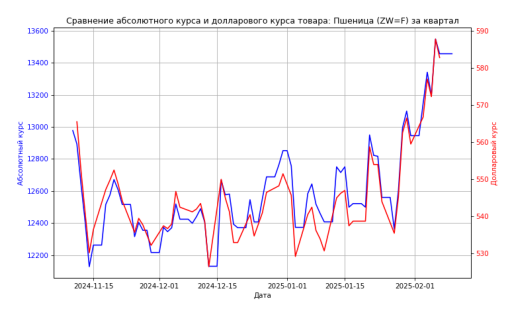

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from github_lib_abscur2 import pass_file

# Список для сохранения имен файлов
saved_files = []

# Цикл по всем товарам
for ticker, commodity_name in commodity_tickers.items():
    # Извлечение абсолютных и долларовых курсов для выбранного товара
    absolute_prices = absolute_commodity_prices[ticker]
    dollar_prices = combined_commodity_dollar_prices[ticker]

    # Создание графиков для каждого временного диапазона
    for period_name, start_date in ago_dates.items():
        # Фильтрация данных по дате
        filtered_absolute_prices = absolute_prices[absolute_prices.index >= start_date]
        filtered_dollar_prices = dollar_prices[dollar_prices.index >= start_date]

        # Проверка наличия данных для данного периода
        if not filtered_absolute_prices.empty and not filtered_dollar_prices.empty:
            # Создание графика
            fig, ax1 = plt.subplots(figsize=(10, 6))

            # График абсолютного курса
            ax1.plot(filtered_absolute_prices.index, filtered_absolute_prices.values, linestyle='-', color='b', label='Абсолютный курс')
            ax1.set_xlabel('Дата')
            ax1.set_ylabel('Абсолютный курс', color='b')
            ax1.tick_params(axis='y', labelcolor='b')
            ax1.grid()

            # Создание второй оси Y для долларового курса
            ax2 = ax1.twinx()  
            ax2.plot(filtered_dollar_prices.index, filtered_dollar_prices.values, linestyle='-', color='r', label='Долларовый курс')
            ax2.set_ylabel('Долларовый курс', color='r')
            ax2.tick_params(axis='y', labelcolor='r')

            # Заголовок графика с именем товара и временным диапазоном
            plt.title(f'Сравнение абсолютного курса и долларового курса товара: {commodity_name} ({ticker}) за {period_name}')
            plt.xticks(rotation=45)
            plt.tight_layout()

            # Формирование имени файла
            suffix = period_suffix[period_name]
            filename = f"{ticker}_{suffix}_commodity.png"
            
            # Сохранение графика на диск
            plt.savefig(filename,dpi=75)
            
            # Добавление имени файла в список сохраненных файлов
            saved_files.append(filename)

            # Публикуем график
            pass_file(filename)

            # Закрытие фигуры после сохранения
            plt.close(fig)

# Выбор случайного файла из сохраненных и вывод изображения
if saved_files:
    random_file = random.choice(saved_files)
    
    # Отображение случайно выбранного изображения
    img = plt.imread(random_file)
    plt.imshow(img)
    plt.axis('off')  # Убираем оси для чистоты отображения
    plt.show()
else:
    print("Не было сохранено ни одного файла.")


In [36]:
import json
from github_lib_abscur2 import pass_file

# Генерация JavaScript-кода для вывода ссылок на товары и графиков
js_code = f"""
// Список возможных тикеров и их названий
const commodityTickers = {json.dumps(commodity_tickers)};

// Функция для получения параметра из URL
function getURLParameter(param) {{
    const params = new URLSearchParams(window.location.search);
    return params.get(param);
}}

// Получение текущего тикера товара из параметров
let selectedTicker = getURLParameter('tovar');

// Проверка наличия тикера в списке возможных товаров
if (!(selectedTicker in commodityTickers)) {{
    // Если тикер не найден, выбираем случайный тикер
    const tickers = Object.keys(commodityTickers);
    selectedTicker = tickers[Math.floor(Math.random() * tickers.length)];
}}

// Функция для отображения ссылок на товары
function displayCommodityLinks() {{
    const linksContainer = document.getElementById('commodity-links');
    let linksHTML = '';

    for (const [ticker, name] of Object.entries(commodityTickers)) {{
        if (ticker === selectedTicker) {{
            linksHTML += `<strong style="background-color: yellow;">${{name}}</strong> `;  // Текущий товар без ссылки
        }} else {{
            linksHTML += `<a href="?tovar=${{ticker}}">${{name}}</a> `;  // Ссылка на товар
        }}
    }}

    linksContainer.innerHTML = linksHTML;
}}

// Функция для отображения графиков товара
function displayCommodityGraphs() {{
    const graphsContainer = document.getElementById('graphs-container');
    
    // Список временных диапазонов и соответствующих суффиксов
    const periodSuffix = {json.dumps(period_suffix)};
    
    for (const [period, suffix] of Object.entries(periodSuffix)) {{
        const imgElement = document.createElement('img');
        imgElement.src = `https://prog815.github.io/abscur2/contents/${{selectedTicker}}_${{suffix}}_commodity.png`;
        imgElement.alt = `График за ${{period}} для ${{selectedTicker}}`;
        imgElement.style.width = '100%';  // Устанавливаем ширину изображения
        graphsContainer.appendChild(imgElement);
    }}
}}

// Вызов функций для отображения ссылок и графиков
displayCommodityLinks();
displayCommodityGraphs();
"""

# Сохранение JavaScript-кода в файл с упоминанием графиков товаров
output_js_file_path = 'display_commodity_graphs_links.js'
with open(output_js_file_path, 'w') as js_file:
    js_file.write(js_code)

print(f"JavaScript файл сохранен в {output_js_file_path}")

# Публикуем график
pass_file(output_js_file_path, is_image=False)


JavaScript файл сохранен в display_commodity_graphs_links.js
Файл "display_commodity_graphs_links.js" успешно обновлён!


## Рейтинг роста и падения товаров

В данном разделе представлены визуализации, отображающие изменения цен на товары в различных временных интервалах. Диаграммы иллюстрируют динамику абсолютных и долларовых цен, что позволяет анализировать тренды и колебания на рынке товаров. Каждая диаграмма соответствует определённому временно́му периоду, таким как один месяц, три месяца, шесть месяцев, один год и два года.

Диаграммы сортируются по возрастанию абсолютного изменения цен на товары. В правой части каждой диаграммы расположены товары, которые демонстрируют наибольший рост в цене. Это упрощает идентификацию лидеров роста и позволяет более эффективно анализировать рыночные тенденции.

См. на сайте [https://www.abscur.ru/p/blog-page_84.html](https://www.abscur.ru/p/blog-page_84.html)

Файл "1m_commodity_up_down.png" успешно обновлён!
Файл "1q_commodity_up_down.png" успешно обновлён!
Выводим график для периода: квартал


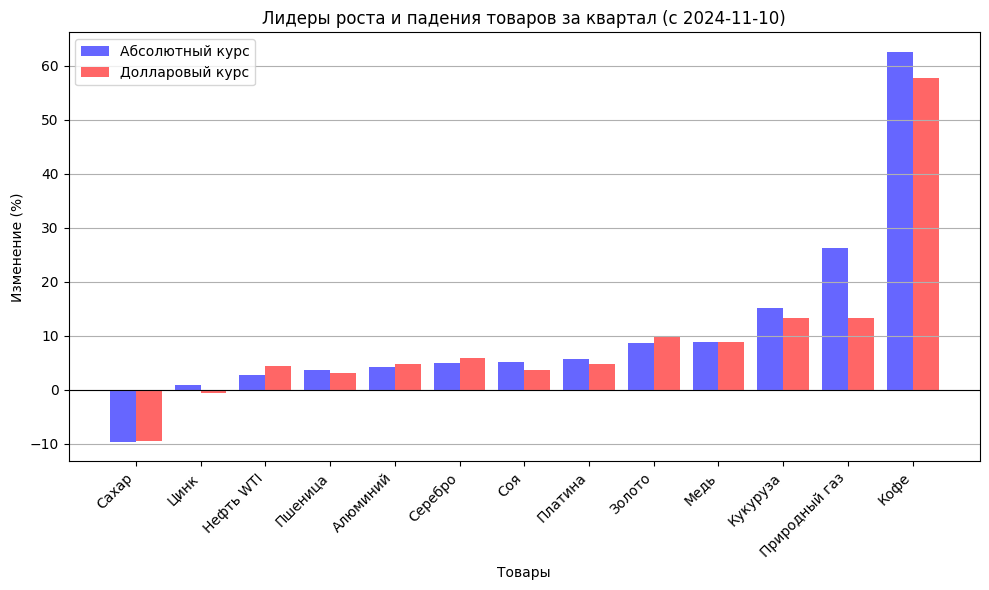

Файл "1y_commodity_up_down.png" успешно обновлён!
Файл "3y_commodity_up_down.png" успешно обновлён!
Файл "5y_commodity_up_down.png" успешно обновлён!
Файл "10y_commodity_up_down.png" успешно обновлён!
{'месяц': [{'Ticker': 'KC=F', 'Commodity Name': 'Кофе', 'Absolute Change (%)': 23.33800160096411}, {'Ticker': 'ZW=F', 'Commodity Name': 'Пшеница', 'Absolute Change (%)': 8.46150899617425}, {'Ticker': 'HG=F', 'Commodity Name': 'Медь', 'Absolute Change (%)': 5.878004724668174}, {'Ticker': 'GC=F', 'Commodity Name': 'Золото', 'Absolute Change (%)': 4.57494990014853}, {'Ticker': 'SI=F', 'Commodity Name': 'Серебро', 'Absolute Change (%)': 2.7357346300055223}], 'квартал': [{'Ticker': 'KC=F', 'Commodity Name': 'Кофе', 'Absolute Change (%)': 62.58612428171681}, {'Ticker': 'NG=F', 'Commodity Name': 'Природный газ', 'Absolute Change (%)': 26.29761619686559}, {'Ticker': 'ZC=F', 'Commodity Name': 'Кукуруза', 'Absolute Change (%)': 15.224357052724482}, {'Ticker': 'HG=F', 'Commodity Name': 'Медь', 'Abso

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Создание словаря для хранения данных о росте товаров по временным диапазонам
top_commodities_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_absolute_prices = absolute_commodity_prices[absolute_commodity_prices.index >= start_date]
    filtered_dollar_prices = combined_commodity_dollar_prices[combined_commodity_dollar_prices.index >= start_date]

    # Создание списка для хранения изменений
    changes = []

    # Пробегаемся по всем тикерам в словаре commodity_tickers
    for ticker in commodity_tickers.keys():
        # Получаем первую и последнюю цену для абсолютного курса
        first_absolute_price = filtered_absolute_prices[ticker].iloc[0]
        last_absolute_price = filtered_absolute_prices[ticker].iloc[-1]

        # Получаем первую и последнюю цену для долларового курса
        first_dollar_price = filtered_dollar_prices[ticker].iloc[0]
        last_dollar_price = filtered_dollar_prices[ticker].iloc[-1]

        # Вычисление относительного изменения в процентах
        absolute_change_percent = ((last_absolute_price - first_absolute_price) / first_absolute_price) * 100
        dollar_change_percent = ((last_dollar_price - first_dollar_price) / first_dollar_price) * 100

        # Добавляем результаты в список
        changes.append({
            'Ticker': ticker,
            'Commodity Name': commodity_tickers[ticker],  # Получаем имя товара из существующего словаря
            'Absolute Change (%)': absolute_change_percent,
            'Dollar Change (%)': dollar_change_percent
        })

    # Создание DataFrame из списка изменений
    changes_df = pd.DataFrame(changes)

    # Сортировка по убыванию абсолютного изменения, чтобы получить топ товаров по росту
    changes_df_sorted = changes_df.sort_values(by='Absolute Change (%)', ascending=False)

    # Сохраняем данные о топ-5 товарах в словарь по текущему периоду имени (только те, что показали наибольший рост)
    top_commodities_by_period[period_name] = changes_df_sorted.head(5)[['Ticker', 'Commodity Name', 'Absolute Change (%)']].to_dict(orient='records')

    # Повторная сортировка по возрастанию перед выводом на диаграмму
    changes_df_sorted = changes_df_sorted.sort_values(by='Absolute Change (%)')

    # Установка ширины столбцов и смещения для группировки
    bar_width = 0.4
    index = np.arange(len(changes_df_sorted))

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для абсолютного изменения
    plt.bar(index, changes_df_sorted['Absolute Change (%)'], bar_width, label='Абсолютный курс', color='blue', alpha=0.6)

    # Столбцы для долларового изменения, с смещением вправо
    plt.bar(index + bar_width, changes_df_sorted['Dollar Change (%)'], bar_width, label='Долларовый курс', color='red', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Лидеры роста и падения товаров за {period_name} (с {formatted_start_date})')
    plt.xlabel('Товары')
    plt.ylabel('Изменение (%)')
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для группированных столбцов
    plt.xticks(index + bar_width / 2, changes_df_sorted['Commodity Name'], rotation=45, ha='right')

    plt.legend()
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f"{suffix}_commodity_up_down.png"
    
    # Сохранение графика на диск
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь top_commodities_by_period содержит данные о росте товаров для использования при генерации JS-файла.
print(top_commodities_by_period)


In [38]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"{suffix}_commodity_up_down.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм товаров
document.addEventListener("DOMContentLoaded", function() {
    const container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг роста товаров за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка товаров с наибольшим ростом из словаря top_commodities_by_period
    top_commodities = top_commodities_by_period.get(period_name, [])

    # Фильтрация товаров с положительным ростом
    positive_growth_commodities = [commodity for commodity in top_commodities if commodity['Absolute Change (%)'] > 0]

    # Добавление списка товаров с наибольшим ростом
    js_code += '    var commodityList = document.createElement("p");\n'
    js_code += '    commodityList.innerHTML = "Топ товары по росту: "; \n'
    
    for index, commodity in enumerate(positive_growth_commodities):
        growth_percentage = f"{commodity['Absolute Change (%)']:.2f}"  # Форматирование процента до двух знаков после запятой
        if index < len(positive_growth_commodities) - 1:
            js_code += f'    commodityList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar={commodity["Ticker"]}">{commodity["Commodity Name"]} ({commodity["Ticker"]})</a> - {growth_percentage}%, `;\n'
        else:
            js_code += f'    commodityList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar={commodity["Ticker"]}">{commodity["Commodity Name"]} ({commodity["Ticker"]})</a> - {growth_percentage}%  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    commodityList.innerHTML = commodityList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(commodityList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("commodity_up_down.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл commodity_up_down.js успешно создан.")

# Публикуем файл
pass_file("commodity_up_down.js", is_image=False)


JavaScript файл commodity_up_down.js успешно создан.
Файл "commodity_up_down.js" успешно обновлён!


## Рейтинг доходности среди товаров

В данном разделе представлены визуализации, отображающие среднюю доходность товаров за различные временные интервалы. Графики иллюстрируют, как изменялась доходность по абсолютным и долларовым курсам, что позволяет глубже анализировать рыночные тренды и оценивать инвестиционные возможности.

Каждая диаграмма соответствует определённому временно́му периоду, включая диапазоны от одного месяца до десяти лет. Графики сортируются по средней доходности абсолютного курса, что позволяет легко идентифицировать товары с наибольшей доходностью. В правой части диаграмм расположены товары, демонстрирующие наивысшие показатели средней доходности.

См. на сайте [https://www.abscur.ru/p/blog-page_35.html](https://www.abscur.ru/p/blog-page_35.html)

Файл "1m_commodity_average_returns.png" успешно обновлён!
Выводим график для периода: месяц


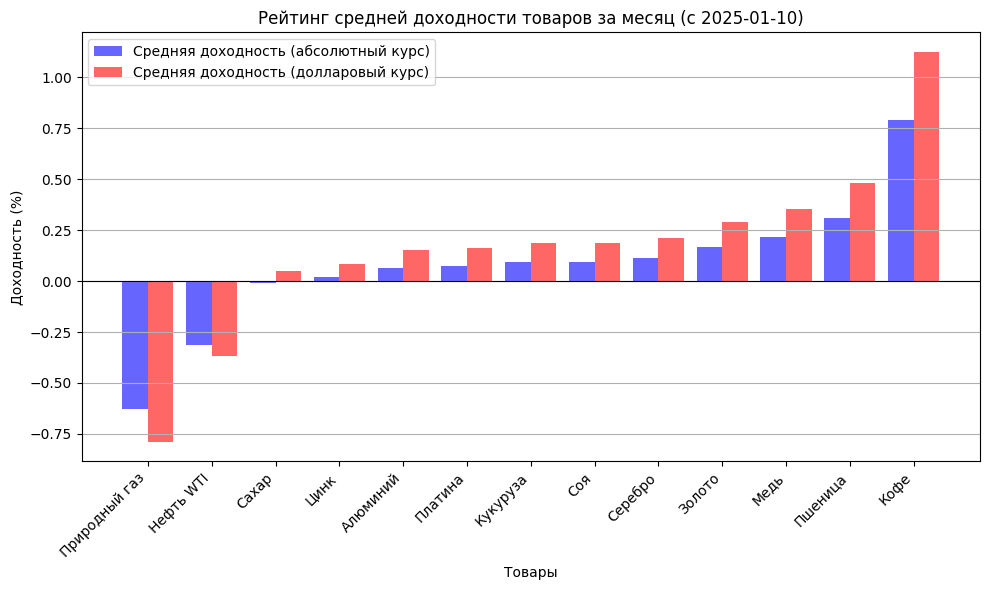

Файл "1q_commodity_average_returns.png" успешно обновлён!
Файл "1y_commodity_average_returns.png" успешно обновлён!
Файл "3y_commodity_average_returns.png" успешно обновлён!
Файл "5y_commodity_average_returns.png" успешно обновлён!
Файл "10y_commodity_average_returns.png" успешно обновлён!
{'месяц': [{'Ticker': 'KC=F', 'Commodity Name': 'Кофе', 'Average Absolute Return (%)': 0.7887211741701224}, {'Ticker': 'ZW=F', 'Commodity Name': 'Пшеница', 'Average Absolute Return (%)': 0.312011099905535}, {'Ticker': 'HG=F', 'Commodity Name': 'Медь', 'Average Absolute Return (%)': 0.2172997357322439}, {'Ticker': 'GC=F', 'Commodity Name': 'Золото', 'Average Absolute Return (%)': 0.16861043827573619}, {'Ticker': 'SI=F', 'Commodity Name': 'Серебро', 'Average Absolute Return (%)': 0.11217331311225648}], 'квартал': [{'Ticker': 'KC=F', 'Commodity Name': 'Кофе', 'Average Absolute Return (%)': 0.6270041894797783}, {'Ticker': 'NG=F', 'Commodity Name': 'Природный газ', 'Average Absolute Return (%)': 0.4061701

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Создание словаря для хранения данных о доходности товаров по временным диапазонам
top_commodities_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_absolute_prices = absolute_commodity_prices[absolute_commodity_prices.index >= start_date]
    filtered_dollar_prices = combined_commodity_dollar_prices[combined_commodity_dollar_prices.index >= start_date]

    # Создание списка для хранения изменений
    changes = []

    # Пробегаемся по всем тикерам в словаре commodity_tickers
    for ticker in commodity_tickers.keys():
        # Рассчитываем ежедневные относительные изменения для абсолютного курса
        daily_absolute_returns = filtered_absolute_prices[ticker].pct_change().dropna()
        average_absolute_return = daily_absolute_returns.mean() * 100  # Средняя доходность в процентах

        # Рассчитываем ежедневные относительные изменения для долларового курса
        daily_dollar_returns = filtered_dollar_prices[ticker].pct_change().dropna()
        average_dollar_return = daily_dollar_returns.mean() * 100  # Средняя доходность в процентах

        # Добавляем результаты в список
        changes.append({
            'Ticker': ticker,
            'Commodity Name': commodity_tickers[ticker],  # Получаем имя товара из существующего словаря
            'Average Absolute Return (%)': average_absolute_return,
            'Average Dollar Return (%)': average_dollar_return
        })

    # Создание DataFrame из списка изменений
    changes_df = pd.DataFrame(changes)

    # Сортировка по убыванию средней доходности абсолютного курса, чтобы получить топ товаров по доходности
    changes_df_sorted = changes_df.sort_values(by='Average Absolute Return (%)', ascending=False)

    # Сохраняем данные о топ-5 товарах в словарь по текущему периоду имени (только те, что показали наибольшую доходность)
    top_commodities_by_period[period_name] = changes_df_sorted.head(5)[['Ticker', 'Commodity Name', 'Average Absolute Return (%)']].to_dict(orient='records')

    # Повторная сортировка по возрастанию перед выводом на диаграмму
    changes_df_sorted = changes_df_sorted.sort_values(by='Average Absolute Return (%)')

    # Установка ширины столбцов и смещения для группировки
    bar_width = 0.4
    index = np.arange(len(changes_df_sorted))

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для средней доходности по абсолютному курсу
    plt.bar(index, changes_df_sorted['Average Absolute Return (%)'], bar_width, label='Средняя доходность (абсолютный курс)', color='blue', alpha=0.6)

    # Столбцы для средней доходности по долларового курса, с смещением вправо
    plt.bar(index + bar_width, changes_df_sorted['Average Dollar Return (%)'], bar_width, label='Средняя доходность (долларовый курс)', color='red', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Рейтинг средней доходности товаров за {period_name} (с {formatted_start_date})')
    plt.xlabel('Товары')
    plt.ylabel('Доходность (%)')
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для группированных столбцов
    plt.xticks(index + bar_width / 2, changes_df_sorted['Commodity Name'], rotation=45, ha='right')

    plt.legend()
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск с упоминанием о товарах
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f"{suffix}_commodity_average_returns.png"  # Изменено имя файла
    
    # Сохранение графика на диск
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь top_commodities_by_period содержит данные о доходности товаров для использования при генерации JS-файла.
print(top_commodities_by_period)


In [40]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"{suffix}_commodity_average_returns.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм средней доходности товаров
document.addEventListener("DOMContentLoaded", function() {
    const container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг средней доходности товаров за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка товаров с наибольшей доходностью из словаря top_commodities_by_period
    top_commodities = top_commodities_by_period.get(period_name, [])

    # Добавление списка товаров с наибольшей доходностью
    js_code += '    var commodityList = document.createElement("p");\n'
    js_code += '    commodityList.innerHTML = "Топ товары по доходности: "; \n'
    
    for index, commodity in enumerate(top_commodities):
        average_return_percentage = f"{commodity['Average Absolute Return (%)']:.2f}"  # Форматирование процента до двух знаков после запятой
        js_code += f'    commodityList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar={commodity["Ticker"]}">{commodity["Commodity Name"]} ({commodity["Ticker"]})</a> - {average_return_percentage}%, `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    commodityList.innerHTML = commodityList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(commodityList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("commodity_average_returns.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл commodity_average_returns.js успешно создан.")

# Публикуем файл
pass_file("commodity_average_returns.js", is_image=False)


JavaScript файл commodity_average_returns.js успешно создан.
Файл "commodity_average_returns.js" успешно обновлён!


## Рейтинг волатильности товаров

В данном разделе представлены графики, отображающие волатильность товаров, которая является ключевым показателем риска в инвестициях. Волатильность измеряет степень колебаний цен на активы за определённый период времени и позволяет инвесторам оценить стабильность и предсказуемость доходности.

Графики сортируются по убыванию волатильности, что позволяет легко идентифицировать товары с наименьшими колебаниями цен. В правой части диаграмм расположены самые низковолатильные товары, что делает их более привлекательными для консервативных инвесторов, стремящихся минимизировать риски.

Каждая диаграмма соответствует определённому временно́му периоду, включая диапазоны от одного месяца до десяти лет. Раздел предоставляет информацию о том, какие товары демонстрируют наименьшую волатильность и могут быть рассмотрены как более стабильные варианты для инвестирования. Этот раздел служит полезным инструментом для анализа рынка и принятия обоснованных решений в области торговли и инвестиций.

См. на сайте [https://www.abscur.ru/p/blog-page_21.html](https://www.abscur.ru/p/blog-page_21.html)

Файл "1m_commodity_volatility.png" успешно обновлён!
Файл "1q_commodity_volatility.png" успешно обновлён!
Выводим график для периода: квартал


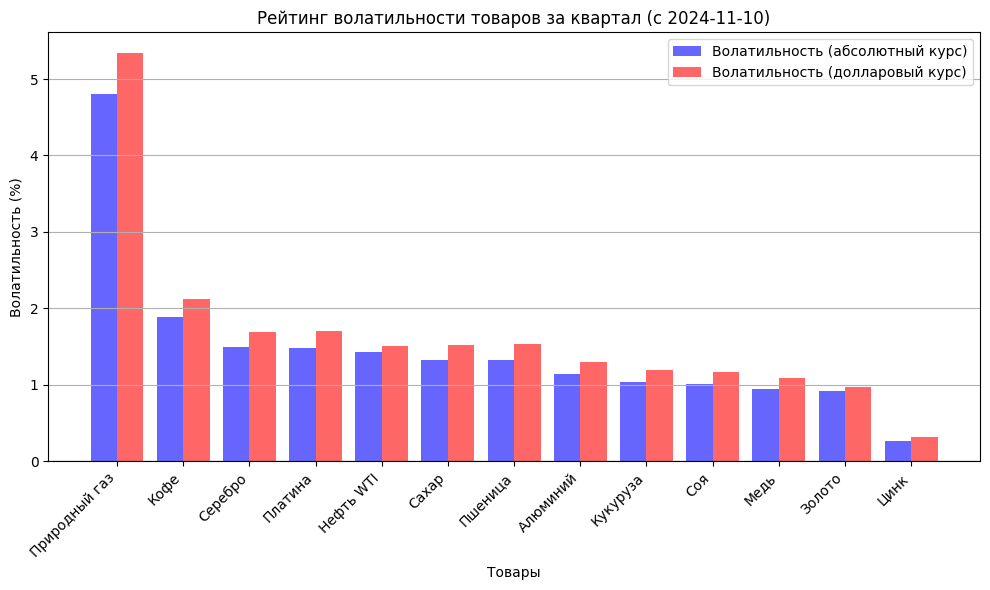

Файл "1y_commodity_volatility.png" успешно обновлён!
Файл "3y_commodity_volatility.png" успешно обновлён!
Файл "5y_commodity_volatility.png" успешно обновлён!
Файл "10y_commodity_volatility.png" успешно обновлён!
{'месяц': [{'Ticker': 'ZN=F', 'Commodity Name': 'Цинк', 'Volatility Absolute (%)': 0.2960188008600127, 'Volatility Dollar (%)': 0.3171916255068462}, {'Ticker': 'GC=F', 'Commodity Name': 'Золото', 'Volatility Absolute (%)': 0.7626419933278155, 'Volatility Dollar (%)': 0.8560406945489768}, {'Ticker': 'ALI=F', 'Commodity Name': 'Алюминий', 'Volatility Absolute (%)': 0.9889082638654878, 'Volatility Dollar (%)': 1.1406663994838078}, {'Ticker': 'HG=F', 'Commodity Name': 'Медь', 'Volatility Absolute (%)': 1.073088069546542, 'Volatility Dollar (%)': 1.2140826337410169}, {'Ticker': 'ZC=F', 'Commodity Name': 'Кукуруза', 'Volatility Absolute (%)': 1.0890611135190988, 'Volatility Dollar (%)': 1.2422493010714228}], 'квартал': [{'Ticker': 'ZN=F', 'Commodity Name': 'Цинк', 'Volatility Absolu

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Создание словаря для хранения данных о волатильности товаров по временным диапазонам
volatility_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_absolute_prices = absolute_commodity_prices[absolute_commodity_prices.index >= start_date]
    filtered_dollar_prices = combined_commodity_dollar_prices[combined_commodity_dollar_prices.index >= start_date]

    # Создание списка для хранения волатильности
    volatility_data = []

    # Пробегаемся по всем тикерам в словаре commodity_tickers
    for ticker in commodity_tickers.keys():
        # Получаем цены за выбранный период для абсолютного и долларового курсов
        period_absolute_prices = filtered_absolute_prices[ticker]
        period_dollar_prices = filtered_dollar_prices[ticker]

        # Вычисление волатильности для абсолютного курса
        if len(period_absolute_prices) > 1:
            absolute_returns = period_absolute_prices.pct_change().dropna()  # Вычисляем процентные изменения
            volatility_absolute = absolute_returns.std() * 100  # Волатильность в процентах
        else:
            volatility_absolute = 0  # Если данных недостаточно, устанавливаем 0

        # Вычисление волатильности для долларового курса
        if len(period_dollar_prices) > 1:
            dollar_returns = period_dollar_prices.pct_change().dropna()  # Вычисляем процентные изменения
            volatility_dollar = dollar_returns.std() * 100  # Волатильность в процентах
        else:
            volatility_dollar = 0  # Если данных недостаточно, устанавливаем 0

        # Добавляем результаты в список
        volatility_data.append({
            'Ticker': ticker,
            'Commodity Name': commodity_tickers[ticker],  # Получаем имя товара из существующего словаря
            'Volatility Absolute (%)': volatility_absolute,
            'Volatility Dollar (%)': volatility_dollar
        })

    # Создание DataFrame из списка волатильности
    volatility_df = pd.DataFrame(volatility_data)

    # Сортировка по возрастанию абсолютной волатильности, чтобы получить топ товаров с минимальной волатильностью
    volatility_sorted = volatility_df.sort_values(by='Volatility Absolute (%)')

    # Сохраняем данные о топ-5 товарах в словарь по текущему периоду имени (только те, что показали наименьшую волатильность)
    volatility_by_period[period_name] = volatility_sorted.head(5)[['Ticker', 'Commodity Name', 'Volatility Absolute (%)', 'Volatility Dollar (%)']].to_dict(orient='records')

    # Повторная сортировка по убыванию абсолютной волатильности перед выводом на диаграмму
    volatility_sorted = volatility_sorted.sort_values(by='Volatility Absolute (%)', ascending=False)

    # Установка ширины столбцов и смещения для группировки
    bar_width = 0.4
    index = np.arange(len(volatility_sorted))

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для абсолютной волатильности
    plt.bar(index, volatility_sorted['Volatility Absolute (%)'], bar_width, label='Волатильность (абсолютный курс)', color='blue', alpha=0.6)

    # Столбцы для рублевой волатильности, с смещением вправо
    plt.bar(index + bar_width, volatility_sorted['Volatility Dollar (%)'], bar_width, label='Волатильность (долларовый курс)', color='red', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Рейтинг волатильности товаров за {period_name} (с {formatted_start_date})')
    plt.xlabel('Товары')
    plt.ylabel('Волатильность (%)')
    
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для группированных столбцов
    plt.xticks(index + bar_width / 2, volatility_sorted['Commodity Name'], rotation=45, ha='right')

    plt.legend()
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск с упоминанием о товарах
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f"{suffix}_commodity_volatility.png"  # Изменено имя файла
    
    # Сохранение графика на диск
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь volatility_by_period содержит данные о волатильности товаров для использования при генерации JS-файла.
print(volatility_by_period)


In [42]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"{suffix}_commodity_volatility.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм волатильности товаров
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг волатильности товаров за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка товаров с наименьшей волатильностью из словаря volatility_by_period
    volatility_data = volatility_by_period.get(period_name, [])

    # Добавление списка товаров с наименьшей волатильностью
    js_code += '    var productList = document.createElement("p");\n'
    js_code += '    productList.innerHTML = "Топ товары по волатильности: "; \n'
    
    for index, product in enumerate(volatility_data):
        volatility_percentage = f"{product['Volatility Absolute (%)']:.2f}"  # Форматирование процента до двух знаков после запятой
        
        if index < len(volatility_data) - 1:
            js_code += f'    productList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar={product["Ticker"]}">{product["Commodity Name"]} ({product["Ticker"]})</a> - {volatility_percentage}%, `;\n'
        else:
            js_code += f'    productList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar={product["Ticker"]}">{product["Commodity Name"]} ({product["Ticker"]})</a> - {volatility_percentage}%  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    productList.innerHTML = productList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(productList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("commodity_volatility.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл commodity_volatility.js успешно создан.")

# Публикуем график
pass_file("commodity_volatility.js", is_image=False)


JavaScript файл commodity_volatility.js успешно создан.
Файл "commodity_volatility.js" успешно обновлён!


## Рейтинг по Шарпу товаров

В данном разделе представлены графики, отображающие рейтинг товаров по коэффициенту Шарпа, который является важным показателем эффективности инвестиций. Коэффициент Шарпа позволяет оценить доходность инвестиционного портфеля в отношении его риска, что делает его незаменимым инструментом для инвесторов.

Коэффициент рассчитывается как отношение избыточной доходности к стандартному отклонению доходности. Это позволяет выявить, насколько хорошо портфель компенсирует риск: чем выше значение коэффициента, тем более привлекательной считается инвестиция. Графики сортируются по возрастанию коэффициента Шарпа, что позволяет легко идентифицировать товары с наименьшим риском и лучшими показателями доходности. В правой части диаграмм расположены самые привлекательные для инвестирования товары, что упрощает их выбор.

Каждая диаграмма соответствует определённому временно́му периоду и предоставляет информацию о том, какие товары обеспечивают наилучшие результаты при минимальных рисках. Раздел служит полезным инструментом для анализа и выбора оптимальных инвестиционных стратегий на основе соотношения риска и доходности.

См. на сайте [https://www.abscur.ru/p/blog-page_74.html](https://www.abscur.ru/p/blog-page_74.html)

Файл "1m_commodity_sharpe_ratios.png" успешно обновлён!
Файл "1q_commodity_sharpe_ratios.png" успешно обновлён!
Выводим график для периода: квартал


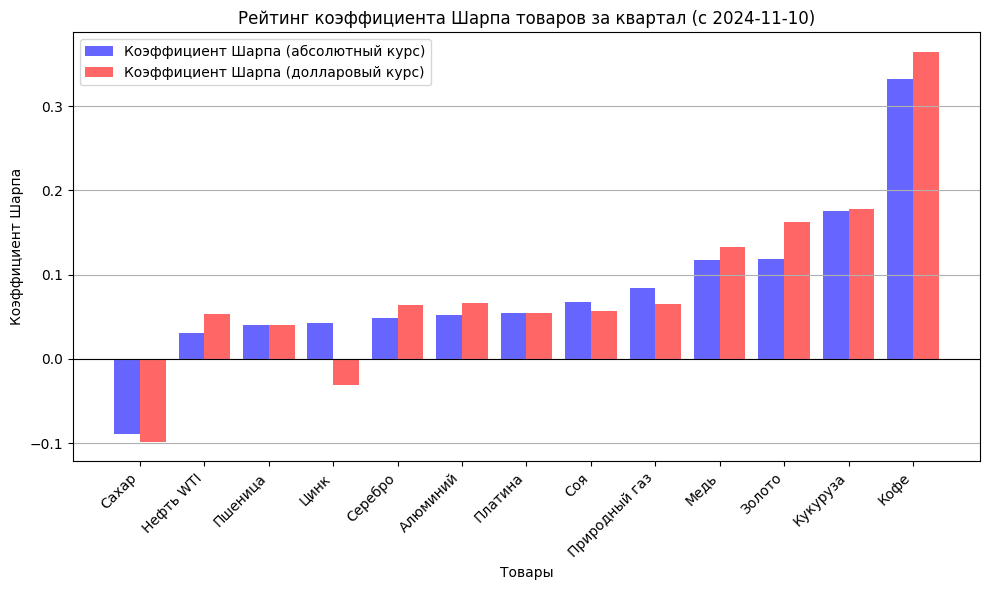

Файл "1y_commodity_sharpe_ratios.png" успешно обновлён!
Файл "3y_commodity_sharpe_ratios.png" успешно обновлён!
Файл "5y_commodity_sharpe_ratios.png" успешно обновлён!
Файл "10y_commodity_sharpe_ratios.png" успешно обновлён!
{'месяц': [{'Ticker': 'KC=F', 'Commodity Name': 'Кофе', 'Sharpe Ratio Absolute': 0.5788832425741878, 'Sharpe Ratio Dollar': 0.7822342341249426}, {'Ticker': 'GC=F', 'Commodity Name': 'Золото', 'Sharpe Ratio Absolute': 0.22108727260086813, 'Sharpe Ratio Dollar': 0.33732246110292635}, {'Ticker': 'ZW=F', 'Commodity Name': 'Пшеница', 'Sharpe Ratio Absolute': 0.20813717457881176, 'Sharpe Ratio Dollar': 0.28344984840418314}, {'Ticker': 'HG=F', 'Commodity Name': 'Медь', 'Sharpe Ratio Absolute': 0.202499442402774, 'Sharpe Ratio Dollar': 0.2918979906899562}, {'Ticker': 'ZC=F', 'Commodity Name': 'Кукуруза', 'Sharpe Ratio Absolute': 0.08433955514558619, 'Sharpe Ratio Dollar': 0.14887692781163456}], 'квартал': [{'Ticker': 'KC=F', 'Commodity Name': 'Кофе', 'Sharpe Ratio Absolute

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Создание словаря для хранения данных о коэффициенте Шарпа товаров по временным диапазонам
sharpe_ratios_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_absolute_prices = absolute_commodity_prices[absolute_commodity_prices.index >= start_date]
    filtered_dollar_prices = combined_commodity_dollar_prices[combined_commodity_dollar_prices.index >= start_date]

    # Создание списка для хранения коэффициентов Шарпа
    sharpe_ratios = []

    # Пробегаемся по всем тикерам в словаре commodity_tickers
    for ticker in commodity_tickers.keys():
        # Рассчитываем ежедневные относительные изменения для абсолютного курса
        daily_absolute_returns = filtered_absolute_prices[ticker].pct_change().dropna()
        average_absolute_return = daily_absolute_returns.mean() * 100  # Средняя доходность в процентах
        volatility_absolute = daily_absolute_returns.std() * 100  # Стандартное отклонение в процентах

        # Рассчитываем ежедневные относительные изменения для долларового курса
        daily_dollar_returns = filtered_dollar_prices[ticker].pct_change().dropna()
        average_dollar_return = daily_dollar_returns.mean() * 100  # Средняя доходность в процентах
        volatility_dollar = daily_dollar_returns.std() * 100  # Стандартное отклонение в процентах

        # Рассчитываем коэффициент Шарпа (предполагаем, что безрисковая ставка равна 0)
        sharpe_ratio_absolute = average_absolute_return / volatility_absolute if volatility_absolute != 0 else 0
        sharpe_ratio_dollar = average_dollar_return / volatility_dollar if volatility_dollar != 0 else 0

        # Добавляем результаты в список
        sharpe_ratios.append({
            'Ticker': ticker,
            'Commodity Name': commodity_tickers[ticker],  # Получаем имя товара из существующего словаря
            'Sharpe Ratio Absolute': sharpe_ratio_absolute,
            'Sharpe Ratio Dollar': sharpe_ratio_dollar
        })

    # Создание DataFrame из списка коэффициентов Шарпа
    sharpe_df = pd.DataFrame(sharpe_ratios)

    # Сортировка по убыванию коэффициента Шарпа (абсолютный курс), чтобы получить топ товаров по этому показателю
    sharpe_df_sorted = sharpe_df.sort_values(by='Sharpe Ratio Absolute', ascending=False)

    # Сохраняем данные о топ-5 товарах в словарь по текущему период имени (только те, что показали наибольший коэффициент Шарпа)
    sharpe_ratios_by_period[period_name] = sharpe_df_sorted.head(5)[['Ticker', 'Commodity Name', 'Sharpe Ratio Absolute', 'Sharpe Ratio Dollar']].to_dict(orient='records')

    # Повторная сортировка по возрастанию перед выводом на диаграмму (для визуализации)
    sharpe_df_sorted = sharpe_df_sorted.sort_values(by='Sharpe Ratio Absolute')

    # Установка ширины столбцов и смещения для группировки
    bar_width = 0.4
    index = np.arange(len(sharpe_df_sorted))

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для коэффициента Шарпа (абсолютный курс)
    plt.bar(index, sharpe_df_sorted['Sharpe Ratio Absolute'], bar_width, label='Коэффициент Шарпа (абсолютный курс)', color='blue', alpha=0.6)

    # Столбцы для коэффициента Шарпа (долларовый курс), с смещением вправо
    plt.bar(index + bar_width, sharpe_df_sorted['Sharpe Ratio Dollar'], bar_width, label='Коэффициент Шарпа (долларовый курс)', color='red', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Рейтинг коэффициента Шарпа товаров за {period_name} (с {formatted_start_date})')
    plt.xlabel('Товары')
    plt.ylabel('Коэффициент Шарпа')

    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для группированных столбцов
    plt.xticks(index + bar_width / 2, sharpe_df_sorted['Commodity Name'], rotation=45, ha='right')

    plt.legend()
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск с упоминанием о товарах
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f"{suffix}_commodity_sharpe_ratios.png"  # Имя файла
    
    # Сохранение графика на диск
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь sharpe_ratios_by_period содержит данные о коэффициентах Шарпа товаров для использования.
print(sharpe_ratios_by_period)


In [44]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"{suffix}_commodity_sharpe_ratios.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм коэффициента Шарпа товаров
document.addEventListener("DOMContentLoaded", function() {
    const container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг коэффициента Шарпа товаров за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка товаров с положительным коэффициентом Шарпа из словаря sharpe_ratios_by_period
    sharpe_ratios = sharpe_ratios_by_period.get(period_name, [])

    # Фильтрация товаров с положительным коэффициентом Шарпа
    positive_sharpe_ratios = [product for product in sharpe_ratios if product['Sharpe Ratio Absolute'] > 0]

    # Добавление списка товаров с положительным коэффициентом Шарпа
    js_code += '    var productList = document.createElement("p");\n'
    js_code += '    productList.innerHTML = "Топ товары по коэффициенту Шарпа: "; \n'
    
    for index, product in enumerate(positive_sharpe_ratios):
        sharpe_ratio_value = f"{product['Sharpe Ratio Absolute']:.2f}"  # Форматирование коэффициента до двух знаков после запятой
        
        if index < len(positive_sharpe_ratios) - 1:
            js_code += f'    productList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar={product["Ticker"]}">{product["Commodity Name"]} ({product["Ticker"]})</a> - {sharpe_ratio_value}, `;\n'
        else:
            js_code += f'    productList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar={product["Ticker"]}">{product["Commodity Name"]} ({product["Ticker"]})</a> - {sharpe_ratio_value}  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    productList.innerHTML = productList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(productList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("commodity_sharpe_ratios.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл commodity_sharpe_ratios.js успешно создан.")

# Публикуем график
pass_file("commodity_sharpe_ratios.js", is_image=False)


JavaScript файл commodity_sharpe_ratios.js успешно создан.
Файл "commodity_sharpe_ratios.js" успешно обновлён!


## Рейтинг по Сортино товаров

В данном разделе представлены графики, отображающие рейтинг товаров по коэффициенту Сортино, который является важным показателем для оценки инвестиционной эффективности с учетом риска. Коэффициент Сортино позволяет инвесторам анализировать доходность активов, учитывая только негативные колебания цен, что делает его более точным инструментом для оценки риска по сравнению с традиционными методами.

Коэффициент рассчитывается как отношение избыточной доходности к стандартному отклонению отрицательных доходностей. Это позволяет определить, насколько хорошо инвестиции компенсируют риск убытков: чем выше значение коэффициента, тем более привлекательной считается инвестиция. Графики сортируются по возрастанию коэффициента Сортино, что упрощает идентификацию товаров с наименьшими рисками и лучшими показателями доходности.

Каждая диаграмма соответствует определённому временно́му периоду и предоставляет информацию о том, какие товары обеспечивают наилучшие результаты при минимальных рисках. Этот раздел служит полезным инструментом для анализа рынка и принятия обоснованных решений в области торговли и инвестиций, позволяя инвесторам выбирать наиболее подходящие активы для своих портфелей.

См. на сайте [https://www.abscur.ru/p/blog-page_78.html](https://www.abscur.ru/p/blog-page_78.html)

Файл "1m_commodity_sortino_ratios.png" успешно обновлён!
Файл "1q_commodity_sortino_ratios.png" успешно обновлён!
Файл "1y_commodity_sortino_ratios.png" успешно обновлён!
Выводим график для периода: год


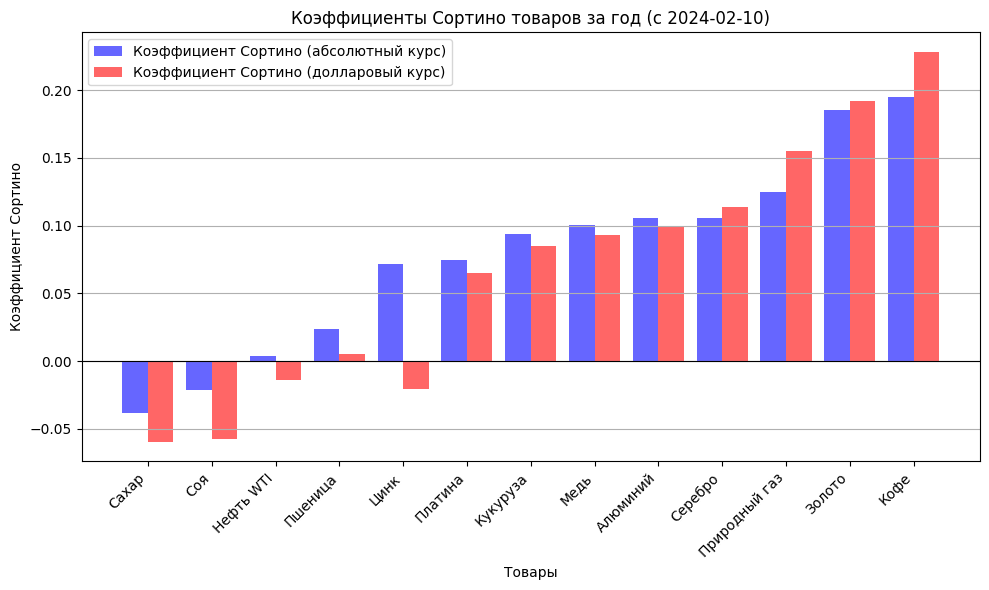

Файл "3y_commodity_sortino_ratios.png" успешно обновлён!
Файл "5y_commodity_sortino_ratios.png" успешно обновлён!
Файл "10y_commodity_sortino_ratios.png" успешно обновлён!
{'месяц': [{'Ticker': 'KC=F', 'Commodity Name': 'Кофе', 'Sortino Ratio Absolute': 1.04530584465705, 'Sortino Ratio Dollar': 2.018910586480814}, {'Ticker': 'ZW=F', 'Commodity Name': 'Пшеница', 'Sortino Ratio Absolute': 0.4390580939288051, 'Sortino Ratio Dollar': 1.1046750617097976}, {'Ticker': 'GC=F', 'Commodity Name': 'Золото', 'Sortino Ratio Absolute': 0.3505248888997641, 'Sortino Ratio Dollar': 0.5430113180426374}, {'Ticker': 'HG=F', 'Commodity Name': 'Медь', 'Sortino Ratio Absolute': 0.2994654227905174, 'Sortino Ratio Dollar': 0.5221413141276544}, {'Ticker': 'ZC=F', 'Commodity Name': 'Кукуруза', 'Sortino Ratio Absolute': 0.213409337318908, 'Sortino Ratio Dollar': 0.3727330565220926}], 'квартал': [{'Ticker': 'KC=F', 'Commodity Name': 'Кофе', 'Sortino Ratio Absolute': 0.39159946660548356, 'Sortino Ratio Dollar': 0.4

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Создание словаря для хранения данных о коэффициенте Сортино товаров по временным диапазонам
sortino_ratios_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_absolute_prices = absolute_commodity_prices[absolute_commodity_prices.index >= start_date]
    filtered_dollar_prices = combined_commodity_dollar_prices[combined_commodity_dollar_prices.index >= start_date]

    # Создание списка для хранения коэффициентов Сортино
    sortino_ratios = []

    # Пробегаемся по всем тикерам в словаре commodity_tickers
    for ticker in commodity_tickers.keys():
        # Рассчитываем ежедневные относительные изменения для абсолютного курса
        daily_absolute_returns = filtered_absolute_prices[ticker].pct_change().dropna()
        average_absolute_return = daily_absolute_returns.mean() * 100  # Средняя доходность в процентах

        # Рассчитываем стандартное отклонение отрицательных доходностей для абсолютного курса
        downside_returns_absolute = daily_absolute_returns[daily_absolute_returns < 0]
        downside_deviation_absolute = downside_returns_absolute.std() * 100 if len(downside_returns_absolute) > 0 else 0  # Стандартное отклонение в процентах

        # Рассчитываем ежедневные относительные изменения для долларового курса
        daily_dollar_returns = filtered_dollar_prices[ticker].pct_change().dropna()
        average_dollar_return = daily_dollar_returns.mean() * 100  # Средняя доходность в процентах

        # Рассчитываем стандартное отклонение отрицательных доходностей для долларового курса
        downside_returns_dollar = daily_dollar_returns[daily_dollar_returns < 0]
        downside_deviation_dollar = downside_returns_dollar.std() * 100 if len(downside_returns_dollar) > 0 else 0  # Стандартное отклонение в процентах

        # Рассчитываем коэффициент Сортино (предполагаем, что безрисковая ставка равна 0)
        sortino_ratio_absolute = average_absolute_return / downside_deviation_absolute if downside_deviation_absolute != 0 else 0
        sortino_ratio_dollar = average_dollar_return / downside_deviation_dollar if downside_deviation_dollar != 0 else 0

        # Добавляем результаты в список
        sortino_ratios.append({
            'Ticker': ticker,
            'Commodity Name': commodity_tickers[ticker],  # Получаем имя товара из существующего словаря
            'Sortino Ratio Absolute': sortino_ratio_absolute,
            'Sortino Ratio Dollar': sortino_ratio_dollar
        })

    # Создание DataFrame из списка коэффициентов Сортино
    sortino_df = pd.DataFrame(sortino_ratios)

    # Сортировка по убыванию коэффициента Сортино (абсолютный курс), чтобы получить топ товаров по этому показателю
    sortino_df_sorted = sortino_df.sort_values(by='Sortino Ratio Absolute', ascending=False)

    # Сохраняем данные о топ-5 товарах в словарь по текущему период имени (только те, что показали наибольший коэффициент Сортино)
    sortino_ratios_by_period[period_name] = sortino_df_sorted.head(5)[['Ticker', 'Commodity Name', 'Sortino Ratio Absolute', 'Sortino Ratio Dollar']].to_dict(orient='records')

    # Повторная сортировка по возрастанию перед выводом на диаграмму (для визуализации)
    sortino_df_sorted = sortino_df_sorted.sort_values(by='Sortino Ratio Absolute')

    # Установка ширины столбцов и смещения для группировки
    bar_width = 0.4
    index = np.arange(len(sortino_df_sorted))

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для коэффициента Сортино (абсолютный курс)
    plt.bar(index, sortino_df_sorted['Sortino Ratio Absolute'], bar_width, label='Коэффициент Сортино (абсолютный курс)', color='blue', alpha=0.6)

    # Столбцы для коэффициента Сортино (долларовый курс), с смещением вправо
    plt.bar(index + bar_width, sortino_df_sorted['Sortino Ratio Dollar'], bar_width, label='Коэффициент Сортино (долларовый курс)', color='red', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Коэффициенты Сортино товаров за {period_name} (с {formatted_start_date})')
    plt.xlabel('Товары')
    plt.ylabel('Коэффициент Сортино')
    
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для группированных столбцов
    plt.xticks(index + bar_width / 2, sortino_df_sorted['Commodity Name'], rotation=45, ha='right')

    plt.legend()
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск с упоминанием о товарах
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f"{suffix}_commodity_sortino_ratios.png"  # Имя файла
    
    # Сохранение графика на диск
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь sortino_ratios_by_period содержит данные о коэффициентах Сортино товаров для использования.
print(sortino_ratios_by_period)


In [46]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"{suffix}_commodity_sortino_ratios.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм коэффициента Сортино товаров
document.addEventListener("DOMContentLoaded", function() {
    const container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг коэффициента Сортино товаров за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка товаров с положительным коэффициентом Сортино из словаря sortino_ratios_by_period
    sortino_ratios = sortino_ratios_by_period.get(period_name, [])

    # Фильтрация товаров с положительным коэффициентом Сортино
    positive_sortino_ratios = [product for product in sortino_ratios if product['Sortino Ratio Absolute'] > 0]

    # Добавление списка товаров с положительным коэффициентом Сортино
    js_code += '    var productList = document.createElement("p");\n'
    js_code += '    productList.innerHTML = "Топ товары по коэффициенту Сортино: "; \n'
    
    for index, product in enumerate(positive_sortino_ratios):
        sortino_ratio_value = f"{product['Sortino Ratio Absolute']:.2f}"  # Форматирование коэффициента до двух знаков после запятой
        
        if index < len(positive_sortino_ratios) - 1:
            js_code += f'    productList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar={product["Ticker"]}">{product["Commodity Name"]} ({product["Ticker"]})</a> - {sortino_ratio_value}, `;\n'
        else:
            js_code += f'    productList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar={product["Ticker"]}">{product["Commodity Name"]} ({product["Ticker"]})</a> - {sortino_ratio_value}  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    productList.innerHTML = productList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(productList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("commodity_sortino_ratios.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл commodity_sortino_ratios.js успешно создан.")

# Публикуем график
pass_file("commodity_sortino_ratios.js", is_image=False)


JavaScript файл commodity_sortino_ratios.js успешно создан.
Файл "commodity_sortino_ratios.js" успешно обновлён!


## Товарный портфель по Шарпу

В данном разделе представлены графики, отображающие рейтинг товарных портфелей по коэффициенту Шарпа, который является важным инструментом для оценки инвестиционной эффективности с учетом риска. Коэффициент Шарпа позволяет инвесторам анализировать доходность активов, учитывая волатильность и риск убытков, что делает его незаменимым для формирования сбалансированных инвестиционных стратегий.

Каждый график в этом разделе иллюстрирует результаты оптимизации товарных портфелей на основе исторических данных, выраженных в абсолютных курсах товаров. Это означает, что все расчеты и визуализации основаны на фактических ценах товаров, что позволяет более точно оценить их поведение на рынке. Для каждого временного диапазона представлены три ключевых графика:

1. График риск-доходность: Этот график показывает соотношение между риском (стандартным отклонением) и средней доходностью различных товарных портфелей. Точки на графике представляют случайно сгенерированные портфели, а выделенная точка указывает на оптимальный портфель с наивысшим коэффициентом Шарпа.

2. График стоимости портфеля: Этот график демонстрирует динамику абсолютной стоимости оптимального товарного портфеля в процентах относительно начальной стоимости. Портфели моделируются по методике "бери и держи", что подразумевает удержание активов в течение всего временного периода без активной торговли. Этот подход позволяет визуализировать, как изменялась стоимость портфеля на протяжении выбранного временного периода.

3. График долей активов в портфеле: Этот столбчатый график показывает распределение долей различных товаров в оптимальном портфеле. Он помогает инвесторам понять, какие товары составляют основу их инвестиционной стратегии и в каких пропорциях они представлены.

Каждая серия графиков сопровождается подзаголовком, который указывает на временной диапазон и дату начала анализа. Этот раздел служит полезным инструментом для анализа рынка и принятия обоснованных решений в области торговли и инвестиций, позволяя инвесторам выбирать наиболее подходящие активы для своих портфелей с учетом риска и доходности.

См. на сайте [https://www.abscur.ru/p/blog-page_40.html](https://www.abscur.ru/p/blog-page_40.html)

Файл "commodity_sharp_risk_return_1m.png" успешно обновлён!
Файл "commodity_sharp_value_1m.png" успешно обновлён!
Файл "commodity_sharp_parts_1m.png" успешно обновлён!
Файл "commodity_sharp_risk_return_1q.png" успешно обновлён!
Файл "commodity_sharp_value_1q.png" успешно обновлён!
Файл "commodity_sharp_parts_1q.png" успешно обновлён!
Файл "commodity_sharp_risk_return_1y.png" успешно обновлён!
Файл "commodity_sharp_value_1y.png" успешно обновлён!
Файл "commodity_sharp_parts_1y.png" успешно обновлён!
Файл "commodity_sharp_risk_return_3y.png" успешно обновлён!
Файл "commodity_sharp_value_3y.png" успешно обновлён!
Файл "commodity_sharp_parts_3y.png" успешно обновлён!
Файл "commodity_sharp_risk_return_5y.png" успешно обновлён!


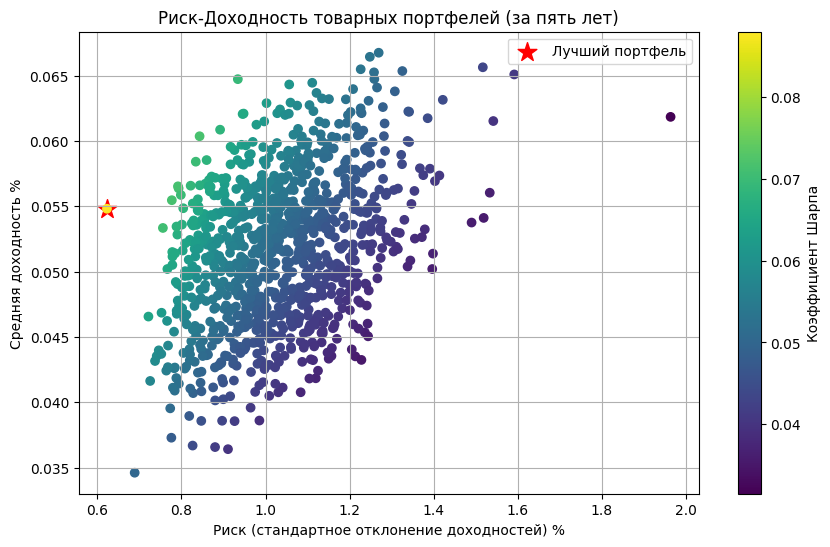

Файл "commodity_sharp_value_5y.png" успешно обновлён!


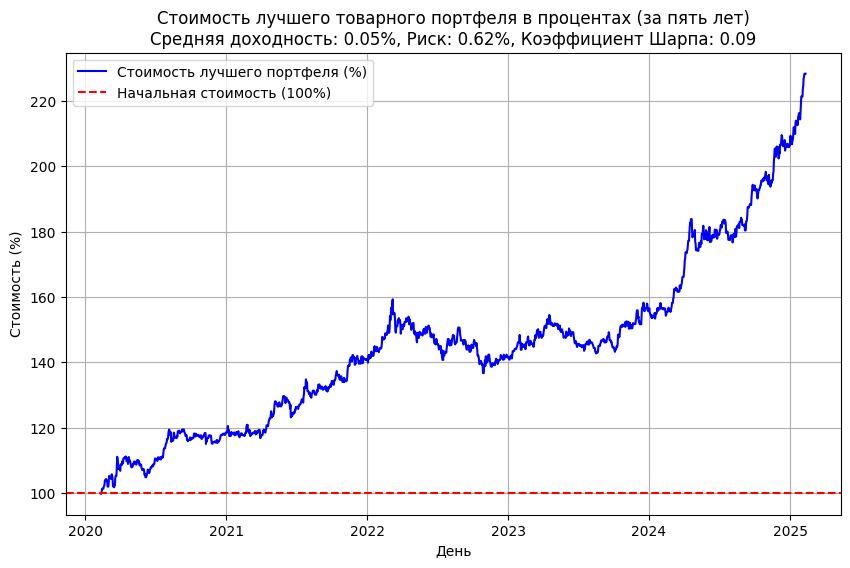

Файл "commodity_sharp_parts_5y.png" успешно обновлён!


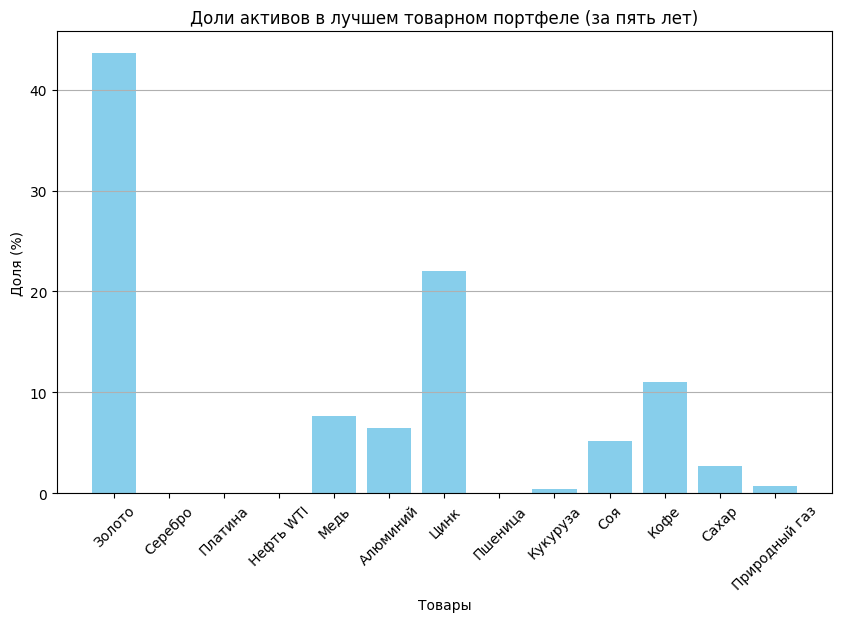

Файл "commodity_sharp_risk_return_10y.png" успешно обновлён!
Файл "commodity_sharp_value_10y.png" успешно обновлён!
Файл "commodity_sharp_parts_10y.png" успешно обновлён!


{'месяц': [('KC=F', 'Кофе', 60.90616741876639),
  ('ZS=F', 'Соя', 14.554351794196716),
  ('ALI=F', 'Алюминий', 13.535413343671706),
  ('HG=F', 'Медь', 8.48576353053764)],
 'квартал': [('KC=F', 'Кофе', 28.678931031008),
  ('ZC=F', 'Кукуруза', 26.040697048647786),
  ('HG=F', 'Медь', 24.351556185549384),
  ('ALI=F', 'Алюминий', 9.816322992466457),
  ('GC=F', 'Золото', 7.4995261934066235)],
 'год': [('GC=F', 'Золото', 40.339716120057446),
  ('ZN=F', 'Цинк', 28.735417862200226),
  ('KC=F', 'Кофе', 13.7494895904865),
  ('ZC=F', 'Кукуруза', 10.574425326819876)],
 'три года': [('GC=F', 'Золото', 82.07425759673484),
  ('KC=F', 'Кофе', 12.129319859880217)],
 'пять лет': [('GC=F', 'Золото', 43.58917031918973),
  ('ZN=F', 'Цинк', 22.07593687497932),
  ('KC=F', 'Кофе', 11.03605699570167),
  ('HG=F', 'Медь', 7.698032335157021),
  ('ALI=F', 'Алюминий', 6.502073252542228)],
 'десять лет': [('ZN=F', 'Цинк', 42.15459829852129),
  ('GC=F', 'Золото', 31.157149739689388),
  ('HG=F', 'Медь', 8.3488066652060

In [47]:
from github_lib_abscur2 import pass_file
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize

# Выбор случайного периода
random_period = random.choice(list(ago_dates.keys()))

# Функция для расчета средней доходности и риска портфеля с методом "взял и держи"
def portfolio_performance(weights, cumulative_returns):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    # Дневная средняя доходность и стандартное отклонение по доходности
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    portfolio_std_dev = np.std(daily_returns)  # стандартное отклонение (риск)
    
    return portfolio_mean_return, portfolio_std_dev  # возвращаем среднюю доходность и риск

# Функция для расчета коэффициента Шарпа
def sharpe_ratio(weights, cumulative_returns, risk_free_rate=0):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    portfolio_volatility = np.std(daily_returns)  # стандартное отклонение доходности
    
    if portfolio_volatility == 0:
        return -np.inf  # Если волатильность равна 0, возвращаем отрицательную бесконечность (максимальный коэффициент)
    
    return (portfolio_mean_return - risk_free_rate) / portfolio_volatility  # Коэффициент Шарпа

# Функция для минимизации коэффициента Шарпа (отрицательное значение)
def neg_sharpe_ratio(weights, cumulative_returns):
    return -sharpe_ratio(weights, cumulative_returns)  # Возвращаем отрицательное значение коэффициента Шарпа

# Словарь для хранения товаров и их долей по диапазонам
portfolio_weights_by_period = {}

# Основной цикл по диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по текущему диапазону для товаров
    filtered_data = absolute_commodity_prices[absolute_commodity_prices.index >= start_date]
    
    if filtered_data.empty:
        print(f"Нет данных для диапазона {period_name} начиная с {start_date}.")
        continue
    
    returns = np.diff(filtered_data.to_numpy(), axis=0) / filtered_data.to_numpy()[:-1]  # относительные изменения
    
    # Вычисляем кумулятивные доходности один раз
    cumulative_returns = np.cumprod(1 + returns, axis=0)  # кумулятивные доходности
    
    num_portfolios = 1000
    num_assets = filtered_data.shape[1]
    results = np.zeros((3, num_portfolios + 1))
    
    best_random_weights = None
    
    # Генерация портфелей и расчет их характеристик
    for i in range(num_portfolios):
        random_weights = np.random.rand(num_assets)  # генерируем случайный ряд
        random_weights /= np.sum(random_weights)  # Нормализуем веса так, чтобы они в сумме давали единицу
        
        portfolio_mean_return, portfolio_volatility = portfolio_performance(random_weights, cumulative_returns)
        results[0, i] = portfolio_mean_return
        results[1, i] = portfolio_volatility
        results[2, i] = sharpe_ratio(random_weights, cumulative_returns)
    
        if best_random_weights is None or results[2, i] >= results[2].max():
            best_random_weights = random_weights
    
    # Оптимизация портфеля с использованием scipy.optimize.minimize с ограничениями
    initial_weights = best_random_weights.copy()  # Начальные веса как лучшие случайные веса
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},   # Сумма весов должна быть равна 1
        {'type': 'ineq', 'fun': lambda x: x}              # Все веса должны быть неотрицательными
    )
    
    optimal_solution = minimize(neg_sharpe_ratio, initial_weights,
                                args=(cumulative_returns,),
                                constraints=constraints)
    
    best_weights = optimal_solution.x  # Оптимальные веса портфеля
    
    best_portfolio_value = cumulative_returns @ best_weights
    
    best_portfolio_return, best_portfolio_volatility = portfolio_performance(best_weights, cumulative_returns)
    
    results[0, -1] = best_portfolio_return
    results[1, -1] = best_portfolio_volatility
    results[2, -1] = sharpe_ratio(best_weights, cumulative_returns)
    
    # Преобразование стоимости в проценты относительно начальной стоимости 
    best_portfolio_value_percent = best_portfolio_value * 100 
    
    dates = absolute_commodity_prices.index[-len(best_portfolio_value):]
    
    plt.figure(figsize=(10,6))
    plt.scatter(best_portfolio_volatility * 100,best_portfolio_return * 100,color='red', marker='*', s=200,label='Лучший портфель')
    plt.scatter(results[1, :] * 100, results[0, :] * 100, c=results[2, :], cmap='viridis', marker='o')
    plt.title(f'Риск-Доходность товарных портфелей (за {period_name})')
    plt.xlabel('Риск (стандартное отклонение доходностей) %')
    plt.ylabel('Средняя доходность %')
    plt.colorbar(label='Коэффициент Шарпа')
    plt.legend()
    plt.grid()
    
    file_name_risk_return=f'commodity_sharp_risk_return_{period_suffix[period_name]}.png'
    plt.savefig(file_name_risk_return,dpi=75)
    
    pass_file(file_name_risk_return)
    
    if period_name == random_period:
        plt.show()
    else:
        plt.close()
    
    sharpe_ratio_value=sharpe_ratio(best_weights,cumulative_returns)
    
    plt.figure(figsize=(10,6))
    plt.plot(dates,best_portfolio_value_percent,label='Стоимость лучшего портфеля (%)',color='blue')
    plt.title(f'Стоимость лучшего товарного портфеля в процентах (за {period_name})\n'
             f'Средняя доходность: {best_portfolio_return * 100:.2f}%, '
             f'Риск: {best_portfolio_volatility * 100:.2f}%, '
             f'Коэффициент Шарпа: {sharpe_ratio_value:.2f}')
    plt.xlabel('День')
    plt.ylabel('Стоимость (%)')
    plt.axhline(y=100,color='r',linestyle='--',label='Начальная стоимость (100%)') 
    plt.legend()
    plt.grid()
    
    file_name_value=f'commodity_sharp_value_{period_suffix[period_name]}.png'
    plt.savefig(file_name_value,dpi=75)
    
    pass_file(file_name_value)
    
    if period_name == random_period:
        plt.show()
    else:
        plt.close()
    
    best_weights_percent=best_weights * 100 
    
    asset_labels=[commodity_tickers[ticker] for ticker in absolute_commodity_prices.columns.tolist()] 

    # Сохранение товаров и их долей в словаре для дальнейшего использования
    commodity_weight_dict=dict(zip(asset_labels,best_weights_percent))
     
    # Отбор товаров с наибольшими долями до достижения суммы в 90%
    sorted_commodities=sorted(commodity_weight_dict.items(), key=lambda x: x[1], reverse=True)
    
    cumulative_percentage=0
    selected_commodities_list=[]
    
    for commodity_name, weight in sorted_commodities:
        if cumulative_percentage < 90:
            selected_commodities_list.append((commodity_name, weight))
            cumulative_percentage += weight
    
    # Визуализация долей активов в лучшем товарном портфеле
    plt.figure(figsize=(10,6))
    plt.bar(asset_labels,best_weights_percent,color='skyblue')
    plt.title(f'Доли активов в лучшем товарном портфеле (за {period_name})')
    plt.xlabel('Товары')
    plt.ylabel('Доля (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    file_name_parts=f'commodity_sharp_parts_{period_suffix[period_name]}.png'
    plt.savefig(file_name_parts,dpi=75)
    
    pass_file(file_name_parts)
    
    if period_name == random_period:
        plt.show()
    else:
        plt.close()
    
    # Сохранение информации о выбранных товарах и их долях для дальнейшего использования в JS-файле,
    # включая тикеры для гиперссылок.
    portfolio_weights_by_period[period_name] = [(ticker,name,weight) for name,weight in selected_commodities_list 
                                            for ticker in commodity_tickers.keys() 
                                            if commodity_tickers[ticker]==name]

portfolio_weights_by_period


In [48]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = []

# Генерация имен файлов для товарных портфелей по Шарпу
for period_name, start_date in ago_dates.items():
    suffix = period_suffix[period_name]
    # Форматируем дату с помощью pandas
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты без времени
    image_filenames.append((period_name, formatted_start_date, f'commodity_sharp_risk_return_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'commodity_sharp_value_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'commodity_sharp_parts_{suffix}.png'))

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм товарных портфелей по коэффициенту Шарпа
document.addEventListener("DOMContentLoaded", function() {
    const container = document.getElementById("charts-container");
"""

# Добавление изображений и подзаголовков
current_period_name = None

for period_name, start_date, filename in image_filenames:
    # Добавление подзаголовка только в начале новой серии
    if current_period_name != period_name:
        current_period_name = period_name
        js_code += f'    var header = document.createElement("p");\n'
        js_code += f'    header.innerHTML = "<strong>За {period_name} (начало: {start_date})</strong>";\n'
        js_code += '    container.appendChild(header);\n'
    
    # Добавление изображения
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Если это диаграмма с долями активов, добавляем список товаров
    if "parts" in filename:
        commodities_info = portfolio_weights_by_period[period_name]
        
        # Добавление списка товаров с долями
        js_code += '    var commodityList = document.createElement("p");\n'
        js_code += '    commodityList.innerHTML = "<strong>Топ товары по долям в портфеле:</strong> "; \n'
        
        for ticker, name, weight in commodities_info:
            weight_formatted = f"{weight:.2f}"  # Форматирование доли до двух знаков после запятой
            js_code += f'    commodityList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar={ticker}">{name} ({ticker})</a> - {weight_formatted}%, `;\n'

        # Удаление последней запятой (если она есть)
        js_code += '    commodityList.innerHTML = commodityList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
        
        js_code += '    container.appendChild(commodityList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("commodity_sharpe_portfolio_ratios.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл commodity_sharpe_portfolio_ratios.js успешно создан.")

# Публикуем файл
pass_file("commodity_sharpe_portfolio_ratios.js", is_image=False)


JavaScript файл commodity_sharpe_portfolio_ratios.js успешно создан.
Файл "commodity_sharpe_portfolio_ratios.js" успешно обновлён!


## Товарный портфель по Сортино

В данном разделе представлены графики, отображающие результаты оптимизации товарных портфелей по коэффициенту Сортино, который является важным инструментом для оценки инвестиционной эффективности с учетом риска. Коэффициент Сортино позволяет инвесторам анализировать доходность активов, учитывая только негативную волатильность, что делает его особенно полезным для формирования стратегий, ориентированных на снижение риска убытков.

Каждый график в этом разделе иллюстрирует результаты оптимизации товарных портфелей на основе исторических данных, выраженных в абсолютных курсах товаров. Это означает, что все расчеты и визуализации основаны на фактических ценах товаров, что позволяет более точно оценить их поведение на рынке. Для каждого временного диапазона представлены три ключевых графика:

1. График риск-доходность: Этот график показывает соотношение между риском (стандартным отклонением негативных доходностей) и средней доходностью различных товарных портфелей. Точки на графике представляют случайно сгенерированные портфели, а выделенная точка указывает на оптимальный портфель с наивысшим коэффициентом Сортино.

2. График стоимости портфеля: Этот график демонстрирует динамику абсолютной стоимости оптимального товарного портфеля в процентах относительно начальной стоимости. Портфели моделируются по методике "бери и держи", что подразумевает удержание активов в течение всего временного периода без активной торговли. Этот подход позволяет визуализировать, как изменялась стоимость портфеля на протяжении выбранного временного периода.

3. График долей активов в портфеле: Этот столбчатый график показывает распределение долей различных товаров в оптимальном портфеле. Он помогает инвесторам понять, какие товары составляют основу их инвестиционной стратегии и в каких пропорциях они представлены.

Каждая серия графиков сопровождается подзаголовком, который указывает на временной диапазон и дату начала анализа. Этот раздел служит полезным инструментом для анализа рынка и принятия обоснованных решений в области торговли и инвестиций, позволяя инвесторам выбирать наиболее подходящие активы для своих портфелей с учетом риска и доходности.

См. на сайте [https://www.abscur.ru/p/blog-page_9.html](https://www.abscur.ru/p/blog-page_9.html)

Файл "commodity_portfolio_sortino_risk_doh_1m.png" успешно обновлён!
Файл "commodity_portfolio_sortino_value_1m.png" успешно обновлён!
Файл "commodity_portfolio_sortino_parts_1m.png" успешно обновлён!
Файл "commodity_portfolio_sortino_risk_doh_1q.png" успешно обновлён!
Файл "commodity_portfolio_sortino_value_1q.png" успешно обновлён!
Файл "commodity_portfolio_sortino_parts_1q.png" успешно обновлён!
Файл "commodity_portfolio_sortino_risk_doh_1y.png" успешно обновлён!


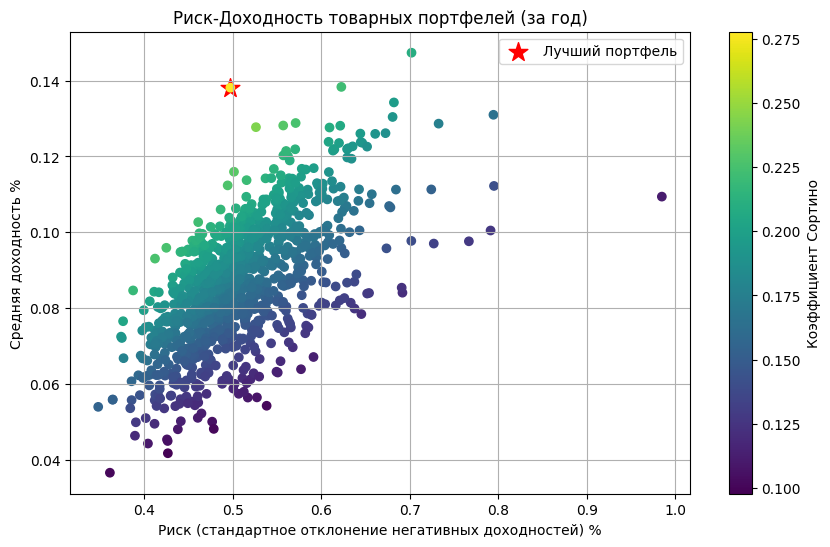

Файл "commodity_portfolio_sortino_value_1y.png" успешно обновлён!


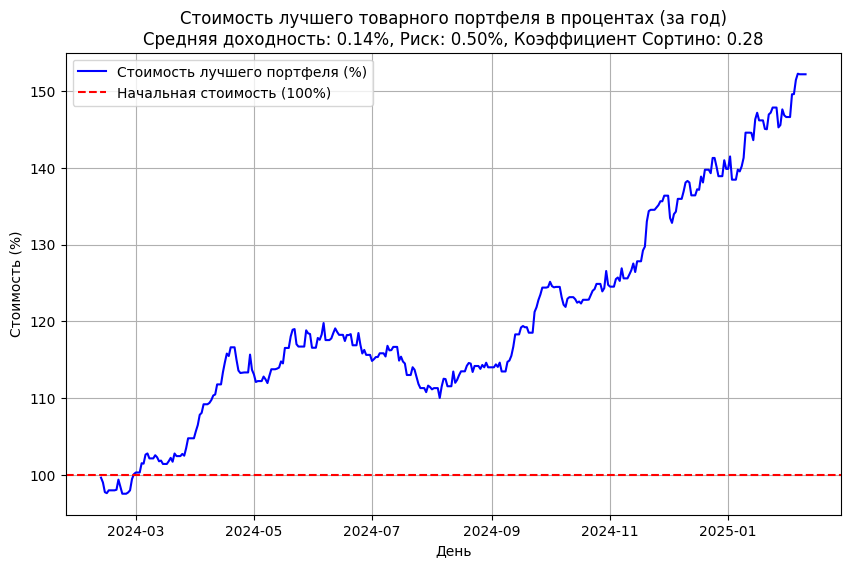

Файл "commodity_portfolio_sortino_parts_1y.png" успешно обновлён!


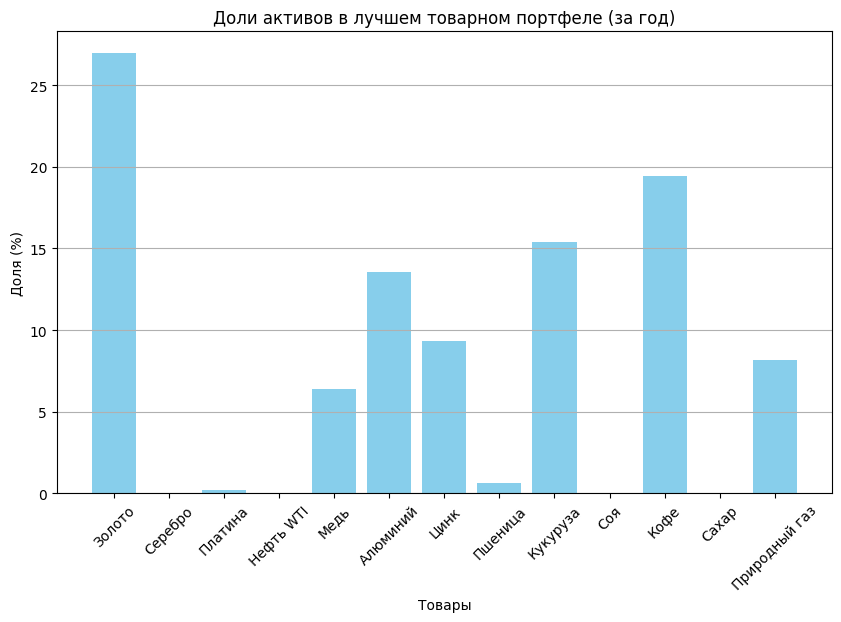

Файл "commodity_portfolio_sortino_risk_doh_3y.png" успешно обновлён!
Файл "commodity_portfolio_sortino_value_3y.png" успешно обновлён!
Файл "commodity_portfolio_sortino_parts_3y.png" успешно обновлён!
Файл "commodity_portfolio_sortino_risk_doh_5y.png" успешно обновлён!
Файл "commodity_portfolio_sortino_value_5y.png" успешно обновлён!
Файл "commodity_portfolio_sortino_parts_5y.png" успешно обновлён!
Файл "commodity_portfolio_sortino_risk_doh_10y.png" успешно обновлён!
Файл "commodity_portfolio_sortino_value_10y.png" успешно обновлён!
Файл "commodity_portfolio_sortino_parts_10y.png" успешно обновлён!


{'месяц': [('ZS=F', 'Соя', 15.863260316035557),
  ('ZW=F', 'Пшеница', 15.645922901828257),
  ('KC=F', 'Кофе', 14.99037202097218),
  ('ZC=F', 'Кукуруза', 9.912230200434536),
  ('ZN=F', 'Цинк', 7.869194806225527),
  ('ALI=F', 'Алюминий', 7.719764645202895),
  ('PL=F', 'Платина', 7.2198145690605395),
  ('SI=F', 'Серебро', 6.2345848449556325),
  ('GC=F', 'Золото', 6.067339460663578)],
 'квартал': [('ZC=F', 'Кукуруза', 55.64758014073712),
  ('CL=F', 'Нефть WTI', 14.33686590375794),
  ('KC=F', 'Кофе', 14.294025306145741),
  ('HG=F', 'Медь', 13.317576885544208)],
 'год': [('GC=F', 'Золото', 26.94223118805458),
  ('KC=F', 'Кофе', 19.412235855554076),
  ('ZC=F', 'Кукуруза', 15.372417637203723),
  ('ALI=F', 'Алюминий', 13.57583395565912),
  ('ZN=F', 'Цинк', 9.34255662350232),
  ('NG=F', 'Природный газ', 8.16001055107393)],
 'три года': [('GC=F', 'Золото', 28.300642623452866),
  ('KC=F', 'Кофе', 22.575096417338315),
  ('ZN=F', 'Цинк', 10.819160419941845),
  ('SB=F', 'Сахар', 10.47974780888657),
 

In [49]:
from github_lib_abscur2 import pass_file
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize

# Выбор случайного периода
random_period = random.choice(list(ago_dates.keys()))

# Функция для расчета средней доходности и риска портфеля с методом "взял и держи"
def portfolio_performance(weights, cumulative_returns):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    # Дневная средняя доходность
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    
    # Расчет негативных отклонений для коэффициента Сортино
    downside_returns = daily_returns[daily_returns < 0]  # отрицательные отклонения
    
    downside_deviation = np.std(downside_returns) if len(downside_returns) > 0 else 0  # стандартное отклонение негативных доходностей
    
    return portfolio_mean_return, downside_deviation  # возвращаем среднюю доходность и риск

# Функция для расчета коэффициента Сортино
def sortino_ratio(weights, cumulative_returns, target_return=0):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    downside_returns = daily_returns[daily_returns < target_return]  # отрицательные отклонения
    
    downside_deviation = np.std(downside_returns) if len(downside_returns) > 0 else 0  # стандартное отклонение негативных доходностей
    
    if downside_deviation == 0:
        return np.inf  # Если нет негативных отклонений, возвращаем бесконечность (максимальный коэффициент)
    
    return (portfolio_mean_return - target_return) / downside_deviation  # Коэффициент Сортино

# Функция для минимизации коэффициента Сортино (отрицательное значение)
def neg_sortino_ratio(weights, cumulative_returns):
    return -sortino_ratio(weights, cumulative_returns)  # Возвращаем отрицательное значение коэффициента Сортино

# Словарь для хранения товаров и их долей по диапазонам
portfolio_weights_by_period = {}

# Основной цикл по диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по текущему диапазону для товаров
    filtered_data = absolute_commodity_prices[absolute_commodity_prices.index >= start_date]
    
    if filtered_data.empty:
        print(f"Нет данных для диапазона {period_name} начиная с {start_date}.")
        continue

    returns = np.diff(filtered_data.to_numpy(), axis=0) / filtered_data.to_numpy()[:-1]  # относительные изменения

    # Вычисляем кумулятивные доходности один раз
    cumulative_returns = np.cumprod(1 + returns, axis=0)  # кумулятивные доходности

    num_portfolios = 1000
    num_assets = filtered_data.shape[1]
    results = np.zeros((3, num_portfolios + 1))

    best_random_weights = None
    best_random_sortino_ratio = -np.inf
    
    # Генерация портфелей и расчет их характеристик
    for i in range(num_portfolios):
        random_weights = np.random.rand(num_assets)  # генерируем случайный ряд
        random_weights /= np.sum(random_weights)  # Нормализуем веса так, чтобы они в сумме давали единицу
        
        portfolio_mean_return, downside_deviation = portfolio_performance(random_weights, cumulative_returns)
        results[0, i] = portfolio_mean_return
        results[1, i] = downside_deviation
        results[2, i] = sortino_ratio(random_weights, cumulative_returns)

        if best_random_weights is None or results[2, i] >= results[2].max():
            best_random_weights = random_weights
            best_random_sortino_ratio = results[2, i]
    
    # Оптимизация портфеля с использованием scipy.optimize.minimize с ограничениями
    initial_weights = best_random_weights.copy()  # Начальные веса как лучшие случайные веса
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},   # Сумма весов должна быть равна 1
        {'type': 'ineq', 'fun': lambda x: x}              # Все веса должны быть неотрицательными
    )

    optimal_solution = minimize(neg_sortino_ratio, initial_weights,
                                args=(cumulative_returns,),
                                constraints=constraints)
    
    best_weights = optimal_solution.x  # Оптимальные веса портфеля

    if sortino_ratio(best_weights, cumulative_returns) < best_random_sortino_ratio:
        best_weights = best_random_weights
    
    best_portfolio_value = cumulative_returns @ best_weights
    
    best_portfolio_return, best_downside_deviation = portfolio_performance(best_weights, cumulative_returns)
    
    results[0, -1] = best_portfolio_return
    results[1, -1] = best_downside_deviation
    results[2, -1] = sortino_ratio(best_weights, cumulative_returns)
    
    # Преобразование стоимости в проценты относительно начальной стоимости 
    best_portfolio_value_percent = best_portfolio_value * 100 
    
    dates = absolute_commodity_prices.index[-len(best_portfolio_value):]
    
    plt.figure(figsize=(10,6))
    plt.scatter(best_downside_deviation * 100,best_portfolio_return * 100,color='red', marker='*', s=200,label='Лучший портфель')
    plt.scatter(results[1, :] * 100, results[0, :] * 100, c=results[2, :], cmap='viridis', marker='o')
    plt.title(f'Риск-Доходность товарных портфелей (за {period_name})')
    plt.xlabel('Риск (стандартное отклонение негативных доходностей) %')
    plt.ylabel('Средняя доходность %')
    plt.colorbar(label='Коэффициент Сортино')
    plt.legend()
    plt.grid()
    
    file_name_risk_return=f'commodity_portfolio_sortino_risk_doh_{period_suffix[period_name]}.png'
    plt.savefig(file_name_risk_return,dpi=75)
    
    pass_file(file_name_risk_return)
    
    if period_name == random_period:
       plt.show()
    else:
       plt.close()
    
    sortino_ratio_value=sortino_ratio(best_weights,cumulative_returns)
    
    plt.figure(figsize=(10,6))
    plt.plot(dates,best_portfolio_value_percent,label='Стоимость лучшего портфеля (%)',color='blue')
    plt.title(f'Стоимость лучшего товарного портфеля в процентах (за {period_name})\n'
             f'Средняя доходность: {best_portfolio_return * 100:.2f}%, '
             f'Риск: {best_downside_deviation * 100:.2f}%, '
             f'Коэффициент Сортино: {sortino_ratio_value:.2f}')
    plt.xlabel('День')
    plt.ylabel('Стоимость (%)')
    plt.axhline(y=100,color='r',linestyle='--',label='Начальная стоимость (100%)') 
    plt.legend()
    plt.grid()
    
    file_name_value=f'commodity_portfolio_sortino_value_{period_suffix[period_name]}.png'
    plt.savefig(file_name_value,dpi=75)
    
    pass_file(file_name_value)
    
    if period_name == random_period:
       plt.show()
    else:
       plt.close()
    
    best_weights_percent=best_weights * 100 
    
    asset_labels=[commodity_tickers[ticker] for ticker in absolute_commodity_prices.columns.tolist()] 
    
    # Сохранение товаров и их долей в словаре для дальнейшего использования
    commodity_weight_dict=dict(zip(asset_labels,best_weights_percent))
    
    # Отбор товаров с наибольшими долями до достижения суммы в 90%
    sorted_commodities=sorted(commodity_weight_dict.items(), key=lambda x: x[1], reverse=True)
    
    cumulative_percentage=0
    selected_commodities_list=[]
    
    for commodity_name, weight in sorted_commodities:
       if cumulative_percentage < 90:
           selected_commodities_list.append((commodity_name, weight))
           cumulative_percentage += weight
    
    # Визуализация долей активов в лучшем товарном портфеле
    plt.figure(figsize=(10,6))
    plt.bar(asset_labels,best_weights_percent,color='skyblue')
    plt.title(f'Доли активов в лучшем товарном портфеле (за {period_name})')
    plt.xlabel('Товары')
    plt.ylabel('Доля (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    file_name_parts=f'commodity_portfolio_sortino_parts_{period_suffix[period_name]}.png'
    plt.savefig(file_name_parts,dpi=75)
    
    pass_file(file_name_parts)
    
    if period_name == random_period:
       plt.show()
    else:
       plt.close()
    
    # Сохранение информации о выбранных товарах и их долях для дальнейшего использования в JS-файле,
    # включая тикеры для гиперссылок.
    portfolio_weights_by_period[period_name] = [(ticker,name,weight) for name,weight in selected_commodities_list 
                                                for ticker in commodity_tickers.keys() 
                                                if commodity_tickers[ticker]==name]

portfolio_weights_by_period


In [50]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = []

# Генерация имен файлов для товарных портфелей по Сортино
for period_name, start_date in ago_dates.items():
    suffix = period_suffix[period_name]
    # Форматируем дату с помощью pandas
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты без времени
    image_filenames.append((period_name, formatted_start_date, f'commodity_portfolio_sortino_risk_doh_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'commodity_portfolio_sortino_value_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'commodity_portfolio_sortino_parts_{suffix}.png'))

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм товарных портфелей по коэффициенту Сортино
document.addEventListener("DOMContentLoaded", function() {
    const container = document.getElementById("charts-container");
"""

# Добавление изображений и подзаголовков
current_period_name = None

for period_name, start_date, filename in image_filenames:
    # Добавление подзаголовка только в начале новой серии
    if current_period_name != period_name:
        current_period_name = period_name
        js_code += f'    var header = document.createElement("p");\n'
        js_code += f'    header.innerHTML = "<strong>За {period_name} (начало: {start_date})</strong>";\n'
        js_code += '    container.appendChild(header);\n'
    
    # Добавление изображения
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Если это диаграмма с долями активов, добавляем список товаров
    if "parts" in filename:
        commodities_info = portfolio_weights_by_period[period_name]
        
        # Добавление списка товаров с долями
        js_code += '    var commodityList = document.createElement("p");\n'
        js_code += '    commodityList.innerHTML = "<strong>Топ товары по долям в портфеле:</strong> "; \n'
        
        for ticker, name, weight in commodities_info:
            weight_formatted = f"{weight:.2f}"  # Форматирование доли до двух знаков после запятой
            js_code += f'    commodityList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_2.html?tovar={ticker}">{name} ({ticker})</a> - {weight_formatted}%, `;\n'

        # Удаление последней запятой (если она есть)
        js_code += '    commodityList.innerHTML = commodityList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
        
        js_code += '    container.appendChild(commodityList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("commodity_sortino_portfolio_ratios.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл commodity_sortino_portfolio_ratios.js успешно создан.")

# Публикуем файл
pass_file("commodity_sortino_portfolio_ratios.js", is_image=False)


JavaScript файл commodity_sortino_portfolio_ratios.js успешно создан.
Файл "commodity_sortino_portfolio_ratios.js" успешно обновлён!


# Акции Мосбиржи

## Подготовка данных акций

In [51]:
import pandas as pd
from github_lib_abscur2 import pass_file

# Импортируем данные о всех акциях
all_stocks = pd.read_csv('/kaggle/input/moexalgo-data/all_stocks.csv')

# Фильтруем только бумаги первого уровня
first_level_stocks = all_stocks[all_stocks['listlevel'] == 1]

# Создаем словарь с тикерами и короткими названиями
stocks_dict = dict(zip(first_level_stocks['ticker'], first_level_stocks['shortname']))

# Импортируем курсы закрытия акций
closing_prices_df = pd.read_csv('/kaggle/input/moexalgo-data/stocks_close.csv', index_col='date', parse_dates=True)

# Оставляем только колонки, соответствующие тикерам из stocks_dict
filtered_df = closing_prices_df.filter(items=stocks_dict.keys())

# Определяем дату 10 лет назад от текущей даты
ten_years_ago = pd.Timestamp.now() - pd.DateOffset(years=10)

# Фильтруем данные за последние 10 лет
recent_data = filtered_df[filtered_df.index >= ten_years_ago]

# Оставляем только тикеры, для которых есть более 2500 значений за последние 10 лет
valid_tickers = recent_data.columns[recent_data.notnull().sum() > 2500]

# Фильтруем DataFrame по валидным тикерам
moex_closing_prices_rub_df = filtered_df[valid_tickers]

# Оставляем только данные за последние 10 лет
moex_closing_prices_rub_df = moex_closing_prices_rub_df[moex_closing_prices_rub_df.index >= ten_years_ago]

# Заполняем пустоты вперед и назад
moex_closing_prices_rub_df.ffill(inplace=True)  # Заполнение вперед
moex_closing_prices_rub_df.bfill(inplace=True)  # Заполнение назад

# Обновляем словарь, оставляя только тикеры из таблицы с курсами закрытия
moex_stocks_dict = {ticker: stocks_dict[ticker] for ticker in valid_tickers}

# Сохраняем таблицу в CSV файл на диск
csv_filename = 'moex_closing_prices_rub.csv'
moex_closing_prices_rub_df.to_csv(csv_filename, index=True)

# Публикуем файл на GitHub
pass_file(csv_filename, is_image=False)

# Выводим результат
print(moex_closing_prices_rub_df)
print(moex_stocks_dict)

# Получаем рублевый курс из all_abscur
rub_rate = all_abscur['RUB']

# Рассчитываем абсолютные курсы для акций, учитывая несовпадение дат
moex_closing_prices_abs_df = moex_closing_prices_rub_df.reindex(all_abscur.index).multiply(rub_rate, axis=0)

# Заполняем пустоты в таблице абсолютных курсов вперед и назад
moex_closing_prices_abs_df.ffill(inplace=True)  # Заполнение вперед
moex_closing_prices_abs_df.bfill(inplace=True)  # Заполнение назад

# Сохраняем таблицу абсолютных курсов в CSV файл на диск с суффиксом abs
abs_csv_filename = 'moex_closing_prices_abs.csv'
moex_closing_prices_abs_df.to_csv(abs_csv_filename, index=True)

# Публикуем файл на GitHub
pass_file(abs_csv_filename, is_image=False)

# Выводим результат
print(moex_closing_prices_abs_df)

Файл "moex_closing_prices_rub.csv" успешно обновлён!
              AFKS   AFLT   ALRS    BSPB    CHMF    GAZP    GMKN    HYDR  \
date                                                                       
2015-02-11  17.850  38.00  77.15   25.50   695.0  150.55  116.97  0.5275   
2015-02-12  18.380  39.39  73.60   26.45   713.0  157.70  120.37  0.5385   
2015-02-13  18.850  40.40  73.35   28.75   711.5  162.40  121.06  0.6100   
2015-02-16  20.050  40.41  72.50   29.55   685.0  160.19  119.00  0.6080   
2015-02-17  19.100  40.15  72.40   30.25   698.6  159.20  113.75  0.5749   
...            ...    ...    ...     ...     ...     ...     ...     ...   
2025-02-04  13.744  62.66  54.51  371.50  1175.0  136.84  117.16  0.5563   
2025-02-05  14.025  64.73  56.32  379.44  1202.8  140.45  120.40  0.5730   
2025-02-06  14.062  64.35  57.01  375.52  1196.8  141.98  121.50  0.5688   
2025-02-07  14.050  64.25  56.76  375.70  1207.6  141.90  122.28  0.5638   
2025-02-10  14.308  65.12  58.36  3

## Последние курсы акций Мосбиржи

В данном разделе представлена таблица, содержащая информацию о последних курсах акций. Таблица включает тикеры и названия акций, а также их абсолютные и рублевые курсы. Абсолютный курс акции вычисляется путем умножения рублевого курса акции на [**абсолютный курс рубля**](https://www.abscur.ru/p/2.html?abs=RUB), что позволяет получить более полное представление о стоимости акций в контексте текущих рыночных условий.

Каждая акция представлена в виде гиперссылки, ведущей на страницу с графиком данной акции. Это предоставляет возможность для более детального анализа динамики цен и трендов на рынке, что может быть полезно для дальнейших исследований и оценок.

Данные в таблице обновляются на основе последних доступных значений, что обеспечивает актуальность информации для пользователей. Этот раздел служит важным инструментом для трейдеров и инвесторов, позволяя им принимать обоснованные решения на основе свежих рыночных данных.

См. на сайте [https://www.abscur.ru/p/blog-page_70.html](https://www.abscur.ru/p/blog-page_70.html)

In [52]:
import pandas as pd
from github_lib_abscur2 import pass_file

# Получаем последние строки из таблиц
last_absolute_prices = moex_closing_prices_abs_df.iloc[-1]  # Последняя строка абсолютных курсов акций
last_ruble_prices = moex_closing_prices_rub_df.iloc[-1]  # Последняя строка рублевых курсов акций

# Создаем список для хранения данных
last_stock_absolute_ruble_prices_data = []

# Заполняем данные для каждого тикера
for ticker, name in moex_stocks_dict.items():
    last_price_data = {
        'Stock Name': name,
        'Absolute Price': last_absolute_prices[ticker],
        'Ruble Price': last_ruble_prices[ticker]
    }
    last_stock_absolute_ruble_prices_data.append(last_price_data)

# Создаем DataFrame из собранных данных
last_stock_absolute_ruble_prices = pd.DataFrame(last_stock_absolute_ruble_prices_data)

# Устанавливаем тикеры в качестве индекса
last_stock_absolute_ruble_prices.index = moex_stocks_dict.keys()
last_stock_absolute_ruble_prices.index.name = "Ticker"

# Сохранение результирующей таблицы на диск
output_file_path = 'last_stock_absolute_ruble_prices.csv'
last_stock_absolute_ruble_prices.to_csv(output_file_path, index=False)
print(f"Результирующая таблица сохранена в {output_file_path}")

# Публикуем таблицу
pass_file(output_file_path, is_image=False)

# Вывод результирующей таблицы
last_stock_absolute_ruble_prices


Результирующая таблица сохранена в last_stock_absolute_ruble_prices.csv
Файл "last_stock_absolute_ruble_prices.csv" успешно обновлён!


Stock Name  Absolute Price   Ruble Price
Ticker                                          
AFKS    Система ао        3.407965     14.308000
AFLT      Аэрофлот       15.510672     65.120000
ALRS     АЛРОСА ао       13.900534     58.360000
BSPB        БСП ао       90.696461    380.780000
CHMF      СевСт-ао      290.729817   1220.600000
GAZP    ГАЗПРОМ ао       34.358329    144.250000
GMKN     ГМКНорНик       29.130146    122.300000
HYDR      РусГидро        0.137409      0.576900
IRAO    ИнтерРАОао        0.883313      3.708500
LKOH        ЛУКОЙЛ     1712.080883   7188.000000
LSRG        ЛСР ао      209.270209    878.600000
MAGN           ММК        8.118569     34.085000
MOEX      МосБиржа       49.304500    207.000000
MSNG    +МосЭнерго        0.580936      2.439000
MTLR      Мечел ао       25.728850    108.020000
MTLRP     Мечел ап       26.486282    111.200000
MTSS        МТС-ао       54.866142    230.350000
MVID       М.видео       24.771343    104.000000
NLMK       НЛМК ао       33.727136    141.600000
NVTK    Новатэк ао      272.580045   1144.400000
PHOR    ФосАгро ао     1707.317163   7168.000000
PIKK        ПИК ао      165.324894    694.100000
PLZL         Полюс     4284.132275  17986.500000
ROSN      Роснефть      128.167880    538.100000
RTKM    Ростел -ао       15.708366     65.950000
RTKMP   Ростел -ап       14.338796     60.200000
SBER      Сбербанк       69.476471    291.690000
SBERP   Сбербанк-п       69.188266    290.480000
SELG      Селигдар       12.435690     52.210000
TATN    Татнфт 3ао      167.778210    704.400000
TATNP   Татнфт 3ап      162.347569    681.600000
TGKA         ТГК-1        0.001749      0.007344
TRNFP   Транснф ап      271.674938   1140.600000
VTBR        ВТБ ао       19.476468     81.770000

In [53]:
import pandas as pd
import json
from github_lib_abscur2 import pass_file

# Преобразуем DataFrame в формат JSON
json_data = last_stock_absolute_ruble_prices.reset_index().to_json(orient='records', lines=False)

# Получаем даты последней строки (последние значения индексов)
last_absolute_date = moex_closing_prices_abs_df.index[-1].strftime('%Y-%m-%d')
last_ruble_date = moex_closing_prices_rub_df.index[-1].strftime('%Y-%m-%d')

# Создаем JavaScript-код для сохранения данных в файл
js_code = f"""
const lastStockPrices = {json_data};

function createTable() {{
    const table = document.createElement('table');
    table.style.borderCollapse = 'collapse';  // Убираем промежутки между ячеек
    table.border = '1';
    table.style.width = '100%';  // Задаем ширину таблицы

    // Заголовок таблицы
    const header = table.createTHead();
    const headerRow = header.insertRow(0);
    
    // Заголовки с жирным шрифтом и отступами
    const headers = ['Тикер', 'Название акции', 'Абсолютная цена (Дата: {last_absolute_date})', 'Рублевая цена (Дата: {last_ruble_date})'];
    headers.forEach((text, index) => {{
        const cell = headerRow.insertCell(index);
        cell.innerText = text;
        cell.style.fontWeight = 'bold';  // Жирный шрифт
        cell.style.padding = '10px';  // Отступы внутри ячеек
        cell.style.textAlign = 'center';  // Выравнивание по центру
    }});

    // Заполнение таблицы данными
    const tbody = table.createTBody();
    lastStockPrices.forEach(item => {{
        const row = tbody.insertRow();
        row.insertCell(0).innerHTML = `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia=${{item.Ticker}}">${{item.Ticker}}</a>`;
        row.insertCell(1).innerHTML = `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia=${{item.Ticker}}">${{item['Stock Name']}}</a>`;
        row.insertCell(2).innerText = Number(item['Absolute Price']).toLocaleString('ru-RU', {{ minimumFractionDigits: 2, maximumFractionDigits: 2 }});  // Форматируем цену до двух знаков с разделением разрядов
        row.insertCell(3).innerText = Number(item['Ruble Price']).toLocaleString('ru-RU', {{ minimumFractionDigits: 2, maximumFractionDigits: 2 }});  // Форматируем цену до двух знаков с разделением разрядов
        
        // Выравнивание цен по правой стороне и отступы внутри ячеек
        for (let i = 0; i < row.cells.length; i++) {{
            row.cells[i].style.textAlign = (i === 2 || i === 3) ? 'right' : 'left';
            row.cells[i].style.padding = '10px';  // Отступы внутри ячеек
        }}
    }});

    document.getElementById('table-container').appendChild(table);
}}

createTable();
"""

# Сохранение JavaScript-кода в файл
output_js_file_path = 'last_moex_absolute_ruble_prices.js'
with open(output_js_file_path, 'w') as js_file:
    js_file.write(js_code)

print(f"JavaScript файл сохранен в {output_js_file_path}")

# Публикуем js-скрипт
pass_file(output_js_file_path, is_image=False)


JavaScript файл сохранен в last_moex_absolute_ruble_prices.js
Файл "last_moex_absolute_ruble_prices.js" успешно обновлён!


## Графики акций Мосбиржи

В данном разделе представлены графики, иллюстрирующие динамику абсолютных и рублевых курсов различных акций Московской биржи. Акции могут быть выбраны из списка, расположенного над графиками, где текущая акция подсвечена желтым цветом, что облегчает её идентификацию и позволяет осуществлять сравнительный анализ ценовых изменений.

Графики охватывают временные диапазоны от одного месяца до десяти лет, предоставляя возможность изучения долгосрочных трендов и краткосрочных колебаний цен. На каждом графике левая шкала предназначена для отображения абсолютного курса, который получается путем умножения рублевого курса акции на [**абсолютный курс рубля**](https://www.abscur.ru/p/2.html?abs=RUB), а правая шкала — для рублевого курса. Для каждой акции выводятся два графика: один для абсолютного курса и другой — для рублевого курса. Оба графика отображаются на одном холсте, что позволяет более наглядно сравнивать изменения цен.

Различие уровней абсолютного и рублевого курсов свидетельствует о недооцененности акции (если абсолютный курс выше рублевого) или перекупленности (если абсолютный курс ниже рублевого). Это позволяет инвесторам принимать более обоснованные решения на основе анализа ценовых изменений. 

См. на сайте [https://www.abscur.ru/p/blog-page_5.html](https://www.abscur.ru/p/blog-page_5.html)

Файл "moex_AFKS_1m_stock.png" успешно обновлён!
Файл "moex_AFKS_1q_stock.png" успешно обновлён!
Файл "moex_AFKS_1y_stock.png" успешно обновлён!
Файл "moex_AFKS_3y_stock.png" успешно обновлён!
Файл "moex_AFKS_5y_stock.png" успешно обновлён!
Файл "moex_AFKS_10y_stock.png" успешно обновлён!
Файл "moex_AFLT_1m_stock.png" успешно обновлён!
Файл "moex_AFLT_1q_stock.png" успешно обновлён!
Файл "moex_AFLT_1y_stock.png" успешно обновлён!
Файл "moex_AFLT_3y_stock.png" успешно обновлён!
Файл "moex_AFLT_5y_stock.png" успешно обновлён!
Файл "moex_AFLT_10y_stock.png" успешно обновлён!
Файл "moex_ALRS_1m_stock.png" успешно обновлён!
Файл "moex_ALRS_1q_stock.png" успешно обновлён!
Файл "moex_ALRS_1y_stock.png" успешно обновлён!
Файл "moex_ALRS_3y_stock.png" успешно обновлён!
Файл "moex_ALRS_5y_stock.png" успешно обновлён!
Файл "moex_ALRS_10y_stock.png" успешно обновлён!
Файл "moex_BSPB_1m_stock.png" успешно обновлён!
Файл "moex_BSPB_1q_stock.png" успешно обновлён!
Файл "moex_BSPB_1y_stock.png" успешно

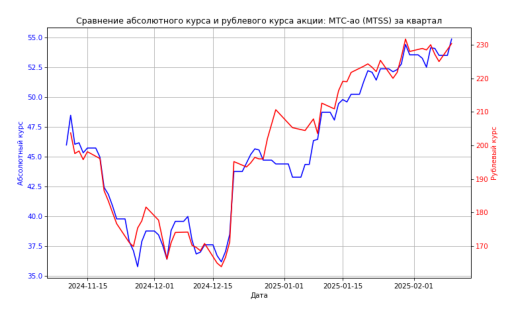

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from github_lib_abscur2 import pass_file

# Список для сохранения имен файлов
saved_files = []

# Цикл по всем акциям из moex_stocks_dict
for ticker, stock_name in moex_stocks_dict.items():
    # Извлечение абсолютных и рублевых курсов для выбранной акции
    absolute_prices = moex_closing_prices_abs_df[ticker]
    rub_prices = moex_closing_prices_rub_df[ticker]

    # Создание графиков для каждого временного диапазона
    for period_name, start_date in ago_dates.items():
        # Фильтрация данных по дате
        filtered_absolute_prices = absolute_prices[absolute_prices.index >= start_date]
        filtered_rub_prices = rub_prices[rub_prices.index >= start_date]

        # Проверка наличия данных для данного периода
        if not filtered_absolute_prices.empty and not filtered_rub_prices.empty:
            # Создание графика
            fig, ax1 = plt.subplots(figsize=(10, 6))

            # График абсолютного курса
            ax1.plot(filtered_absolute_prices.index, filtered_absolute_prices.values, linestyle='-', color='b', label='Абсолютный курс')
            ax1.set_xlabel('Дата')
            ax1.set_ylabel('Абсолютный курс', color='b')
            ax1.tick_params(axis='y', labelcolor='b')
            ax1.grid()

            # Создание второй оси Y для рублевого курса
            ax2 = ax1.twinx()  
            ax2.plot(filtered_rub_prices.index, filtered_rub_prices.values, linestyle='-', color='r', label='Рублевый курс')
            ax2.set_ylabel('Рублевый курс', color='r')
            ax2.tick_params(axis='y', labelcolor='r')

            # Заголовок графика с именем акции и временным диапазоном
            plt.title(f'Сравнение абсолютного курса и рублевого курса акции: {stock_name} ({ticker}) за {period_name}')
            plt.xticks(rotation=45)
            plt.tight_layout()

            # Формирование имени файла с упоминанием MOEX
            suffix = period_suffix[period_name]
            filename = f"moex_{ticker}_{suffix}_stock.png"
            
            # Сохранение графика на диск
            plt.savefig(filename, dpi=75)
            
            # Добавление имени файла в список сохраненных файлов
            saved_files.append(filename)

            # Публикуем график на GitHub
            pass_file(filename)

            # Закрытие фигуры после сохранения
            plt.close(fig)

# Выбор случайного файла из сохраненных и вывод изображения
if saved_files:
    random_file = random.choice(saved_files)
    
    # Отображение случайно выбранного изображения
    img = plt.imread(random_file)
    plt.imshow(img)
    plt.axis('off')  # Убираем оси для чистоты отображения
    plt.show()
else:
    print("Не было сохранено ни одного файла.")


In [55]:
import json
from github_lib_abscur2 import pass_file

# Генерация JavaScript-кода для вывода ссылок на акции и графиков
js_code = f"""
// Список возможных тикеров и их названий
const stockTickers = {json.dumps(moex_stocks_dict)};

// Функция для получения параметра из URL
function getURLParameter(param) {{
    const params = new URLSearchParams(window.location.search);
    return params.get(param);
}}

// Получение текущего тикера акции из параметров
let selectedTicker = getURLParameter('akcia');

// Проверка наличия тикера в списке возможных акций
if (!(selectedTicker in stockTickers)) {{
    // Если тикер не найден, выбираем случайный тикер
    const tickers = Object.keys(stockTickers);
    selectedTicker = tickers[Math.floor(Math.random() * tickers.length)];
}}

// Функция для отображения ссылок на акции
function displayStockLinks() {{
    const linksContainer = document.getElementById('stock-links');
    let linksHTML = '';

    for (const [ticker, name] of Object.entries(stockTickers)) {{
        if (ticker === selectedTicker) {{
            linksHTML += `<strong style="background-color: yellow;">${{name}}</strong> `;  // Текущая акция с желтой подложкой
        }} else {{
            linksHTML += `<a href="?akcia=${{ticker}}">${{name}}</a> `;  // Ссылка на акцию
        }}
    }}

    linksContainer.innerHTML = linksHTML;
}}

// Функция для отображения графиков акции
function displayStockGraphs() {{
    const graphsContainer = document.getElementById('graphs-container');
    
    // Список временных диапазонов и соответствующих суффиксов
    const periodSuffix = {json.dumps(period_suffix)};
    
    for (const [period, suffix] of Object.entries(periodSuffix)) {{
        const imgElement = document.createElement('img');
        imgElement.src = `https://prog815.github.io/abscur2/contents/moex_${{selectedTicker}}_${{suffix}}_stock.png`;
        imgElement.alt = `График за ${{period}} для ${{selectedTicker}}`;
        imgElement.style.width = '100%';  // Устанавливаем ширину изображения
        graphsContainer.appendChild(imgElement);
    }}
}}

// Вызов функций для отображения ссылок и графиков
displayStockLinks();
displayStockGraphs();
"""

# Сохранение JavaScript-кода в файл с упоминанием moex
output_js_file_path = 'moex_display_stock_graphs_links.js'
with open(output_js_file_path, 'w') as js_file:
    js_file.write(js_code)

print(f"JavaScript файл сохранен в {output_js_file_path}")

# Публикуем файл на GitHub
pass_file(output_js_file_path, is_image=False)


JavaScript файл сохранен в moex_display_stock_graphs_links.js
Файл "moex_display_stock_graphs_links.js" успешно обновлён!


## Рейтинг роста акций Мосбиржи

В данном разделе представлены визуализации, отображающие изменения абсолютного и рублевого курсов акций Московской биржи в различных временных интервалах. Каждая диаграмма соответствует определённому временно́му периоду, таким как один месяц, три месяца, шесть месяцев, один год и два года. Данные на диаграммах отсортированы по возрастанию изменения абсолютного курса акций.

В правой части каждой диаграммы находятся самые подросшие акции, а под каждой диаграммой расположен список акций с наибольшим ростом, содержащий гиперссылки на страницу с графиками курсов акций. Это упрощает идентификацию лидеров роста и позволяет более эффективно анализировать рыночные тенденции.

См. на сайте [https://www.abscur.ru/p/blog-page_67.html](https://www.abscur.ru/p/blog-page_67.html)

Файл "moex_1m_stock_up_down.png" успешно обновлён!
Файл "moex_1q_stock_up_down.png" успешно обновлён!
Файл "moex_1y_stock_up_down.png" успешно обновлён!
Файл "moex_3y_stock_up_down.png" успешно обновлён!
Файл "moex_5y_stock_up_down.png" успешно обновлён!
Файл "moex_10y_stock_up_down.png" успешно обновлён!
Выводим график для периода: десять лет


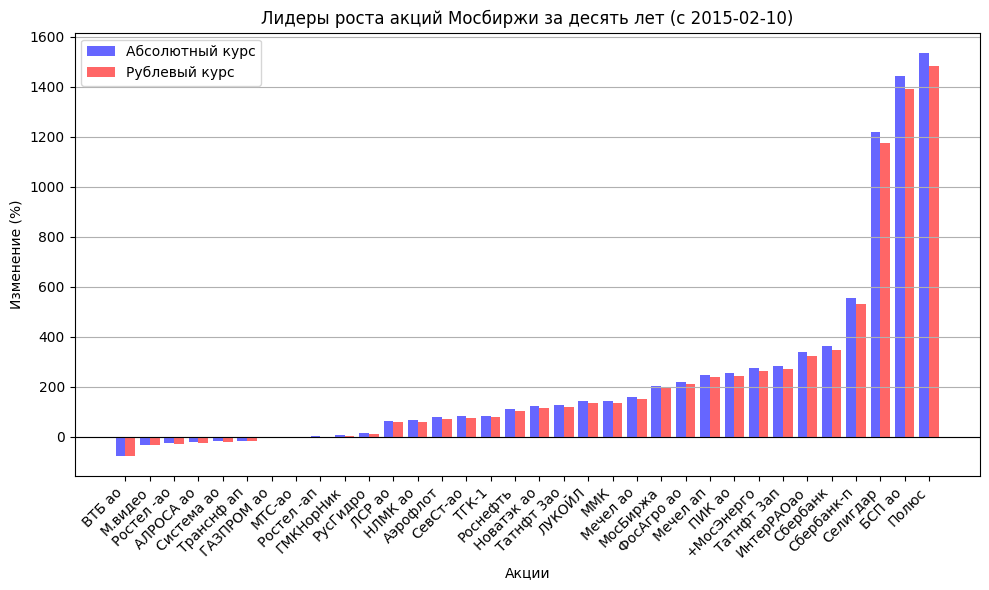

{'месяц': [{'Ticker': 'PIKK', 'Stock Name': 'ПИК ао', 'Absolute Change (%)': 46.11275435955734}, {'Ticker': 'SELG', 'Stock Name': 'Селигдар', 'Absolute Change (%)': 30.554196905050695}, {'Ticker': 'PLZL', 'Stock Name': 'Полюс', 'Absolute Change (%)': 25.59889433285654}, {'Ticker': 'NVTK', 'Stock Name': 'Новатэк ао', 'Absolute Change (%)': 22.764059479933888}, {'Ticker': 'GAZP', 'Stock Name': 'ГАЗПРОМ ао', 'Absolute Change (%)': 18.440241711414192}], 'квартал': [{'Ticker': 'PIKK', 'Stock Name': 'ПИК ао', 'Absolute Change (%)': 39.74665074369377}, {'Ticker': 'PHOR', 'Stock Name': 'ФосАгро ао', 'Absolute Change (%)': 32.42897665451887}, {'Ticker': 'PLZL', 'Stock Name': 'Полюс', 'Absolute Change (%)': 25.294570128171102}, {'Ticker': 'NVTK', 'Stock Name': 'Новатэк ао', 'Absolute Change (%)': 24.42217317108027}, {'Ticker': 'LSRG', 'Stock Name': 'ЛСР ао', 'Absolute Change (%)': 24.073124815295696}], 'год': [{'Ticker': 'AFLT', 'Stock Name': 'Аэрофлот', 'Absolute Change (%)': 65.11820131041264}

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Создание словаря для хранения данных о росте акций по временным диапазонам
top_stocks_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_absolute_prices = moex_closing_prices_abs_df[moex_closing_prices_abs_df.index >= start_date]
    filtered_rub_prices = moex_closing_prices_rub_df[moex_closing_prices_rub_df.index >= start_date]

    # Создание списка для хранения изменений
    changes = []

    # Пробегаемся по всем тикерам в словаре moex_stocks_dict
    for ticker in moex_stocks_dict.keys():
        # Получаем первую и последнюю цену для абсолютного курса
        first_absolute_price = filtered_absolute_prices[ticker].iloc[0]
        last_absolute_price = filtered_absolute_prices[ticker].iloc[-1]

        # Получаем первую и последнюю цену для рублевого курса
        first_rub_price = filtered_rub_prices[ticker].iloc[0]
        last_rub_price = filtered_rub_prices[ticker].iloc[-1]

        # Вычисление относительного изменения в процентах
        absolute_change_percent = ((last_absolute_price - first_absolute_price) / first_absolute_price) * 100
        rub_change_percent = ((last_rub_price - first_rub_price) / first_rub_price) * 100

        # Добавляем результаты в список
        changes.append({
            'Ticker': ticker,
            'Stock Name': moex_stocks_dict[ticker],  # Получаем имя акции из существующего словаря
            'Absolute Change (%)': absolute_change_percent,
            'Rub Change (%)': rub_change_percent
        })

    # Создание DataFrame из списка изменений
    changes_df = pd.DataFrame(changes)

    # Сортировка по убыванию абсолютного изменения, чтобы получить топ акций по росту
    changes_df_sorted = changes_df.sort_values(by='Absolute Change (%)', ascending=False)

    # Сохраняем данные о топ-5 акциях в словарь по текущему период имени (только те, что показали наибольший рост)
    top_stocks_by_period[period_name] = changes_df_sorted.head(5)[['Ticker', 'Stock Name', 'Absolute Change (%)']].to_dict(orient='records')

    # Повторная сортировка по возрастанию перед выводом на диаграмму
    changes_df_sorted = changes_df_sorted.sort_values(by='Absolute Change (%)')

    # Установка ширины столбцов и смещения для группировки
    bar_width = 0.4
    index = np.arange(len(changes_df_sorted))

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для абсолютного изменения
    plt.bar(index, changes_df_sorted['Absolute Change (%)'], bar_width, label='Абсолютный курс', color='blue', alpha=0.6)

    # Столбцы для рублевого изменения, с смещением вправо
    plt.bar(index + bar_width, changes_df_sorted['Rub Change (%)'], bar_width, label='Рублевый курс', color='red', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Лидеры роста акций Мосбиржи за {period_name} (с {formatted_start_date})')
    plt.xlabel('Акции')
    plt.ylabel('Изменение (%)')
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для группированных столбцов
    plt.xticks(index + bar_width / 2, changes_df_sorted['Stock Name'], rotation=45, ha='right')

    plt.legend()
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f"moex_{suffix}_stock_up_down.png"
    
    # Сохранение графика на диск
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь top_stocks_by_period содержит данные о росте акций для использования при генерации JS-файла.
print(top_stocks_by_period)


In [57]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"moex_{suffix}_stock_up_down.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм акций
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг роста акций за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка акций с наибольшим ростом из словаря top_stocks_by_period
    top_stocks = top_stocks_by_period.get(period_name, [])

    # Фильтрация акций с положительным ростом
    positive_growth_stocks = [stock for stock in top_stocks if stock['Absolute Change (%)'] > 0]

    # Добавление списка акций с наибольшим ростом
    js_code += '    var stockList = document.createElement("p");\n'
    js_code += '    stockList.innerHTML = "Топ акции по росту: "; \n'
    
    for index, stock in enumerate(positive_growth_stocks):
        growth_percentage = f"{stock['Absolute Change (%)']:.2f}"  # Форматирование процента до двух знаков после запятой
        if index < len(positive_growth_stocks) - 1:
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={stock["Ticker"]}">{stock["Stock Name"]} ({stock["Ticker"]})</a> - {growth_percentage}%, `;\n'
        else:
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={stock["Ticker"]}">{stock["Stock Name"]} ({stock["Ticker"]})</a> - {growth_percentage}%  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    stockList.innerHTML = stockList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(stockList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("moex_stock_up_down.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл moex_stock_up_down.js успешно создан.")

# Публикуем файл
pass_file("moex_stock_up_down.js", is_image=False)


JavaScript файл moex_stock_up_down.js успешно создан.
Файл "moex_stock_up_down.js" успешно обновлён!


## Рейтинг доходности акций Мосбиржи

В данном разделе представлены визуализации, отображающие изменения средних абсолютной и рублевой доходностей акций Московской биржи в различных временных интервалах. Каждая диаграмма соответствует определённому временно́му периоду, таким как один месяц, три месяца, шесть месяцев, один год и два года. Данные на диаграммах отсортированы по возрастанию средней абсолютной доходности акций.

На столбчатых диаграммах представлены данные для средних абсолютной и рублевой доходностей, что позволяет наглядно сравнивать результаты акций. В правой части каждой диаграммы расположены акции с наибольшей средней доходностью, а под каждой диаграммой находятся списки акций с указанием абсолютной средней доходности в процентах. Эти списки содержат гиперссылки на страницу с графиками курсов акций, что упрощает идентификацию лидеров по доходности и позволяет более эффективно анализировать рыночные тенденции.

См. на сайте [https://www.abscur.ru/p/blog-page_80.html](https://www.abscur.ru/p/blog-page_80.html)

Файл "moex_1m_average_returns.png" успешно обновлён!
Файл "moex_1q_average_returns.png" успешно обновлён!
Выводим график для периода: квартал


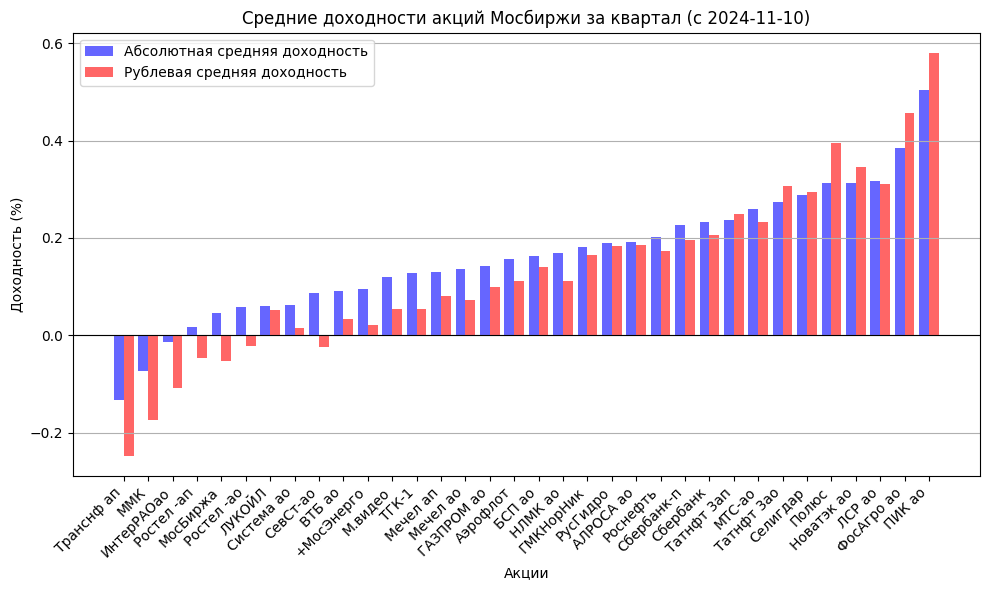

Файл "moex_1y_average_returns.png" успешно обновлён!
Файл "moex_3y_average_returns.png" успешно обновлён!
Файл "moex_5y_average_returns.png" успешно обновлён!
Файл "moex_10y_average_returns.png" успешно обновлён!
{'месяц': [{'Ticker': 'PIKK', 'Stock Name': 'ПИК ао', 'Average Absolute Return (%)': 1.493423751262712, 'Average Rub Return (%)': 1.7300324354544248}, {'Ticker': 'SELG', 'Stock Name': 'Селигдар', 'Average Absolute Return (%)': 1.0604122899466895, 'Average Rub Return (%)': 1.1637294603815007}, {'Ticker': 'PLZL', 'Stock Name': 'Полюс', 'Average Absolute Return (%)': 0.8622058313589834, 'Average Rub Return (%)': 0.9178737921475241}, {'Ticker': 'NVTK', 'Stock Name': 'Новатэк ао', 'Average Absolute Return (%)': 0.7833882727928821, 'Average Rub Return (%)': 0.8159809668785055}, {'Ticker': 'GAZP', 'Stock Name': 'ГАЗПРОМ ао', 'Average Absolute Return (%)': 0.6443648861351498, 'Average Rub Return (%)': 0.6379972438506732}], 'квартал': [{'Ticker': 'PIKK', 'Stock Name': 'ПИК ао', 'Averag

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Создание словаря для хранения данных о средних доходностях акций по временным диапазонам
average_returns_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_absolute_prices = moex_closing_prices_abs_df[moex_closing_prices_abs_df.index >= start_date]
    filtered_rub_prices = moex_closing_prices_rub_df[moex_closing_prices_rub_df.index >= start_date]

    # Создание списка для хранения средних доходностей
    average_returns = []

    # Пробегаемся по всем тикерам в словаре moex_stocks_dict
    for ticker in moex_stocks_dict.keys():
        # Получаем цены за выбранный период для абсолютного и рублевого курсов
        period_absolute_prices = filtered_absolute_prices[ticker]
        period_rub_prices = filtered_rub_prices[ticker]

        # Вычисление средней доходности для абсолютного курса
        if len(period_absolute_prices) > 1:
            absolute_returns = period_absolute_prices.pct_change().dropna()  # Вычисляем процентные изменения
            average_absolute_return = absolute_returns.mean() * 100  # Средняя доходность в процентах
        else:
            average_absolute_return = 0  # Если данных недостаточно, устанавливаем 0

        # Вычисление средней доходности для рублевого курса
        if len(period_rub_prices) > 1:
            rub_returns = period_rub_prices.pct_change().dropna()  # Вычисляем процентные изменения
            average_rub_return = rub_returns.mean() * 100  # Средняя доходность в процентах
        else:
            average_rub_return = 0  # Если данных недостаточно, устанавливаем 0

        # Добавляем результаты в список
        average_returns.append({
            'Ticker': ticker,
            'Stock Name': moex_stocks_dict[ticker],  # Получаем имя акции из существующего словаря
            'Average Absolute Return (%)': average_absolute_return,
            'Average Rub Return (%)': average_rub_return
        })

    # Создание DataFrame из списка средних доходностей
    average_returns_df = pd.DataFrame(average_returns)

    # Сортировка по убыванию абсолютной средней доходности, чтобы получить топ акций по доходности
    average_returns_sorted = average_returns_df.sort_values(by='Average Absolute Return (%)', ascending=False)

    # Сохраняем данные о топ-5 акциях в словарь по текущему период имени (только те, что показали наибольшую доходность)
    average_returns_by_period[period_name] = average_returns_sorted.head(5)[['Ticker', 'Stock Name', 'Average Absolute Return (%)', 'Average Rub Return (%)']].to_dict(orient='records')

    # Повторная сортировка по возрастанию перед выводом на диаграмму
    average_returns_sorted = average_returns_sorted.sort_values(by='Average Absolute Return (%)')

    # Установка ширины столбцов и смещения для группировки
    bar_width = 0.4
    index = np.arange(len(average_returns_sorted))

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для абсолютной средней доходности
    plt.bar(index, average_returns_sorted['Average Absolute Return (%)'], bar_width, label='Абсолютная средняя доходность', color='blue', alpha=0.6)

    # Столбцы для рублевой средней доходности, с смещением вправо
    plt.bar(index + bar_width, average_returns_sorted['Average Rub Return (%)'], bar_width, label='Рублевая средняя доходность', color='red', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Средние доходности акций Мосбиржи за {period_name} (с {formatted_start_date})')
    plt.xlabel('Акции')
    plt.ylabel('Доходность (%)')
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для группированных столбцов
    plt.xticks(index + bar_width / 2, average_returns_sorted['Stock Name'], rotation=45, ha='right')

    plt.legend()
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f"moex_{suffix}_average_returns.png"
    
    # Сохранение графика на диск
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь average_returns_by_period содержит данные о средних доходностях акций для использования при генерации JS-файла.
print(average_returns_by_period)


In [59]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"moex_{suffix}_average_returns.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм средней доходности акций
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг средней доходности акций за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка акций с наибольшей средней доходностью из словаря average_returns_by_period
    average_returns = average_returns_by_period.get(period_name, [])

    # Добавление списка акций с наибольшей средней доходностью
    js_code += '    var stockList = document.createElement("p");\n'
    js_code += '    stockList.innerHTML = "Топ акции по средней доходности: "; \n'
    
    for index, stock in enumerate(average_returns):
        if stock['Average Absolute Return (%)'] <= 0: # Выводим только с положительной доходностью
            continue
            
        average_return_percentage = f"{stock['Average Absolute Return (%)']:.2f}"  # Форматирование процента до двух знаков после запятой
        
        if index < len(average_returns) - 1 :
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={stock["Ticker"]}">{stock["Stock Name"]} ({stock["Ticker"]})</a> - {average_return_percentage}%, `;\n'
        else:
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={stock["Ticker"]}">{stock["Stock Name"]} ({stock["Ticker"]})</a> - {average_return_percentage}%  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    stockList.innerHTML = stockList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(stockList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("moex_average_returns.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл moex_average_returns.js успешно создан.")

# Публикуем файл
pass_file("moex_average_returns.js", is_image=False)


JavaScript файл moex_average_returns.js успешно создан.
Файл "moex_average_returns.js" успешно обновлён!


## Рейтинг волатильности акций Мосбиржи

В данном разделе представлены визуализации, отображающие волатильность акций Московской биржи в различных временных интервалах. Каждая диаграмма соответствует определённому временно́му периоду, таким как один месяц, три месяца, шесть месяцев, один год и два года. Данные на диаграммах отсортированы по убыванию волатильности акций.

На столбчатых диаграммах представлены данные для абсолютной и рублевой волатильности, что позволяет наглядно сравнивать изменчивость цен акций. В правой части каждой диаграммы расположены акции с наименьшей волатильностью, а под каждой диаграммой находятся списки топ-5 лучших акций по абсолютной волатильности с указанием процента волатильности. Эти списки содержат гиперссылки на страницы с графиками курсов акций, что упрощает идентификацию акций с низким уровнем риска и позволяет более эффективно анализировать рыночные тенденции.

См. на сайте [https://www.abscur.ru/p/blog-page_4.html](https://www.abscur.ru/p/blog-page_4.html)

Файл "moex_1m_volatility.png" успешно обновлён!
Файл "moex_1q_volatility.png" успешно обновлён!
Файл "moex_1y_volatility.png" успешно обновлён!
Файл "moex_3y_volatility.png" успешно обновлён!
Файл "moex_5y_volatility.png" успешно обновлён!
Выводим график для периода: пять лет


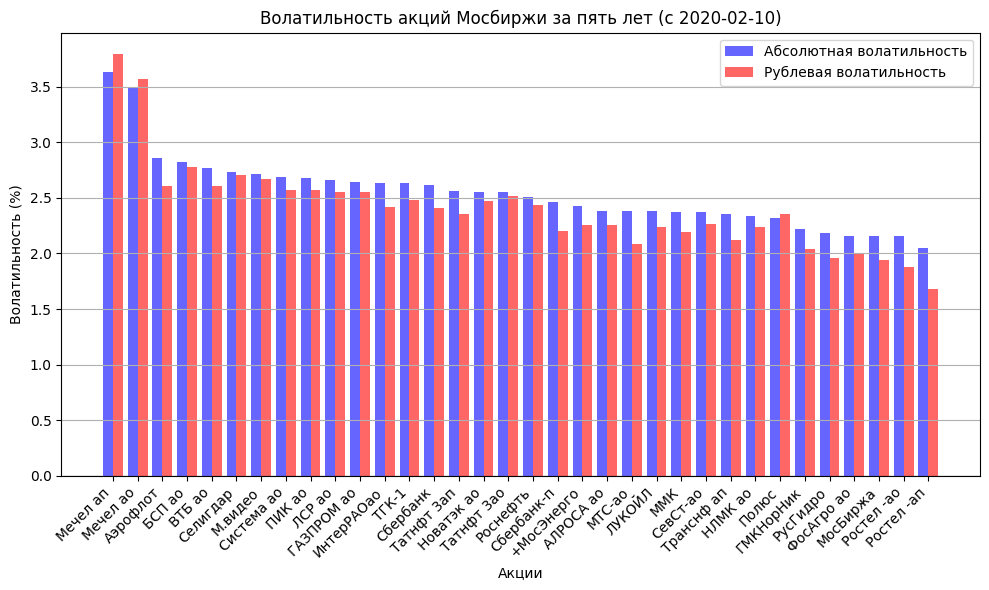

Файл "moex_10y_volatility.png" успешно обновлён!
{'месяц': [{'Ticker': 'TATNP', 'Stock Name': 'Татнфт 3ап', 'Absolute Volatility (%)': 0.9767971134304462, 'Rub Volatility (%)': 0.7200136192716473}, {'Ticker': 'IRAO', 'Stock Name': 'ИнтерРАОао', 'Absolute Volatility (%)': 1.0082151323216335, 'Rub Volatility (%)': 0.5349689904761032}, {'Ticker': 'TATN', 'Stock Name': 'Татнфт 3ао', 'Absolute Volatility (%)': 1.09688391453201, 'Rub Volatility (%)': 0.9578660405873376}, {'Ticker': 'PHOR', 'Stock Name': 'ФосАгро ао', 'Absolute Volatility (%)': 1.1185541456775436, 'Rub Volatility (%)': 1.3141764008157668}, {'Ticker': 'LKOH', 'Stock Name': 'ЛУКОЙЛ', 'Absolute Volatility (%)': 1.1202797644214189, 'Rub Volatility (%)': 0.985979741831064}], 'квартал': [{'Ticker': 'IRAO', 'Stock Name': 'ИнтерРАОао', 'Absolute Volatility (%)': 2.1259824736021846, 'Rub Volatility (%)': 1.3398468753128392}, {'Ticker': 'LKOH', 'Stock Name': 'ЛУКОЙЛ', 'Absolute Volatility (%)': 2.1738758589699168, 'Rub Volatility (%)':

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Создание словаря для хранения данных о волатильности акций по временным диапазонам
volatility_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_absolute_prices = moex_closing_prices_abs_df[moex_closing_prices_abs_df.index >= start_date]
    filtered_rub_prices = moex_closing_prices_rub_df[moex_closing_prices_rub_df.index >= start_date]

    # Создание списка для хранения волатильности
    volatility_data = []

    # Пробегаемся по всем тикерам в словаре moex_stocks_dict
    for ticker in moex_stocks_dict.keys():
        # Получаем цены за выбранный период для абсолютного и рублевого курсов
        period_absolute_prices = filtered_absolute_prices[ticker]
        period_rub_prices = filtered_rub_prices[ticker]

        # Вычисление волатильности для абсолютного курса
        if len(period_absolute_prices) > 1:
            absolute_returns = period_absolute_prices.pct_change().dropna()  # Вычисляем процентные изменения
            absolute_volatility = absolute_returns.std() * 100  # Волатильность в процентах
        else:
            absolute_volatility = 0  # Если данных недостаточно, устанавливаем 0

        # Вычисление волатильности для рублевого курса
        if len(period_rub_prices) > 1:
            rub_returns = period_rub_prices.pct_change().dropna()  # Вычисляем процентные изменения
            rub_volatility = rub_returns.std() * 100  # Волатильность в процентах
        else:
            rub_volatility = 0  # Если данных недостаточно, устанавливаем 0

        # Добавляем результаты в список
        volatility_data.append({
            'Ticker': ticker,
            'Stock Name': moex_stocks_dict[ticker],  # Получаем имя акции из существующего словаря
            'Absolute Volatility (%)': absolute_volatility,
            'Rub Volatility (%)': rub_volatility
        })

    # Создание DataFrame из списка волатильности
    volatility_df = pd.DataFrame(volatility_data)

    # Сортировка по возрастанию абсолютной волатильности, чтобы получить топ акций с минимальной волатильностью
    volatility_sorted = volatility_df.sort_values(by='Absolute Volatility (%)')

    # Сохраняем данные о топ-5 акциях в словарь по текущему период имени (только те, что показали наименьшую волатильность)
    volatility_by_period[period_name] = volatility_sorted.head(5)[['Ticker', 'Stock Name', 'Absolute Volatility (%)', 'Rub Volatility (%)']].to_dict(orient='records')

    # Повторная сортировка по убыванию абсолютной волатильности перед выводом на диаграмму
    volatility_sorted = volatility_sorted.sort_values(by='Absolute Volatility (%)', ascending=False)

    # Установка ширины столбцов и смещения для группировки
    bar_width = 0.4
    index = np.arange(len(volatility_sorted))

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для абсолютной волатильности
    plt.bar(index, volatility_sorted['Absolute Volatility (%)'], bar_width, label='Абсолютная волатильность', color='blue', alpha=0.6)

    # Столбцы для рублевой волатильности, с смещением вправо
    plt.bar(index + bar_width, volatility_sorted['Rub Volatility (%)'], bar_width, label='Рублевая волатильность', color='red', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Волатильность акций Мосбиржи за {period_name} (с {formatted_start_date})')
    plt.xlabel('Акции')
    plt.ylabel('Волатильность (%)')
    
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для группированных столбцов
    plt.xticks(index + bar_width / 2, volatility_sorted['Stock Name'], rotation=45, ha='right')

    plt.legend()
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f"moex_{suffix}_volatility.png"
    
    # Сохранение графика на диск
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь volatility_by_period содержит данные о волатильности акций для использования при генерации JS-файла.
print(volatility_by_period)


In [61]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"moex_{suffix}_volatility.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм волатильности акций
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг волатильности акций за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка акций с наименьшей волатильностью из словаря volatility_by_period
    volatility_data = volatility_by_period.get(period_name, [])

    # Добавление списка акций с наименьшей волатильностью
    js_code += '    var stockList = document.createElement("p");\n'
    js_code += '    stockList.innerHTML = "Топ акции по волатильности: "; \n'
    
    for index, stock in enumerate(volatility_data):
        volatility_percentage = f"{stock['Absolute Volatility (%)']:.2f}"  # Форматирование процента до двух знаков после запятой
        
        if index < len(volatility_data) - 1:
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={stock["Ticker"]}">{stock["Stock Name"]} ({stock["Ticker"]})</a> - {volatility_percentage}%, `;\n'
        else:
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={stock["Ticker"]}">{stock["Stock Name"]} ({stock["Ticker"]})</a> - {volatility_percentage}%  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    stockList.innerHTML = stockList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(stockList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("moex_volatility.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл moex_volatility.js успешно создан.")

# Публикуем файл
pass_file("moex_volatility.js", is_image=False)


JavaScript файл moex_volatility.js успешно создан.
Файл "moex_volatility.js" успешно обновлён!


## Рейтинг по Шарпу акций Мосбиржи

Файл "moex_1m_sharpe_ratios.png" успешно обновлён!
Файл "moex_1q_sharpe_ratios.png" успешно обновлён!
Файл "moex_1y_sharpe_ratios.png" успешно обновлён!
Файл "moex_3y_sharpe_ratios.png" успешно обновлён!
Выводим график для периода: три года


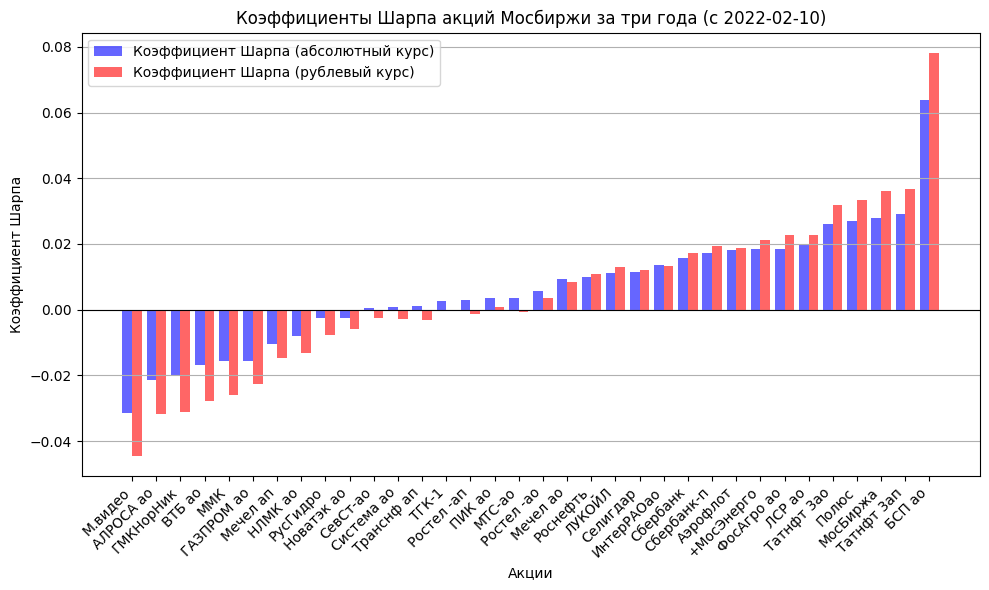

Файл "moex_5y_sharpe_ratios.png" успешно обновлён!
Файл "moex_10y_sharpe_ratios.png" успешно обновлён!
{'месяц': [{'Ticker': 'PLZL', 'Stock Name': 'Полюс', 'Sharpe Ratio Absolute': 0.49021003987195816, 'Sharpe Ratio Rub': 0.5532078517812425}, {'Ticker': 'PHOR', 'Stock Name': 'ФосАгро ао', 'Sharpe Ratio Absolute': 0.4179174604736699, 'Sharpe Ratio Rub': 0.3170092663112526}, {'Ticker': 'TATN', 'Stock Name': 'Татнфт 3ао', 'Sharpe Ratio Absolute': 0.3900463260389418, 'Sharpe Ratio Rub': 0.37810020273773504}, {'Ticker': 'NVTK', 'Stock Name': 'Новатэк ао', 'Sharpe Ratio Absolute': 0.3726705875528568, 'Sharpe Ratio Rub': 0.39108860253526845}, {'Ticker': 'TATNP', 'Stock Name': 'Татнфт 3ап', 'Sharpe Ratio Absolute': 0.36610929538971565, 'Sharpe Ratio Rub': 0.3771604815254659}], 'квартал': [{'Ticker': 'PHOR', 'Stock Name': 'ФосАгро ао', 'Sharpe Ratio Absolute': 0.1464357263983993, 'Sharpe Ratio Rub': 0.2215099791835977}, {'Ticker': 'PLZL', 'Stock Name': 'Полюс', 'Sharpe Ratio Absolute': 0.126185

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Создание словаря для хранения данных о коэффициенте Шарпа акций по временным диапазонам
sharpe_ratios_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_absolute_prices = moex_closing_prices_abs_df[moex_closing_prices_abs_df.index >= start_date]
    filtered_rub_prices = moex_closing_prices_rub_df[moex_closing_prices_rub_df.index >= start_date]

    # Создание списка для хранения коэффициентов Шарпа
    sharpe_ratios = []

    # Пробегаемся по всем тикерам в словаре moex_stocks_dict
    for ticker in moex_stocks_dict.keys():
        # Получаем цены за выбранный период для абсолютного и рублевого курсов
        period_absolute_prices = filtered_absolute_prices[ticker]
        period_rub_prices = filtered_rub_prices[ticker]

        # Вычисление коэффициента Шарпа для абсолютного курса
        if len(period_absolute_prices) > 1:
            absolute_returns = period_absolute_prices.pct_change().dropna()  # Вычисляем процентные изменения
            average_absolute_return = absolute_returns.mean()  # Средняя доходность
            volatility_absolute = absolute_returns.std()  # Стандартное отклонение доходности

            # Коэффициент Шарпа для абсолютного курса
            sharpe_ratio_absolute = (average_absolute_return - 0) / volatility_absolute if volatility_absolute > 0 else 0
        else:
            sharpe_ratio_absolute = 0  # Если данных недостаточно, устанавливаем 0

        # Вычисление коэффициента Шарпа для рублевого курса
        if len(period_rub_prices) > 1:
            rub_returns = period_rub_prices.pct_change().dropna()  # Вычисляем процентные изменения
            average_rub_return = rub_returns.mean()  # Средняя доходность
            volatility_rub = rub_returns.std()  # Стандартное отклонение доходности

            # Коэффициент Шарпа для рублевого курса
            sharpe_ratio_rub = (average_rub_return - 0) / volatility_rub if volatility_rub > 0 else 0
        else:
            sharpe_ratio_rub = 0  # Если данных недостаточно, устанавливаем 0

        # Добавляем результаты в список
        sharpe_ratios.append({
            'Ticker': ticker,
            'Stock Name': moex_stocks_dict[ticker],  # Получаем имя акции из существующего словаря
            'Sharpe Ratio Absolute': sharpe_ratio_absolute,
            'Sharpe Ratio Rub': sharpe_ratio_rub
        })

    # Создание DataFrame из списка коэффициентов Шарпа
    sharpe_ratios_df = pd.DataFrame(sharpe_ratios)

    # Сортировка по убыванию коэффициента Шарпа (абсолютный курс), чтобы получить топ акций по этому показателю
    sharpe_ratios_sorted = sharpe_ratios_df.sort_values(by='Sharpe Ratio Absolute', ascending=False)

    # Сохраняем данные о топ-5 акциях в словарь по текущему период имени (только те, что показали наибольший коэффициент Шарпа)
    sharpe_ratios_by_period[period_name] = sharpe_ratios_sorted.head(5)[['Ticker', 'Stock Name', 'Sharpe Ratio Absolute', 'Sharpe Ratio Rub']].to_dict(orient='records')

    # Повторная сортировка по возрастанию перед выводом на диаграмму (для визуализации)
    sharpe_ratios_sorted = sharpe_ratios_sorted.sort_values(by='Sharpe Ratio Absolute')

    # Установка ширины столбцов и смещения для группировки
    bar_width = 0.4
    index = np.arange(len(sharpe_ratios_sorted))

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для коэффициента Шарпа (абсолютный курс)
    plt.bar(index, sharpe_ratios_sorted['Sharpe Ratio Absolute'], bar_width, label='Коэффициент Шарпа (абсолютный курс)', color='blue', alpha=0.6)

    # Столбцы для коэффициента Шарпа (рублевый курс), с смещением вправо
    plt.bar(index + bar_width, sharpe_ratios_sorted['Sharpe Ratio Rub'], bar_width, label='Коэффициент Шарпа (рублевый курс)', color='red', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Коэффициенты Шарпа акций Мосбиржи за {period_name} (с {formatted_start_date})')
    plt.xlabel('Акции')
    plt.ylabel('Коэффициент Шарпа')
    
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для группированных столбцов
    plt.xticks(index + bar_width / 2, sharpe_ratios_sorted['Stock Name'], rotation=45, ha='right')

    plt.legend()
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f"moex_{suffix}_sharpe_ratios.png"
    
    # Сохранение графика на диск
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь sharpe_ratios_by_period содержит данные о коэффициентах Шарпа акций для использования при генерации JS-файла.
print(sharpe_ratios_by_period)


In [63]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"moex_{suffix}_sharpe_ratios.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм коэффициента Шарпа акций
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг коэффициента Шарпа акций за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка акций с положительным коэффициентом Шарпа из словаря sharpe_ratios_by_period
    sharpe_ratios = sharpe_ratios_by_period.get(period_name, [])

    # Фильтрация акций с положительным коэффициентом Шарпа
    positive_sharpe_ratios = [stock for stock in sharpe_ratios if stock['Sharpe Ratio Absolute'] > 0]

    # Добавление списка акций с положительным коэффициентом Шарпа
    js_code += '    var stockList = document.createElement("p");\n'
    js_code += '    stockList.innerHTML = "Топ акции по коэффициенту Шарпа: "; \n'
    
    for index, stock in enumerate(positive_sharpe_ratios):
        sharpe_ratio_value = f"{stock['Sharpe Ratio Absolute']:.2f}"  # Форматирование коэффициента до двух знаков после запятой
        
        if index < len(positive_sharpe_ratios) - 1:
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={stock["Ticker"]}">{stock["Stock Name"]} ({stock["Ticker"]})</a> - {sharpe_ratio_value}, `;\n'
        else:
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={stock["Ticker"]}">{stock["Stock Name"]} ({stock["Ticker"]})</a> - {sharpe_ratio_value}  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    stockList.innerHTML = stockList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(stockList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("moex_sharpe_ratios.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл moex_sharpe_ratios.js успешно создан.")

# Публикуем файл
pass_file("moex_sharpe_ratios.js", is_image=False)


JavaScript файл moex_sharpe_ratios.js успешно создан.
Файл "moex_sharpe_ratios.js" успешно обновлён!


## Рейтинг по Сортино акций Мосбиржи

В данном разделе представлены графики, отображающие рейтинг акций Московской биржи по коэффициенту Сортино, который является важным показателем эффективности инвестиций. Коэффициент Сортино позволяет оценить доходность инвестиционного портфеля в отношении его риска, при этом учитываются только отрицательные отклонения доходности, что делает его полезным инструментом для инвесторов.

Коэффициент рассчитывается как отношение избыточной доходности к стандартному отклонению отрицательных доходностей. Это позволяет выявить, насколько хорошо портфель компенсирует риск: чем выше значение коэффициента, тем более привлекательной считается инвестиция. Графики сортируются по возрастанию коэффициента Сортино, что позволяет легко идентифицировать акции с наименьшим риском и лучшими показателями доходности. В правой части диаграмм расположены самые привлекательные для инвестирования акции, что упрощает их выбор.

Каждая диаграмма соответствует определённому временно́му периоду и предоставляет информацию о том, какие акции обеспечивают наилучшие результаты при минимальных рисках. Под диаграммами находятся списки акций с лучшим коэффициентом Сортино по абсолютному курсу, содержащие ссылки на детали каждой акции и значения коэффициента. Раздел служит полезным инструментом для анализа и выбора оптимальных инвестиционных стратегий на основе соотношения риска и доходности.

См. на сайте [https://www.abscur.ru/p/blog-page_75.html](https://www.abscur.ru/p/blog-page_75.html)

Файл "moex_1m_sortino_ratios.png" успешно обновлён!
Выводим график для периода: месяц


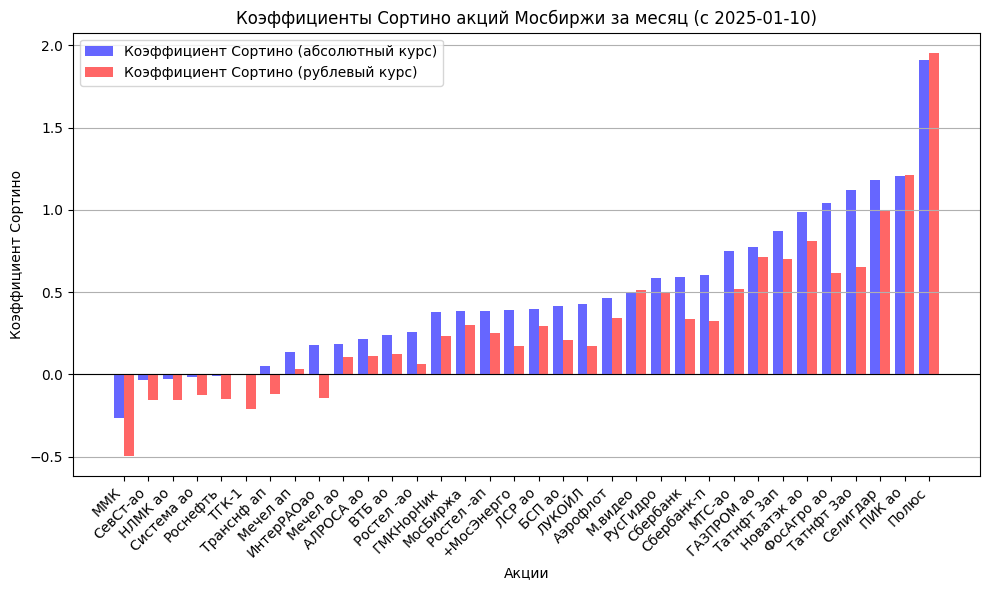

Файл "moex_1q_sortino_ratios.png" успешно обновлён!
Файл "moex_1y_sortino_ratios.png" успешно обновлён!
Файл "moex_3y_sortino_ratios.png" успешно обновлён!
Файл "moex_5y_sortino_ratios.png" успешно обновлён!
Файл "moex_10y_sortino_ratios.png" успешно обновлён!
{'месяц': [{'Ticker': 'PLZL', 'Stock Name': 'Полюс', 'Sortino Ratio Absolute': 1.9083819082682913, 'Sortino Ratio Rub': 1.955518557911905}, {'Ticker': 'PIKK', 'Stock Name': 'ПИК ао', 'Sortino Ratio Absolute': 1.2055660561917905, 'Sortino Ratio Rub': 1.2141492300495997}, {'Ticker': 'SELG', 'Stock Name': 'Селигдар', 'Sortino Ratio Absolute': 1.1838106887902977, 'Sortino Ratio Rub': 0.9906026999857801}, {'Ticker': 'TATN', 'Stock Name': 'Татнфт 3ао', 'Sortino Ratio Absolute': 1.1221823074829862, 'Sortino Ratio Rub': 0.6541807949514286}, {'Ticker': 'PHOR', 'Stock Name': 'ФосАгро ао', 'Sortino Ratio Absolute': 1.0420789915500746, 'Sortino Ratio Rub': 0.6152886135602571}], 'квартал': [{'Ticker': 'PHOR', 'Stock Name': 'ФосАгро ао', 'Sort

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Создание словаря для хранения данных о коэффициенте Сортино акций по временным диапазонам
sortino_ratios_by_period = {}

# Генерируем случайный период из списка периодов
random_period_name = random.choice(list(ago_dates.keys()))

# Создание графиков для каждого временного диапазона
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_absolute_prices = moex_closing_prices_abs_df[moex_closing_prices_abs_df.index >= start_date]
    filtered_rub_prices = moex_closing_prices_rub_df[moex_closing_prices_rub_df.index >= start_date]

    # Создание списка для хранения коэффициентов Сортино
    sortino_ratios = []

    # Пробегаемся по всем тикерам в словаре moex_stocks_dict
    for ticker in moex_stocks_dict.keys():
        # Получаем цены за выбранный период для абсолютного и рублевого курсов
        period_absolute_prices = filtered_absolute_prices[ticker]
        period_rub_prices = filtered_rub_prices[ticker]

        # Вычисление коэффициента Сортино для абсолютного курса
        if len(period_absolute_prices) > 1:
            absolute_returns = period_absolute_prices.pct_change().dropna()  # Вычисляем процентные изменения
            average_absolute_return = absolute_returns.mean()  # Средняя доходность
            downside_deviation = np.sqrt(np.mean(np.minimum(0, absolute_returns)**2))  # Стандартное отклонение отрицательных доходностей

            # Коэффициент Сортино для абсолютного курса
            sortino_ratio_absolute = (average_absolute_return - 0) / downside_deviation if downside_deviation > 0 else 0
        else:
            sortino_ratio_absolute = 0  # Если данных недостаточно, устанавливаем 0

        # Вычисление коэффициента Сортино для рублевого курса
        if len(period_rub_prices) > 1:
            rub_returns = period_rub_prices.pct_change().dropna()  # Вычисляем процентные изменения
            average_rub_return = rub_returns.mean()  # Средняя доходность
            downside_deviation_rub = np.sqrt(np.mean(np.minimum(0, rub_returns)**2))  # Стандартное отклонение отрицательных доходностей

            # Коэффициент Сортино для рублевого курса
            sortino_ratio_rub = (average_rub_return - 0) / downside_deviation_rub if downside_deviation_rub > 0 else 0
        else:
            sortino_ratio_rub = 0  # Если данных недостаточно, устанавливаем 0

        # Добавляем результаты в список
        sortino_ratios.append({
            'Ticker': ticker,
            'Stock Name': moex_stocks_dict[ticker],  # Получаем имя акции из существующего словаря
            'Sortino Ratio Absolute': sortino_ratio_absolute,
            'Sortino Ratio Rub': sortino_ratio_rub
        })

    # Создание DataFrame из списка коэффициентов Сортино
    sortino_ratios_df = pd.DataFrame(sortino_ratios)

    # Сортировка по убыванию коэффициента Сортино (абсолютный курс), чтобы получить топ акций по этому показателю
    sortino_ratios_sorted = sortino_ratios_df.sort_values(by='Sortino Ratio Absolute', ascending=False)

    # Сохраняем данные о топ-5 акциях в словарь по текущему период имени (только те, что показали наибольший коэффициент Сортино)
    sortino_ratios_by_period[period_name] = sortino_ratios_sorted.head(5)[['Ticker', 'Stock Name', 'Sortino Ratio Absolute', 'Sortino Ratio Rub']].to_dict(orient='records')

    # Повторная сортировка по возрастанию перед выводом на диаграмму (для визуализации)
    sortino_ratios_sorted = sortino_ratios_sorted.sort_values(by='Sortino Ratio Absolute')

    # Установка ширины столбцов и смещения для группировки
    bar_width = 0.4
    index = np.arange(len(sortino_ratios_sorted))

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))

    # Столбцы для коэффициента Сортино (абсолютный курс)
    plt.bar(index, sortino_ratios_sorted['Sortino Ratio Absolute'], bar_width, label='Коэффициент Сортино (абсолютный курс)', color='blue', alpha=0.6)

    # Столбцы для коэффициента Сортино (рублевый курс), с смещением вправо
    plt.bar(index + bar_width, sortino_ratios_sorted['Sortino Ratio Rub'], bar_width, label='Коэффициент Сортино (рублевый курс)', color='red', alpha=0.6)

    # Настройка графика с добавлением даты начала периода в заголовок (без времени)
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты
    plt.title(f'Коэффициенты Сортино акций Мосбиржи за {period_name} (с {formatted_start_date})')
    plt.xlabel('Акции')
    plt.ylabel('Коэффициент Сортино')
    
    plt.axhline(0, color='black', linewidth=0.8)  # Горизонтальная линия на уровне 0%
    
    # Подписи по оси X для группированных столбцов
    plt.xticks(index + bar_width / 2, sortino_ratios_sorted['Stock Name'], rotation=45, ha='right')

    plt.legend()
    plt.grid(axis='y')

    # Формирование имени файла и сохранение графика на диск
    suffix = period_suffix[period_name]  # Используем существующий словарь period_suffix
    
    filename = f"moex_{suffix}_sortino_ratios.png"
    
    # Сохранение графика на диск
    plt.savefig(filename, dpi=75)

    # Публикуем график на сайте
    pass_file(filename)

    # Проверка на совпадение случайного периода перед выводом графика
    if random_period_name == period_name:
        print(f"Выводим график для периода: {period_name}")
        plt.tight_layout()
        plt.show()
    else:
        plt.close()  # Закрываем текущий график, если периоды не совпадают

# Теперь словарь sortino_ratios_by_period содержит данные о коэффициентах Сортино акций для использования при генерации JS-файла.
print(sortino_ratios_by_period)


In [65]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = [f"moex_{suffix}_sortino_ratios.png" for suffix in period_suffix.values()]

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм коэффициента Сортино акций
document.addEventListener("DOMContentLoaded", function() {
    var container = document.getElementById("charts-container");
"""

for period_name, filename in zip(period_suffix.keys(), image_filenames):
    # Добавление заголовка для каждого временного диапазона
    js_code += f'    var h2 = document.createElement("h2");\n'
    js_code += f'    h2.innerText = "Рейтинг коэффициента Сортино акций за {period_name}";\n'
    js_code += '    container.appendChild(h2);\n'

    # Добавление изображения диаграммы
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Получение списка акций с положительным коэффициентом Сортино из словаря sortino_ratios_by_period
    sortino_ratios = sortino_ratios_by_period.get(period_name, [])

    # Фильтрация акций с положительным коэффициентом Сортино
    positive_sortino_ratios = [stock for stock in sortino_ratios if stock['Sortino Ratio Absolute'] > 0]

    # Добавление списка акций с положительным коэффициентом Сортино
    js_code += '    var stockList = document.createElement("p");\n'
    js_code += '    stockList.innerHTML = "Топ акции по коэффициенту Сортино: "; \n'
    
    for index, stock in enumerate(positive_sortino_ratios):
        sortino_ratio_value = f"{stock['Sortino Ratio Absolute']:.2f}"  # Форматирование коэффициента до двух знаков после запятой
        
        if index < len(positive_sortino_ratios) - 1:
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={stock["Ticker"]}">{stock["Stock Name"]} ({stock["Ticker"]})</a> - {sortino_ratio_value}, `;\n'
        else:
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={stock["Ticker"]}">{stock["Stock Name"]} ({stock["Ticker"]})</a> - {sortino_ratio_value}  `;\n'

    # Удаление последней запятой (если она есть)
    js_code += '    stockList.innerHTML = stockList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
    
    js_code += '    container.appendChild(stockList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("moex_sortino_ratios.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл moex_sortino_ratios.js успешно создан.")

# Публикуем файл
pass_file("moex_sortino_ratios.js", is_image=False)


JavaScript файл moex_sortino_ratios.js успешно создан.
Файл "moex_sortino_ratios.js" успешно обновлён!


## Портфель по Шарпу для акций Мосбиржи

В данном разделе представлены графики, отображающие рейтинг акционных портфелей по коэффициенту Шарпа, который является важным инструментом для оценки инвестиционной эффективности с учетом риска. Коэффициент Шарпа позволяет инвесторам анализировать доходность активов, учитывая волатильность и риск убытков, что делает его незаменимым для формирования сбалансированных инвестиционных стратегий.

Каждый график в этом разделе иллюстрирует результаты оптимизации акционных портфелей на основе исторических данных, выраженных в абсолютных курсах акций. Это означает, что все расчеты и визуализации основаны на фактических ценах акций, что позволяет более точно оценить их поведение на рынке. Для каждого временного диапазона представлены три ключевых графика:

1. График риск-доходность: Этот график показывает соотношение между риском (стандартным отклонением) и средней доходностью различных акционных портфелей. Точки на графике представляют случайно сгенерированные портфели, а выделенная точка указывает на оптимальный портфель с наивысшим коэффициентом Шарпа.

2. График стоимости портфеля: Этот график демонстрирует динамику абсолютной стоимости оптимального акционного портфеля в процентах относительно начальной стоимости. Портфели моделируются по методике "бери и держи", что подразумевает удержание активов в течение всего временного периода без активной торговли. Этот подход позволяет визуализировать, как изменялась стоимость портфеля на протяжении выбранного временного периода.

3. График долей активов в портфеле: Этот столбчатый график показывает распределение долей различных акций в оптимальном портфеле. Он помогает инвесторам понять, какие акции составляют основу их инвестиционной стратегии и в каких пропорциях они представлены.

Под диаграммами с долями выводятся списки акций с наибольшими долями в портфеле, содержащие гиперссылки на страницы с графиками этих акций. Это позволяет инвесторам быстро получить доступ к дополнительной информации о конкретных активах.

Каждая серия графиков сопровождается подзаголовком, который указывает на временной диапазон и дату начала анализа. Этот раздел служит полезным инструментом для анализа рынка и принятия обоснованных решений в области торговли и инвестиций, позволяя инвесторам выбирать наиболее подходящие активы для своих портфелей с учетом риска и доходности.

См. на сайте [https://www.abscur.ru/p/blog-page_53.html](https://www.abscur.ru/p/blog-page_53.html)

Файл "moex_sharpe_risk_return_1m.png" успешно обновлён!
Файл "moex_sharpe_value_1m.png" успешно обновлён!
Файл "moex_sharpe_parts_1m.png" успешно обновлён!
Файл "moex_sharpe_risk_return_1q.png" успешно обновлён!
Файл "moex_sharpe_value_1q.png" успешно обновлён!
Файл "moex_sharpe_parts_1q.png" успешно обновлён!
Файл "moex_sharpe_risk_return_1y.png" успешно обновлён!
Файл "moex_sharpe_value_1y.png" успешно обновлён!
Файл "moex_sharpe_parts_1y.png" успешно обновлён!
Файл "moex_sharpe_risk_return_3y.png" успешно обновлён!
Файл "moex_sharpe_value_3y.png" успешно обновлён!
Файл "moex_sharpe_parts_3y.png" успешно обновлён!
Файл "moex_sharpe_risk_return_5y.png" успешно обновлён!
Файл "moex_sharpe_value_5y.png" успешно обновлён!
Файл "moex_sharpe_parts_5y.png" успешно обновлён!
Файл "moex_sharpe_risk_return_10y.png" успешно обновлён!


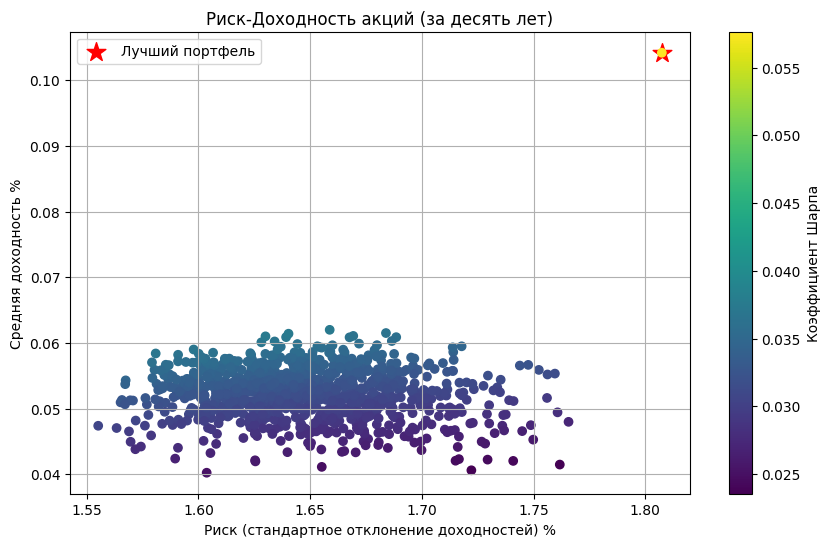

Файл "moex_sharpe_value_10y.png" успешно обновлён!


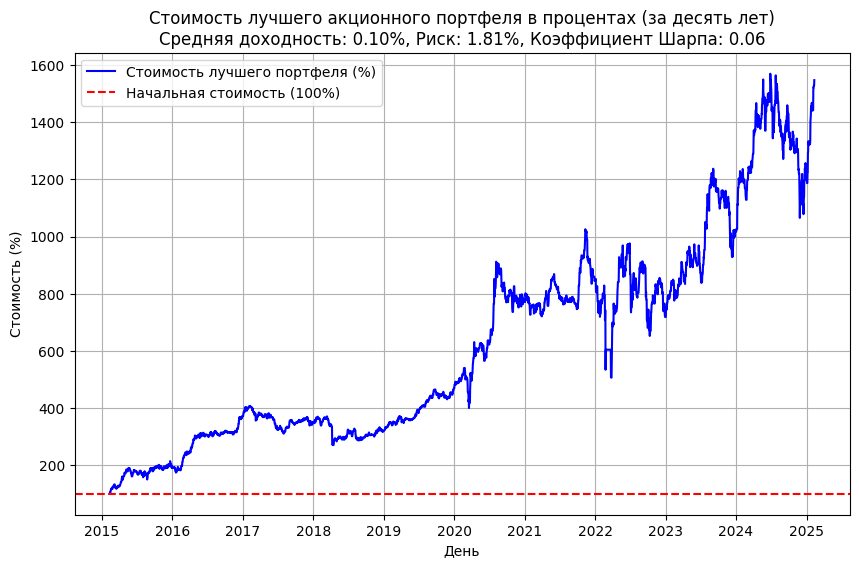

Файл "moex_sharpe_parts_10y.png" успешно обновлён!


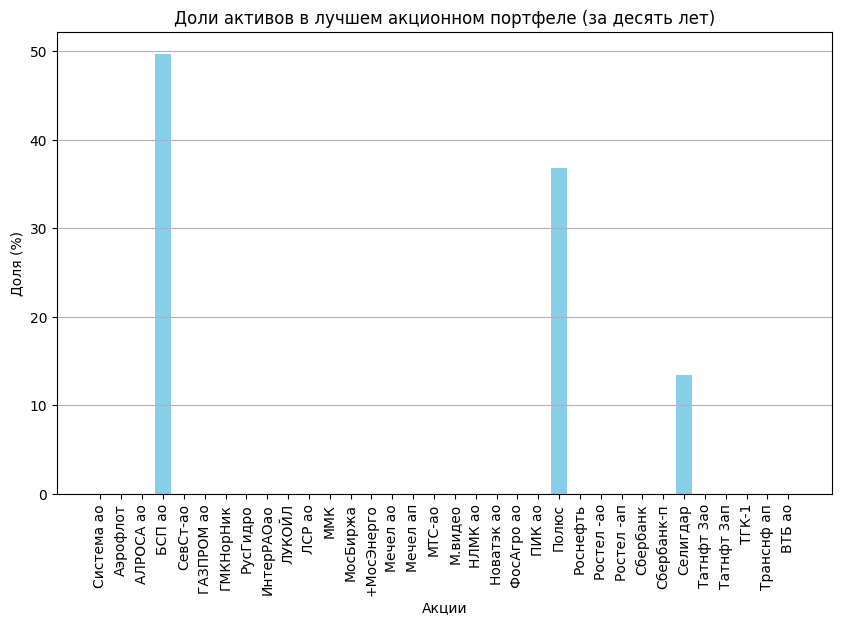

{'месяц': [('PHOR', 'ФосАгро ао', 34.663471085174194),
  ('TATN', 'Татнфт 3ао', 26.848703182594285),
  ('PLZL', 'Полюс', 26.43208781228315),
  ('GAZP', 'ГАЗПРОМ ао', 6.422344326152762)],
 'квартал': [('PHOR', 'ФосАгро ао', 50.49992064240249),
  ('PLZL', 'Полюс', 33.747391751769335),
  ('PIKK', 'ПИК ао', 15.752687605828244)],
 'год': [('PLZL', 'Полюс', 69.65702891637818),
  ('AFLT', 'Аэрофлот', 30.342971083621826)],
 'три года': [('BSPB', 'БСП ао', 96.55625378492911)],
 'пять лет': [('BSPB', 'БСП ао', 72.28856200384058),
  ('PHOR', 'ФосАгро ао', 20.916850745529644)],
 'десять лет': [('BSPB', 'БСП ао', 49.72524164715552),
  ('PLZL', 'Полюс', 36.828719189126815),
  ('SELG', 'Селигдар', 13.446039163717668)]}

In [66]:
from github_lib_abscur2 import pass_file
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize

# Выбор случайного периода
random_period = random.choice(list(ago_dates.keys()))

# Функция для расчета средней доходности и риска портфеля с методом "взял и держи"
def portfolio_performance(weights, cumulative_returns):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    # Дневная средняя доходность и стандартное отклонение по доходности
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    portfolio_std_dev = np.std(daily_returns)  # стандартное отклонение (риск)
    
    return portfolio_mean_return, portfolio_std_dev  # возвращаем среднюю доходность и риск

# Функция для расчета коэффициента Шарпа
def sharpe_ratio(weights, cumulative_returns, risk_free_rate=0):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    portfolio_volatility = np.std(daily_returns)  # стандартное отклонение доходности
    
    if portfolio_volatility == 0:
        return -np.inf  # Если волатильность равна 0, возвращаем отрицательную бесконечность (максимальный коэффициент)
    
    return (portfolio_mean_return - risk_free_rate) / portfolio_volatility  # Коэффициент Шарпа

# Функция для минимизации коэффициента Шарпа (отрицательное значение)
def neg_sharpe_ratio(weights, cumulative_returns):
    return -sharpe_ratio(weights, cumulative_returns)  # Возвращаем отрицательное значение коэффициента Шарпа

# Словарь для хранения акций и их долей по диапазонам
portfolio_weights_by_period = {}

# Основной цикл по диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по текущему диапазону для акций
    filtered_data = moex_closing_prices_abs_df[moex_closing_prices_abs_df.index >= start_date]
    
    if filtered_data.empty:
        print(f"Нет данных для диапазона {period_name} начиная с {start_date}.")
        continue

    returns = np.diff(filtered_data.to_numpy(), axis=0) / filtered_data.to_numpy()[:-1]  # относительные изменения

    # Вычисляем кумулятивные доходности один раз
    cumulative_returns = np.cumprod(1 + returns, axis=0)  # кумулятивные доходности

    num_portfolios = 1000
    num_assets = filtered_data.shape[1]
    results = np.zeros((3, num_portfolios + 1))

    best_random_weights = None
    
    # Генерация портфелей и расчет их характеристик
    for i in range(num_portfolios):
        random_weights = np.random.rand(num_assets)  # генерируем случайный ряд
        random_weights /= np.sum(random_weights)  # Нормализуем веса так, чтобы они в сумме давали единицу
        
        portfolio_mean_return, portfolio_volatility = portfolio_performance(random_weights, cumulative_returns)
        results[0, i] = portfolio_mean_return
        results[1, i] = portfolio_volatility
        results[2, i] = sharpe_ratio(random_weights, cumulative_returns)

        if best_random_weights is None or results[2, i] >= results[2].max():
            best_random_weights = random_weights
    
    # Оптимизация портфеля с использованием scipy.optimize.minimize с ограничениями
    initial_weights = best_random_weights.copy()  # Начальные веса как лучшие случайные веса
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},   # Сумма весов должна быть равна 1
        {'type': 'ineq', 'fun': lambda x: x}              # Все веса должны быть неотрицательными
    )

    optimal_solution = minimize(neg_sharpe_ratio, initial_weights,
                                args=(cumulative_returns,),
                                constraints=constraints)
    
    best_weights = optimal_solution.x  # Оптимальные веса портфеля
    
    best_portfolio_value = cumulative_returns @ best_weights
    
    best_portfolio_return, best_portfolio_volatility = portfolio_performance(best_weights, cumulative_returns)
    
    results[0, -1] = best_portfolio_return
    results[1, -1] = best_portfolio_volatility
    results[2, -1] = sharpe_ratio(best_weights, cumulative_returns)
    
    # Преобразование стоимости в проценты относительно начальной стоимости 
    best_portfolio_value_percent = best_portfolio_value * 100 
    
    dates = moex_closing_prices_abs_df.index[-len(best_portfolio_value):]
    
    plt.figure(figsize=(10,6))
    plt.scatter(best_portfolio_volatility * 100,best_portfolio_return * 100,color='red', marker='*', s=200,label='Лучший портфель')
    plt.scatter(results[1, :] * 100, results[0, :] * 100, c=results[2, :], cmap='viridis', marker='o')
    plt.title(f'Риск-Доходность акций (за {period_name})')
    plt.xlabel('Риск (стандартное отклонение доходностей) %')
    plt.ylabel('Средняя доходность %')
    plt.colorbar(label='Коэффициент Шарпа')
    plt.legend()
    plt.grid()
    
    file_name_risk_return=f'moex_sharpe_risk_return_{period_suffix[period_name]}.png'
    plt.savefig(file_name_risk_return,dpi=75)
    
    pass_file(file_name_risk_return)
    
    if period_name == random_period:
       plt.show()
    else:
       plt.close()
    
    sharpe_ratio_value=sharpe_ratio(best_weights,cumulative_returns)
    
    plt.figure(figsize=(10,6))
    plt.plot(dates,best_portfolio_value_percent,label='Стоимость лучшего портфеля (%)',color='blue')
    plt.title(f'Стоимость лучшего акционного портфеля в процентах (за {period_name})\n'
             f'Средняя доходность: {best_portfolio_return * 100:.2f}%, '
             f'Риск: {best_portfolio_volatility * 100:.2f}%, '
             f'Коэффициент Шарпа: {sharpe_ratio_value:.2f}')
    plt.xlabel('День')
    plt.ylabel('Стоимость (%)')
    plt.axhline(y=100,color='r',linestyle='--',label='Начальная стоимость (100%)') 
    plt.legend()
    plt.grid()
    
    file_name_value=f'moex_sharpe_value_{period_suffix[period_name]}.png'
    plt.savefig(file_name_value,dpi=75)
    
    pass_file(file_name_value)
    
    if period_name == random_period:
       plt.show()
    else:
       plt.close()
    
    best_weights_percent=best_weights * 100 
    
    asset_labels=[moex_stocks_dict[ticker] for ticker in moex_closing_prices_abs_df.columns.tolist()] 
    
    # Сохранение акций и их долей в словаре для дальнейшего использования
    stock_weight_dict = dict(zip(asset_labels, best_weights_percent))
    
    # Отбор акций с наибольшими долями до достижения суммы в 90%
    sorted_stocks = sorted(stock_weight_dict.items(), key=lambda x: x[1], reverse=True)
    
    cumulative_percentage = 0
    selected_stocks_list = []
    
    for stock_name, weight in sorted_stocks:
       if cumulative_percentage < 90:
           selected_stocks_list.append((stock_name, weight))
           cumulative_percentage += weight
    
    # Визуализация долей активов в лучшем акционном портфеле
    plt.figure(figsize=(10,6))
    plt.bar(asset_labels,best_weights_percent,color='skyblue')
    plt.title(f'Доли активов в лучшем акционном портфеле (за {period_name})')
    plt.xlabel('Акции')
    plt.ylabel('Доля (%)')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    
    file_name_parts=f'moex_sharpe_parts_{period_suffix[period_name]}.png'
    plt.savefig(file_name_parts,dpi=75)
    
    pass_file(file_name_parts)
    
    if period_name == random_period:
       plt.show()
    else:
       plt.close()
    
    # Сохранение информации о выбранных акциях и их долях для дальнейшего использования в JS-файле,
    # включая тикеры для гиперссылок.
    portfolio_weights_by_period[period_name] = [(ticker, name, weight) for name, weight in selected_stocks_list 
                                                for ticker in moex_stocks_dict.keys() 
                                                if moex_stocks_dict[ticker] == name]

portfolio_weights_by_period

In [67]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = []

# Генерация имен файлов для акционных портфелей по Шарпу
for period_name, start_date in ago_dates.items():
    suffix = period_suffix[period_name]
    # Форматируем дату с помощью pandas
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты без времени
    image_filenames.append((period_name, formatted_start_date, f'moex_sharpe_risk_return_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'moex_sharpe_value_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'moex_sharpe_parts_{suffix}.png'))

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм акционных портфелей по коэффициенту Шарпа
document.addEventListener("DOMContentLoaded", function() {
    const container = document.getElementById("charts-container");
"""

# Добавление изображений и подзаголовков
current_period_name = None

for period_name, start_date, filename in image_filenames:
    # Добавление подзаголовка только в начале новой серии
    if current_period_name != period_name:
        current_period_name = period_name
        js_code += f'    var header = document.createElement("p");\n'
        js_code += f'    header.innerHTML = "<strong>За {period_name} (начало: {start_date})</strong>";\n'
        js_code += '    container.appendChild(header);\n'
    
    # Добавление изображения
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Если это диаграмма с долями активов, добавляем список акций
    if "parts" in filename:
        stocks_info = portfolio_weights_by_period[period_name]
        
        # Добавление списка акций с долями
        js_code += '    var stockList = document.createElement("p");\n'
        js_code += '    stockList.innerHTML = "<strong>Топ акции по долям в портфеле:</strong> "; \n'
        
        for ticker, name, weight in stocks_info:
            weight_formatted = f"{weight:.2f}"  # Форматирование доли до двух знаков после запятой
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={ticker}">{name} ({ticker})</a> - {weight_formatted}%, `;\n'

        # Удаление последней запятой (если она есть)
        js_code += '    stockList.innerHTML = stockList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
        
        js_code += '    container.appendChild(stockList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("moex_sharpe_portfolio_ratios.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл moex_sharpe_portfolio_ratios.js успешно создан.")

# Публикуем файл
pass_file("moex_sharpe_portfolio_ratios.js", is_image=False)


JavaScript файл moex_sharpe_portfolio_ratios.js успешно создан.
Файл "moex_sharpe_portfolio_ratios.js" успешно обновлён!


## Портфель по Сортино для акций Мосбиржи

В данном разделе представлены графики, отображающие рейтинг акционных портфелей по коэффициенту Сортино, который является важным инструментом для оценки инвестиционной эффективности с учетом риска. Коэффициент Сортино позволяет инвесторам анализировать доходность активов, учитывая волатильность и риск убытков, что делает его незаменимым для формирования сбалансированных инвестиционных стратегий.

Каждый график в этом разделе иллюстрирует результаты оптимизации акционных портфелей на основе исторических данных, выраженных в абсолютных курсах акций. Это означает, что все расчеты и визуализации основаны на фактических ценах акций, что позволяет более точно оценить их поведение на рынке. Для каждого временного диапазона представлены три ключевых графика:

1. График риск-доходность: Этот график показывает соотношение между риском (стандартным отклонением негативных доходностей) и средней доходностью различных акционных портфелей. Точки на графике представляют случайно сгенерированные портфели, а выделенная точка указывает на оптимальный портфель с наивысшим коэффициентом Сортино.

2. График стоимости портфеля: Этот график демонстрирует динамику абсолютной стоимости оптимального акционного портфеля в процентах относительно начальной стоимости. Портфели моделируются по методике "бери и держи", что подразумевает удержание активов в течение всего временного периода без активной торговли. Этот подход позволяет визуализировать, как изменялась стоимость портфеля на протяжении выбранного временного периода.

3. График долей активов в портфеле: Этот столбчатый график показывает распределение долей различных акций в оптимальном портфеле. Он помогает инвесторам понять, какие акции составляют основу их инвестиционной стратегии и в каких пропорциях они представлены. Под диаграммами с долями выводятся списки акций с наибольшими долями в портфеле, содержащие гиперссылки на страницы с графиками этих акций. Это позволяет инвесторам быстро получить доступ к дополнительной информации о конкретных активах.

Каждая серия графиков сопровождается подзаголовком, который указывает на временной диапазон и дату начала анализа. Этот раздел служит полезным инструментом для анализа рынка и принятия обоснованных решений в области торговли и инвестиций, позволяя инвесторам выбирать наиболее подходящие активы для своих портфелей с учетом риска и доходности.

См. на сайте [https://www.abscur.ru/p/blog-page_86.html](https://www.abscur.ru/p/blog-page_86.html)

Файл "moex_sortino_risk_return_1m.png" успешно обновлён!
Файл "moex_sortino_value_1m.png" успешно обновлён!
Файл "moex_sortino_parts_1m.png" успешно обновлён!
Файл "moex_sortino_risk_return_1q.png" успешно обновлён!
Файл "moex_sortino_value_1q.png" успешно обновлён!
Файл "moex_sortino_parts_1q.png" успешно обновлён!
Файл "moex_sortino_risk_return_1y.png" успешно обновлён!
Файл "moex_sortino_value_1y.png" успешно обновлён!
Файл "moex_sortino_parts_1y.png" успешно обновлён!
Файл "moex_sortino_risk_return_3y.png" успешно обновлён!
Файл "moex_sortino_value_3y.png" успешно обновлён!
Файл "moex_sortino_parts_3y.png" успешно обновлён!
Файл "moex_sortino_risk_return_5y.png" успешно обновлён!
Файл "moex_sortino_value_5y.png" успешно обновлён!
Файл "moex_sortino_parts_5y.png" успешно обновлён!
Файл "moex_sortino_risk_return_10y.png" успешно обновлён!


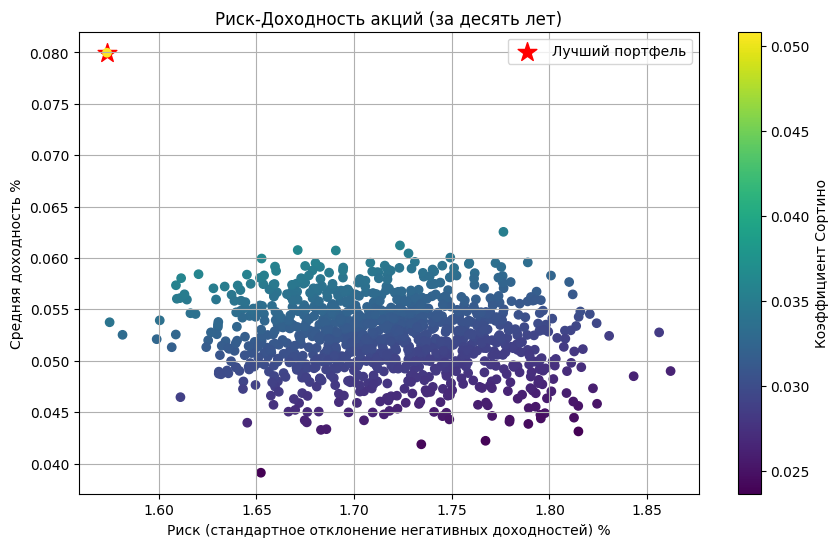

Файл "moex_sortino_value_10y.png" успешно обновлён!


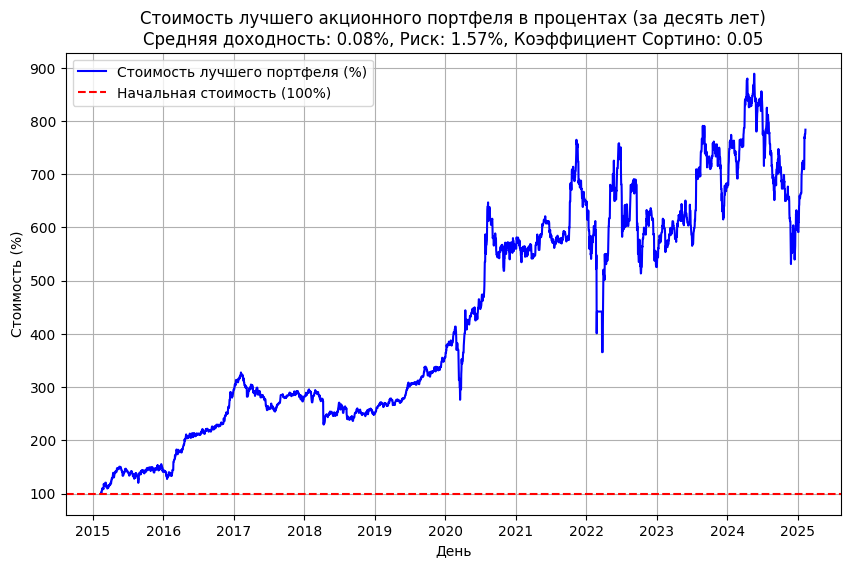

Файл "moex_sortino_parts_10y.png" успешно обновлён!


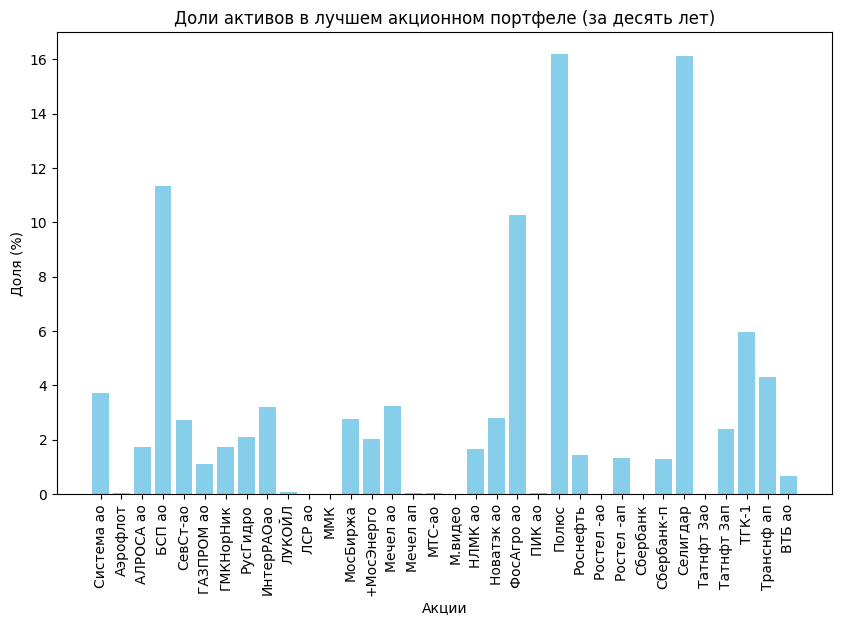

In [68]:
from github_lib_abscur2 import pass_file
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize

# Выбор случайного периода
random_period = random.choice(list(ago_dates.keys()))

# Функция для расчета средней доходности и риска портфеля с методом "взял и держи" (по Сортино)
def portfolio_performance(weights, cumulative_returns):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    # Дневная средняя доходность
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    
    # Расчет негативных отклонений для коэффициента Сортино
    downside_returns = daily_returns[daily_returns < 0]  # отрицательные отклонения
    
    downside_deviation = np.std(downside_returns) if len(downside_returns) > 0 else 0  # стандартное отклонение негативных доходностей
    
    return portfolio_mean_return, downside_deviation  # возвращаем среднюю доходность и риск

# Функция для расчета коэффициента Сортино
def sortino_ratio(weights, cumulative_returns, target_return=0):
    portfolio_value = cumulative_returns @ weights  # стоимость портфеля
    
    daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]  # относительные изменения стоимости портфеля
    
    portfolio_mean_return = np.mean(daily_returns)  # средняя доходность
    downside_returns = daily_returns[daily_returns < target_return]  # отрицательные отклонения
    
    downside_deviation = np.std(downside_returns) if len(downside_returns) > 0 else 0  # стандартное отклонение негативных доходностей
    
    if downside_deviation == 0:
        return np.inf  # Если нет негативных отклонений, возвращаем бесконечность (максимальный коэффициент)
    
    return (portfolio_mean_return - target_return) / downside_deviation  # Коэффициент Сортино

# Функция для минимизации коэффициента Сортино (отрицательное значение)
def neg_sortino_ratio(weights, cumulative_returns):
    return -sortino_ratio(weights, cumulative_returns)  # Возвращаем отрицательное значение коэффициента Сортино

# Словарь для хранения акций и их долей по диапазонам
portfolio_weights_by_period = {}

# Основной цикл по диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по текущему диапазону для акций
    filtered_data = moex_closing_prices_abs_df[moex_closing_prices_abs_df.index >= start_date]
    
    if filtered_data.empty:
        print(f"Нет данных для диапазона {period_name} начиная с {start_date}.")
        continue

    returns = np.diff(filtered_data.to_numpy(), axis=0) / filtered_data.to_numpy()[:-1]  # относительные изменения

    # Вычисляем кумулятивные доходности один раз
    cumulative_returns = np.cumprod(1 + returns, axis=0)  # кумулятивные доходности

    num_portfolios = 1000
    num_assets = filtered_data.shape[1]
    results = np.zeros((3, num_portfolios + 1))

    best_random_weights = None
    best_random_sortino_ratio = -np.inf
    
    # Генерация портфелей и расчет их характеристик
    for i in range(num_portfolios):
        random_weights = np.random.rand(num_assets)  # генерируем случайный ряд
        random_weights /= np.sum(random_weights)  # Нормализуем веса так, чтобы они в сумме давали единицу
        
        portfolio_mean_return, downside_deviation = portfolio_performance(random_weights, cumulative_returns)
        results[0, i] = portfolio_mean_return
        results[1, i] = downside_deviation
        results[2, i] = sortino_ratio(random_weights, cumulative_returns)

        if best_random_weights is None or results[2, i] >= results[2].max():
            best_random_weights = random_weights
            best_random_sortino_ratio = results[2, i]
    
    # Оптимизация портфеля с использованием scipy.optimize.minimize с ограничениями
    initial_weights = best_random_weights.copy()  # Начальные веса как лучшие случайные веса
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},   # Сумма весов должна быть равна 1
        {'type': 'ineq', 'fun': lambda x: x}              # Все веса должны быть неотрицательными
    )

    optimal_solution = minimize(neg_sortino_ratio, initial_weights,
                                args=(cumulative_returns,),
                                constraints=constraints)
    
    best_weights = optimal_solution.x  # Оптимальные веса портфеля

    if sortino_ratio(best_weights, cumulative_returns) < best_random_sortino_ratio:
        best_weights = best_random_weights
    
    best_portfolio_value = cumulative_returns @ best_weights
    
    best_portfolio_return, best_downside_deviation = portfolio_performance(best_weights, cumulative_returns)
    
    results[0, -1] = best_portfolio_return
    results[1, -1] = best_downside_deviation
    results[2, -1] = sortino_ratio(best_weights, cumulative_returns)

    # Преобразование стоимости в проценты относительно начальной стоимости 
    best_portfolio_value_percent = best_portfolio_value * 100 
    
    dates = moex_closing_prices_abs_df.index[-len(best_portfolio_value):]
    
    plt.figure(figsize=(10,6))
    plt.scatter(best_downside_deviation * 100,best_portfolio_return * 100,color='red', marker='*', s=200,label='Лучший портфель')
    plt.scatter(results[1, :] * 100, results[0, :] * 100, c=results[2, :], cmap='viridis', marker='o')
    plt.title(f'Риск-Доходность акций (за {period_name})')
    plt.xlabel('Риск (стандартное отклонение негативных доходностей) %')
    plt.ylabel('Средняя доходность %')
    plt.colorbar(label='Коэффициент Сортино')
    plt.legend()
    plt.grid()
    
    file_name_risk_return=f'moex_sortino_risk_return_{period_suffix[period_name]}.png'
    plt.savefig(file_name_risk_return,dpi=75)
    
    pass_file(file_name_risk_return)
    
    if period_name == random_period:
       plt.show()
    else:
       plt.close()
    
    sortino_ratio_value=sortino_ratio(best_weights,cumulative_returns)
    
    plt.figure(figsize=(10,6))
    plt.plot(dates,best_portfolio_value_percent,label='Стоимость лучшего портфеля (%)',color='blue')
    plt.title(f'Стоимость лучшего акционного портфеля в процентах (за {period_name})\n'
             f'Средняя доходность: {best_portfolio_return * 100:.2f}%, '
             f'Риск: {best_downside_deviation * 100:.2f}%, '
             f'Коэффициент Сортино: {sortino_ratio_value:.2f}')
    plt.xlabel('День')
    plt.ylabel('Стоимость (%)')
    plt.axhline(y=100,color='r',linestyle='--',label='Начальная стоимость (100%)') 
    plt.legend()
    plt.grid()
    
    file_name_value=f'moex_sortino_value_{period_suffix[period_name]}.png'
    plt.savefig(file_name_value,dpi=75)
    
    pass_file(file_name_value)
    
    if period_name == random_period:
       plt.show()
    else:
       plt.close()
    
    best_weights_percent=best_weights * 100 
    
    asset_labels=[moex_stocks_dict[ticker] for ticker in moex_closing_prices_abs_df.columns.tolist()] 
    
    # Сохранение акций и их долей в словаре для дальнейшего использования
    stock_weight_dict = dict(zip(asset_labels, best_weights_percent))
    
    # Отбор акций с наибольшими долями до достижения суммы в 90%
    sorted_stocks = sorted(stock_weight_dict.items(), key=lambda x: x[1], reverse=True)
    
    cumulative_percentage = 0
    selected_stocks_list = []
    
    for stock_name, weight in sorted_stocks:
       if cumulative_percentage < 90:
           selected_stocks_list.append((stock_name, weight))
           cumulative_percentage += weight
    
    # Визуализация долей активов в лучшем акционном портфеле
    plt.figure(figsize=(10,6))
    plt.bar(asset_labels,best_weights_percent,color='skyblue')
    plt.title(f'Доли активов в лучшем акционном портфеле (за {period_name})')
    plt.xlabel('Акции')
    plt.ylabel('Доля (%)')
    plt.xticks(rotation=90)
    
    file_name_parts=f'moex_sortino_parts_{period_suffix[period_name]}.png'
    plt.savefig(file_name_parts,dpi=75)
    
    pass_file(file_name_parts)
    
    if period_name == random_period:
       plt.show()
    else:
       plt.close()
    
    # Сохранение информации о выбранных акциях и их долях для дальнейшего использования в JS-файле,
    # включая тикеры для гиперссылок.
    portfolio_weights_by_period[period_name] = [(ticker, name, weight) for name, weight in selected_stocks_list 
                                                for ticker in moex_stocks_dict.keys() 
                                                if moex_stocks_dict[ticker] == name]
    


In [69]:
# Путь к директории, где будут храниться диаграммы
base_url = "https://prog815.github.io/abscur2/contents/"
image_filenames = []

# Генерация имен файлов для акционных портфелей по Сортино
for period_name, start_date in ago_dates.items():
    suffix = period_suffix[period_name]
    # Форматируем дату с помощью pandas
    formatted_start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')  # Форматирование даты без времени
    image_filenames.append((period_name, formatted_start_date, f'moex_sortino_risk_return_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'moex_sortino_value_{suffix}.png'))
    image_filenames.append((period_name, formatted_start_date, f'moex_sortino_parts_{suffix}.png'))

# Генерация JavaScript-кода
js_code = """
// JavaScript код для отображения диаграмм акционных портфелей по коэффициенту Сортино
document.addEventListener("DOMContentLoaded", function() {
    const container = document.getElementById("charts-container");
"""

# Добавление изображений и подзаголовков
current_period_name = None

for period_name, start_date, filename in image_filenames:
    # Добавление подзаголовка только в начале новой серии
    if current_period_name != period_name:
        current_period_name = period_name
        js_code += f'    var header = document.createElement("p");\n'
        js_code += f'    header.innerHTML = "<strong>За {period_name} (начало: {start_date})</strong>";\n'
        js_code += '    container.appendChild(header);\n'
    
    # Добавление изображения
    js_code += f'    var img = document.createElement("img");\n'
    js_code += f'    img.src = "{base_url}{filename}";\n'
    js_code += f'    img.alt = "{filename}";\n'
    js_code += f'    img.style.width = "100%";\n'  # Устанавливаем ширину изображения
    js_code += f'    container.appendChild(img);\n'

    # Если это диаграмма с долями активов, добавляем список акций
    if "parts" in filename:
        stocks_info = portfolio_weights_by_period[period_name]
        
        # Добавление списка акций с долями
        js_code += '    var stockList = document.createElement("p");\n'
        js_code += '    stockList.innerHTML = "<strong>Топ акции по долям в портфеле:</strong> "; \n'
        
        for ticker, name, weight in stocks_info:
            weight_formatted = f"{weight:.2f}"  # Форматирование доли до двух знаков после запятой
            js_code += f'    stockList.innerHTML += `<a href="https://www.abscur.ru/p/blog-page_68.html?akcia={ticker}">{name} ({ticker})</a> - {weight_formatted}%, `;\n'

        # Удаление последней запятой (если она есть)
        js_code += '    stockList.innerHTML = stockList.innerHTML.slice(0, -2); // Удаляем последнюю запятую\n'
        
        js_code += '    container.appendChild(stockList);\n'

js_code += """
});
"""

# Сохранение JavaScript-кода в файл
with open("moex_sortino_portfolio_ratios.js", "w") as js_file:
    js_file.write(js_code)

print("JavaScript файл moex_sortino_portfolio_ratios.js успешно создан.")

# Публикуем файл
pass_file("moex_sortino_portfolio_ratios.js", is_image=False)


JavaScript файл moex_sortino_portfolio_ratios.js успешно создан.
Файл "moex_sortino_portfolio_ratios.js" успешно обновлён!
